In [1]:
import xarray as xr
import numpy as np
import cftime
import nc_time_axis
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import ticker, cm
from cftime import datetime 
import matplotlib.colors as colors
import math
import random
import matplotlib.cm as mcm
from matplotlib.ticker import MaxNLocator
#jet = mcm.get_cmap('jet')
jet = mcm.get_cmap('jet') if isinstance(mcm.get_cmap('jet'), str) else mcm.get_cmap('jet')
import netCDF4 as nc
import sys
import os
import netCDF4 as nc
import cartopy.crs as ccrs # CRS stands for "Coordinate reference systems" for map projection
from cartopy.crs import PlateCarree
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from dateutil import tz
import pytz
import time
from time import process_time
%matplotlib inline 
#import line_profiler
#%load_ext line_profiler

/tmp/ipykernel_3364966/3886823162.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = mcm.get_cmap('jet') if isinstance(mcm.get_cmap('jet'), str) else mcm.get_cmap('jet')


In [2]:

win_Monthfolderstr = 'Dec-Feb'
win_ds_months = ['12','01','02']

spr_Monthfolderstr = 'Mar-May'
spr_ds_months = ['03','04','05']

sum_Monthfolderstr = 'Jun-Aug'
sum_ds_months = ['06','07','08']

aut_Monthfolderstr = 'Sep-Nov'
aut_ds_months = ['09','10','11']


#run_name = 'Jianfei_run'
run_name = 'Wuhu_IonTr_run'

win_file = f'Nc_Files/SpE_Output/{run_name}_SpE_Output_{win_Monthfolderstr}.nc'
spr_file = f'Nc_Files/SpE_Output/{run_name}_SpE_Output_{spr_Monthfolderstr}.nc'
sum_file = f'Nc_Files/SpE_Output/{run_name}_SpE_Output_{sum_Monthfolderstr}.nc'
aut_file = f'Nc_Files/SpE_Output/{run_name}_SpE_Output_{aut_Monthfolderstr}.nc'



ds_months_ar = np.arange(0,3)   

ds_win = xr.open_dataset(win_file)
ds_spr = xr.open_dataset(spr_file)
ds_sum = xr.open_dataset(sum_file)
ds_aut = xr.open_dataset(aut_file)

ds_sum

<xarray.Dataset>
Dimensions:                   (lev_sl: 25, time: 336, lat: 96, latsl: 36,
                               lon: 144, LT: 48, timesl: 2, mth: 3)
Coordinates:
  * lev_sl                    (lev_sl) float64 1.473e-05 1.891e-05 ... 0.00601
  * time                      (time) float64 0.0 1.0 2.0 ... 333.0 334.0 335.0
  * lat                       (lat) float64 -90.0 -88.11 -86.21 ... 88.11 90.0
  * latsl                     (latsl) float64 -87.5 -82.5 -77.5 ... 82.5 87.5
  * lon                       (lon) float64 0.0 2.5 5.0 ... 352.5 355.0 357.5
  * LT                        (LT) float64 0.0 0.5106 1.021 ... 22.98 23.49 24.0
  * timesl                    (timesl) float64 0.0 1.0
  * mth                       (mth) float64 6.0 7.0 8.0
Data variables: (12/16)
    Zavg_sl                   (lev_sl) float64 ...
    times_str_min             (mth, timesl) object ...
    times_str_max             (mth, timesl) object ...
    SpEs_Occ_Fr_b_dsavglevLT  (lat) float64 ...
    SpEs_Occ_Fr_b_dsavglev    (lat, LT) float64 ...
    SpEs_Occ_Fr_b_avglev      (lat, LT, mth) float64 ...
    ...                        ...
    SpEs_Occ_Fr_bb_5d_dsavg   (lev_sl, latsl, LT) float64 ...
    SpEs_Occ_Fr_bb_5d_avg     (lev_sl, latsl, LT, mth) float64 ...
    SpEsns_Occ_Fr_dsavglev    (lat, lon) float64 ...
    SpEsns_Occ_Fr_avglev      (lat, lon, mth) float64 ...
    SpEsns_Occ_Fr_dsavg       (lev_sl, lat, lon) float64 ...
    SpEsns_Occ_Fr_avg         (lev_sl, lat, lon, mth) float64 ...

In [3]:

lev_sl = ds_win.variables['lev_sl']
lat = ds_win.variables['lat']
intlat = ds_win.variables['latsl']
lon = ds_win.variables['lon']
LT = ds_win.variables['LT']

Zavg_sl = ds_win.variables['Zavg_sl']
times_str_min = ds_win.variables['times_str_min']
times_str_max = ds_win.variables['times_str_max']

#=====================================================================
# # # W I N T E R # # # 
# LAT line plot ------------------------------------------------------------------------------------------------------
win_SpEs_Occ_Fr_b_dsavglevLT = ds_win.variables['SpEs_Occ_Fr_b_dsavglevLT']
# LAT - LT over all heights ------------------------------------------------------------------------------------------------------
win_SpEs_Occ_Fr_b_dsavglev = ds_win.variables['SpEs_Occ_Fr_b_dsavglev']
win_SpEs_Occ_Fr_b_avglev = ds_win.variables['SpEs_Occ_Fr_b_avglev']
# LAT - LT at specific height ------------------------------------------------------------------------------------------------------
win_SpEs_Occ_Fr_b_dsavg = ds_win.variables['SpEs_Occ_Fr_b_dsavg']
win_SpEs_Occ_Fr_b_avg = ds_win.variables['SpEs_Occ_Fr_b_avg']
# LEV - LAT ------------------------------------------------------------------------------------------------------
win_SpEs_Occ_Fr_b_dsavgLT = ds_win.variables['SpEs_Occ_Fr_b_dsavgLT']
win_SpEs_Occ_Fr_b_avgLT = ds_win.variables['SpEs_Occ_Fr_b_avgLT']
# LEV - LT ------------------------------------------------------------------------------------------------------
win_SpEs_Occ_Fr_bb_5d_dsavg = ds_win.variables['SpEs_Occ_Fr_bb_5d_dsavg']
win_SpEs_Occ_Fr_bb_5d_avg = ds_win.variables['SpEs_Occ_Fr_bb_5d_avg']
# LAT - LON over all heights ------------------------------------------------------------------------------------------------------
win_SpEsns_Occ_Fr_dsavglev = ds_win.variables['SpEsns_Occ_Fr_dsavglev']
win_SpEsns_Occ_Fr_avglev = ds_win.variables['SpEsns_Occ_Fr_avglev']
# LAT - LON at specific height ------------------------------------------------------------------------------------------------------
win_SpEsns_Occ_Fr_dsavg = ds_win.variables['SpEsns_Occ_Fr_dsavg']
win_SpEsns_Occ_Fr_avg = ds_win.variables['SpEsns_Occ_Fr_avg']
#=====================================================================

#=====================================================================
# # # S P R I N G # # # 
# LAT line plot ------------------------------------------------------------------------------------------------------
spr_SpEs_Occ_Fr_b_dsavglevLT = ds_spr.variables['SpEs_Occ_Fr_b_dsavglevLT']
# LAT - LT over all heights ------------------------------------------------------------------------------------------------------
spr_SpEs_Occ_Fr_b_dsavglev = ds_spr.variables['SpEs_Occ_Fr_b_dsavglev']
spr_SpEs_Occ_Fr_b_avglev = ds_spr.variables['SpEs_Occ_Fr_b_avglev']
# LAT - LT at specific height ------------------------------------------------------------------------------------------------------
spr_SpEs_Occ_Fr_b_dsavg = ds_spr.variables['SpEs_Occ_Fr_b_dsavg']
spr_SpEs_Occ_Fr_b_avg = ds_spr.variables['SpEs_Occ_Fr_b_avg']
# LEV - LAT ------------------------------------------------------------------------------------------------------
spr_SpEs_Occ_Fr_b_dsavgLT = ds_spr.variables['SpEs_Occ_Fr_b_dsavgLT']
spr_SpEs_Occ_Fr_b_avgLT = ds_spr.variables['SpEs_Occ_Fr_b_avgLT']
# LEV - LT ------------------------------------------------------------------------------------------------------
spr_SpEs_Occ_Fr_bb_5d_dsavg = ds_spr.variables['SpEs_Occ_Fr_bb_5d_dsavg']
spr_SpEs_Occ_Fr_bb_5d_avg = ds_spr.variables['SpEs_Occ_Fr_bb_5d_avg']
# LAT - LON over all heights ------------------------------------------------------------------------------------------------------
spr_SpEsns_Occ_Fr_dsavglev = ds_spr.variables['SpEsns_Occ_Fr_dsavglev']
spr_SpEsns_Occ_Fr_avglev = ds_spr.variables['SpEsns_Occ_Fr_avglev']
# LAT - LON at specific height ------------------------------------------------------------------------------------------------------
spr_SpEsns_Occ_Fr_dsavg = ds_spr.variables['SpEsns_Occ_Fr_dsavg']
spr_SpEsns_Occ_Fr_avg = ds_spr.variables['SpEsns_Occ_Fr_avg']
#=====================================================================

#=====================================================================
# # # S U M M E R # # # 
# LAT line plot ------------------------------------------------------------------------------------------------------
sum_SpEs_Occ_Fr_b_dsavglevLT = ds_sum.variables['SpEs_Occ_Fr_b_dsavglevLT']
# LAT - LT over all heights ------------------------------------------------------------------------------------------------------
sum_SpEs_Occ_Fr_b_dsavglev = ds_sum.variables['SpEs_Occ_Fr_b_dsavglev']
sum_SpEs_Occ_Fr_b_avglev = ds_sum.variables['SpEs_Occ_Fr_b_avglev']
# LAT - LT at specific height ------------------------------------------------------------------------------------------------------
sum_SpEs_Occ_Fr_b_dsavg = ds_sum.variables['SpEs_Occ_Fr_b_dsavg']
sum_SpEs_Occ_Fr_b_avg = ds_sum.variables['SpEs_Occ_Fr_b_avg']
# LEV - LAT ------------------------------------------------------------------------------------------------------
sum_SpEs_Occ_Fr_b_dsavgLT = ds_sum.variables['SpEs_Occ_Fr_b_dsavgLT']
sum_SpEs_Occ_Fr_b_avgLT = ds_sum.variables['SpEs_Occ_Fr_b_avgLT']
# LEV - LT ------------------------------------------------------------------------------------------------------
sum_SpEs_Occ_Fr_bb_5d_dsavg = ds_sum.variables['SpEs_Occ_Fr_bb_5d_dsavg']
sum_SpEs_Occ_Fr_bb_5d_avg = ds_sum.variables['SpEs_Occ_Fr_bb_5d_avg']
# LAT - LON over all heights ------------------------------------------------------------------------------------------------------
sum_SpEsns_Occ_Fr_dsavglev = ds_sum.variables['SpEsns_Occ_Fr_dsavglev']
sum_SpEsns_Occ_Fr_avglev = ds_sum.variables['SpEsns_Occ_Fr_avglev']
# LAT - LON at specific height ------------------------------------------------------------------------------------------------------
sum_SpEsns_Occ_Fr_dsavg = ds_sum.variables['SpEsns_Occ_Fr_dsavg']
sum_SpEsns_Occ_Fr_avg = ds_sum.variables['SpEsns_Occ_Fr_avg']
#=====================================================================

#=====================================================================
# # # A U T U M N # # # 
# LAT line plot ------------------------------------------------------------------------------------------------------
aut_SpEs_Occ_Fr_b_dsavglevLT = ds_aut.variables['SpEs_Occ_Fr_b_dsavglevLT']
# LAT - LT over all heights ------------------------------------------------------------------------------------------------------
aut_SpEs_Occ_Fr_b_dsavglev = ds_aut.variables['SpEs_Occ_Fr_b_dsavglev']
aut_SpEs_Occ_Fr_b_avglev = ds_aut.variables['SpEs_Occ_Fr_b_avglev']
# LAT - LT at specific height ------------------------------------------------------------------------------------------------------
aut_SpEs_Occ_Fr_b_dsavg = ds_aut.variables['SpEs_Occ_Fr_b_dsavg']
aut_SpEs_Occ_Fr_b_avg = ds_aut.variables['SpEs_Occ_Fr_b_avg']
# LEV - LAT ------------------------------------------------------------------------------------------------------
aut_SpEs_Occ_Fr_b_dsavgLT = ds_aut.variables['SpEs_Occ_Fr_b_dsavgLT']
aut_SpEs_Occ_Fr_b_avgLT = ds_aut.variables['SpEs_Occ_Fr_b_avgLT']
# LEV - LT ------------------------------------------------------------------------------------------------------
aut_SpEs_Occ_Fr_bb_5d_dsavg = ds_aut.variables['SpEs_Occ_Fr_bb_5d_dsavg']
aut_SpEs_Occ_Fr_bb_5d_avg = ds_aut.variables['SpEs_Occ_Fr_bb_5d_avg']
# LAT - LON over all heights ------------------------------------------------------------------------------------------------------
aut_SpEsns_Occ_Fr_dsavglev = ds_aut.variables['SpEsns_Occ_Fr_dsavglev']
aut_SpEsns_Occ_Fr_avglev = ds_aut.variables['SpEsns_Occ_Fr_avglev']
# LAT - LON at specific height ------------------------------------------------------------------------------------------------------
aut_SpEsns_Occ_Fr_dsavg = ds_aut.variables['SpEsns_Occ_Fr_dsavg']
aut_SpEsns_Occ_Fr_avg = ds_aut.variables['SpEsns_Occ_Fr_avg']
#=====================================================================

In [4]:

#---------------------------------------------------------------------------------------------
#                            P L O T T I N G 
#---------------------------------------------------------------------------------------------


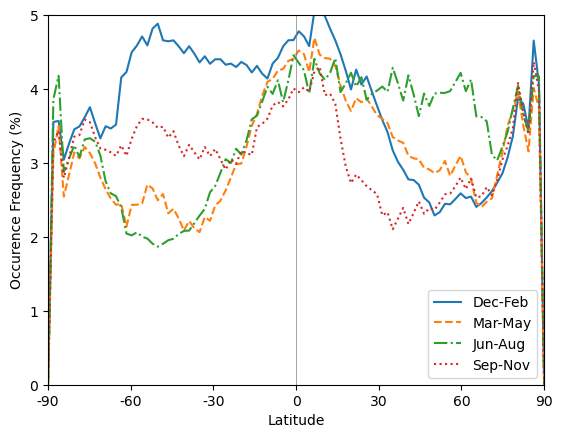

In [5]:
#Occ freq (lat, LT) averaged over LT -> Occ freq as fct of lat only

# SpEs_Occ_Fr_b_dsavglevLT = np.mean(SpEs_Occ_Fr_b_dsavglev, axis=1)
# #SpEs_Occ_Fr_b_dsavglevLT.shape

fig, ax = plt.subplots()

# Plot the variables with specified line styles and labels
ax.plot(lat, win_SpEs_Occ_Fr_b_dsavglevLT, linestyle='solid', label='Dec-Feb')
ax.plot(lat, spr_SpEs_Occ_Fr_b_dsavglevLT, linestyle='dashed', label='Mar-May')
ax.plot(lat, sum_SpEs_Occ_Fr_b_dsavglevLT, linestyle='dashdot', label='Jun-Aug')
ax.plot(lat, aut_SpEs_Occ_Fr_b_dsavglevLT, linestyle='dotted', label='Sep-Nov')
ax.legend(loc='lower right')

ax.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)

ax.set_xlim(-90, 90)
ax.set_xlabel('Latitude')
ax.set_xticks(np.linspace(-90,90, 7)) 
ax.set_xticklabels((-90,-60,-30,0,30,60,90)) 

ax.set_ylim(0,5)
ax.set_ylabel('Occurence Frequency (%)')


fig_title = 'SpEs_Occ_Fr_b_dsavglevLT: Lat'
#ax.set_title(fig_title)

figname=  str(fig_title) + '.png'
plt.savefig('./Figures/' + run_name +'/Oc_fr/All/'+str(figname), dpi = 400, bbox_inches='tight') #

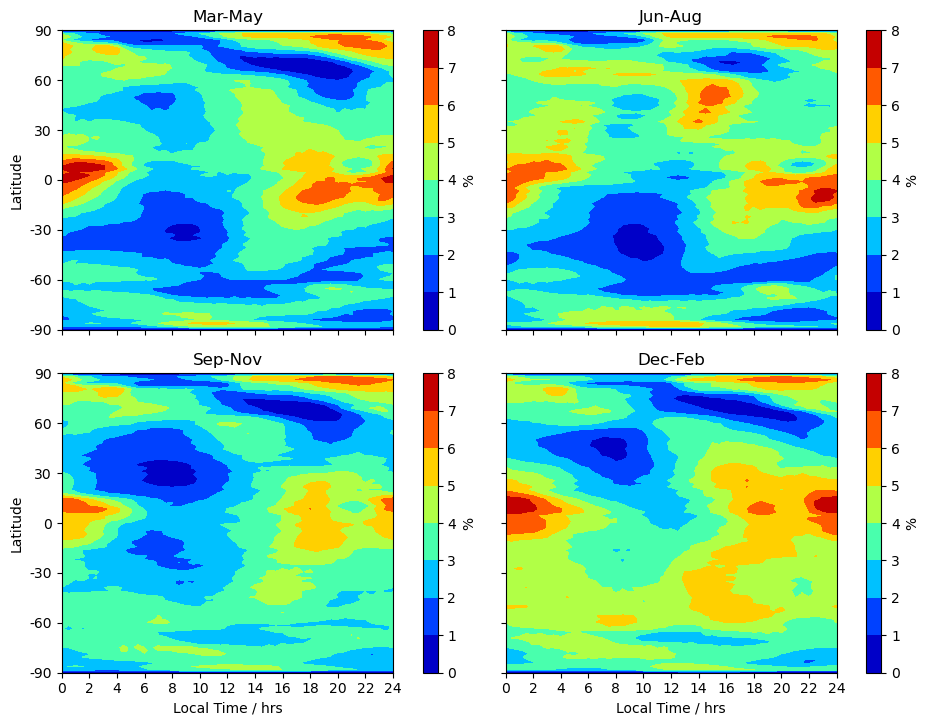

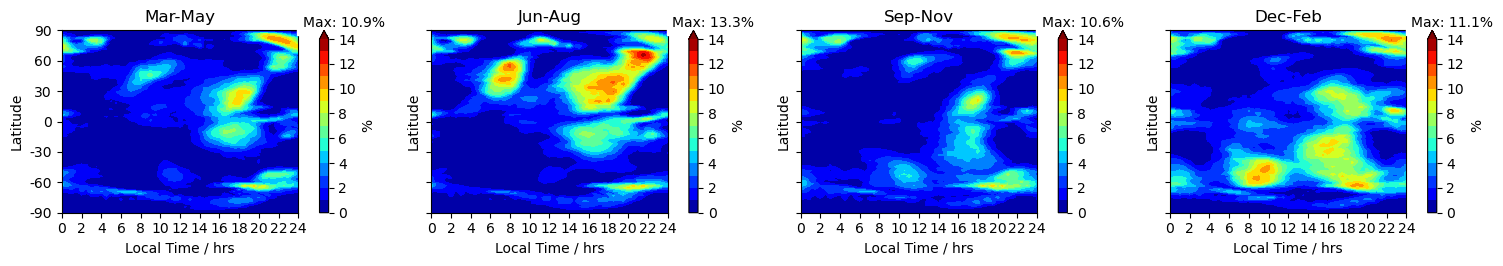

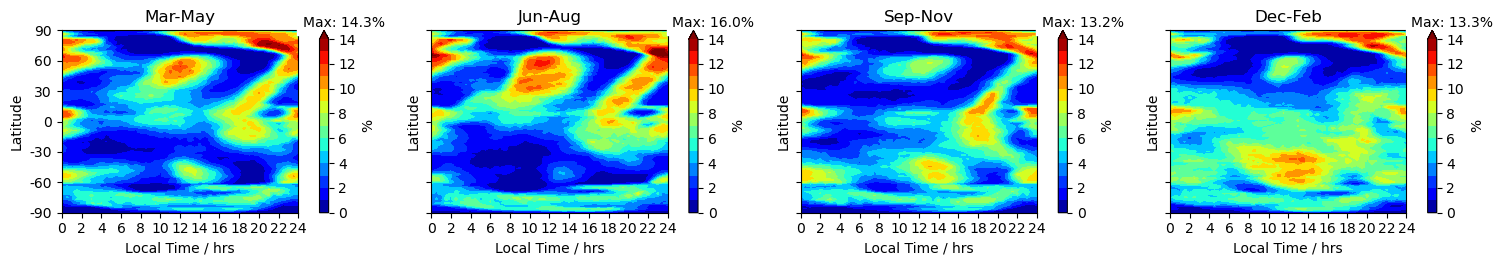

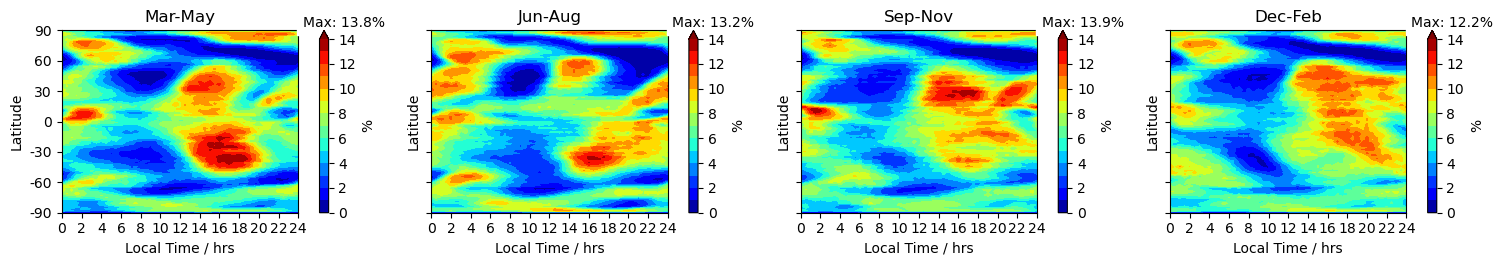

In [9]:
#SpEs Occ Freq plots - 
### Lat - Local Time at specific alt ###
### Dataset average ###
#-------------------------------------------------------------------------
# Set chosen/multiple levs to plot for lat-LT at a specific alt
lev_sl_idx_plot_multi = np.array([4,8,14],dtype=int)  #[ 4,  8, 14]  ~114km,~105km,95km
lev_sl_idx_plot_multi_shape = len(lev_sl_idx_plot_multi)  #3
lev_plot_ar = np.arange(0,lev_sl_idx_plot_multi_shape)   #[0,1,2]`

# #-------------------------------------------------------------------------
# lev_sl_idx_plot_min = 0

# lev_sl_idx_plot_max = 24
# #print('      Plot Lev = ' + str("%.1e" % lev_sl[lev_sl_idx_plot_max]) + ' hPa' + ' : ' + str("%.1e" % lev_sl[lev_sl_idx_plot_min]) + ' hPa')
# #print('      Approx Z = ' + str("%.0f" % Zavg_sl[lev_sl_idx_plot_max]) + ' km' + ' : ' + str("%.0f" %  Zavg_sl[lev_sl_idx_plot_min]) + ' km')

# Zavg_sl_plott = Zavg_sl[lev_sl_idx_plot_min:lev_sl_idx_plot_max+1]
# Zavg_sl_plott = Zavg_sl_plott.to_numpy()
# #Zavg_sl_plottt = np.round_(Zavg_sl_plott, decimals=0)


# Zavg_sl_plot_min = Zavg_sl_plott[0]
# Zavg_sl_plot_max = Zavg_sl_plott[-1]

#-------------------Set up Local Time Ticks-------------------------------
#timeconv = lon / 15
#timeconv_plot = timeconv.to_numpy() 
timeplot = np.linspace(0, 24, 49)
timeconv_plot_ticks = np.arange(0,25, dtype=float)

#-------------------------------------------------------------------------




#--------------------Dataset avg over all heights (lat, LT)-----------------------------------------
#-----------------------------------Lat-LT----------------------------------------------------------
#---------------------------------------------------------------------
win_SpEs_Occ_Fr_b_dsavglev_plot = win_SpEs_Occ_Fr_b_dsavglev[:,:]  #Whole Dataset avg over all heights ->(96, 48) lat,LT
win_SpEs_Occ_Fr_b_dsavglev_plote = np.concatenate((win_SpEs_Occ_Fr_b_dsavglev_plot, win_SpEs_Occ_Fr_b_dsavglev_plot[:, :1]), axis=1)

spr_SpEs_Occ_Fr_b_dsavglev_plot = spr_SpEs_Occ_Fr_b_dsavglev[:,:]  #Whole Dataset avg over all heights ->(96, 48) lat,LT
spr_SpEs_Occ_Fr_b_dsavglev_plote = np.concatenate((spr_SpEs_Occ_Fr_b_dsavglev_plot, spr_SpEs_Occ_Fr_b_dsavglev_plot[:, :1]), axis=1)

sum_SpEs_Occ_Fr_b_dsavglev_plot = sum_SpEs_Occ_Fr_b_dsavglev[:,:]  #Whole Dataset avg over all heights ->(96, 48) lat,LT
sum_SpEs_Occ_Fr_b_dsavglev_plote = np.concatenate((sum_SpEs_Occ_Fr_b_dsavglev_plot, sum_SpEs_Occ_Fr_b_dsavglev_plot[:, :1]), axis=1)

aut_SpEs_Occ_Fr_b_dsavglev_plot = aut_SpEs_Occ_Fr_b_dsavglev[:,:]  #Whole Dataset avg over all heights ->(96, 48) lat,LT
aut_SpEs_Occ_Fr_b_dsavglev_plote = np.concatenate((aut_SpEs_Occ_Fr_b_dsavglev_plot, aut_SpEs_Occ_Fr_b_dsavglev_plot[:, :1]), axis=1)

#-----------------------------------------------------

# Create a 2x2 subplot grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), sharex=True, sharey=True)

# Set common colorbar properties
vmin = 0
vmax = 8
cmap = plt.get_cmap('jet')
# Plot the data in each subplot
subplots = [spr_SpEs_Occ_Fr_b_dsavglev_plote, sum_SpEs_Occ_Fr_b_dsavglev_plote, aut_SpEs_Occ_Fr_b_dsavglev_plote, win_SpEs_Occ_Fr_b_dsavglev_plote]
titles = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']

for i, data in enumerate(subplots):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    C = ax.contourf(timeplot, lat, data, cmap=jet, levels=np.linspace(vmin, vmax, 9), vmin=vmin, vmax=vmax)
    
    if row == 1:
        ax.set_xlabel('Local Time / hrs')
    if col == 0:
        ax.set_ylabel('Latitude')
        ax.set_yticks(np.linspace(-90, 90, 7))
        ax.set_yticklabels((-90, -60, -30, 0, 30, 60, 90))
        
    xticks = np.linspace(0, 24, 13)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks.astype(int))

    cbar = fig.colorbar(C, ax=ax, pad=0.07)
    cbar.set_label(r'%')
    
    ax.set_title(titles[i])

plt.tight_layout(rect=[0.05, 0.03, 1, 0.95])

cbar.set_label(r'%')

figname= 'SpEs_Occ_Fr_b_dsavglev_plot: Lat vs LT'  + '.png'

plt.savefig('./Figures/' + run_name +'/Oc_fr/All/Lat-LT/'+str(figname), dpi = 400, bbox_inches='tight') #
#---------------------------------------------------------------------------------------------------

    
    
 

    
for iplev in lev_plot_ar:   #iterate over multiple levels for lat-LT plots at a specific alt
    #-----------------------------------Lat-LT plot setup ----------------------------------------
    #print('Lat-LT plot setup:')
    lev_sl_idx_plot = lev_sl_idx_plot_multi[iplev]    #14 4.9e-04hPa~95km  #8 1.1e-04hPa~105km  #4 4.0e-05 hPa~114km

    lev_sl_plot = lev_sl[lev_sl_idx_plot]
    lev_sl_plot_str = str("%.1e" % lev_sl_plot) + ' hPa'
    #print('      Plot Lev = ' + lev_sl_plot_str )

    Zavg_sl_plot = Zavg_sl[lev_sl_idx_plot]
    Zavg_sl_plot_str = str("%.0f" % Zavg_sl_plot) + ' km'
    #print('      Approx Z = ' + Zavg_sl_plot_str )
    #===================================================================================================================================================




    #--------------------------Dataset avg (lev, lat, LT)-----------------------------------------------
    #-----------------------------------Lat-LT at specific height----------------------------------------------------------
    #---------------------------------------------------------------------

    win_SpEs_Occ_Fr_b_dsavg_plot = win_SpEs_Occ_Fr_b_dsavg[lev_sl_idx_plot,:,:]    # =Whole Dataset avg   ->(25, 96, 48)  lev, lat, LT
    win_SpEs_Occ_Fr_b_dsavg_plote = np.concatenate((win_SpEs_Occ_Fr_b_dsavg_plot, win_SpEs_Occ_Fr_b_dsavg_plot[:, :1]), axis=1)
    
    spr_SpEs_Occ_Fr_b_dsavg_plot = spr_SpEs_Occ_Fr_b_dsavg[lev_sl_idx_plot,:,:]    # =Whole Dataset avg   ->(25, 96, 48)  lev, lat, LT
    spr_SpEs_Occ_Fr_b_dsavg_plote = np.concatenate((spr_SpEs_Occ_Fr_b_dsavg_plot, spr_SpEs_Occ_Fr_b_dsavg_plot[:, :1]), axis=1)
    
    sum_SpEs_Occ_Fr_b_dsavg_plot = sum_SpEs_Occ_Fr_b_dsavg[lev_sl_idx_plot,:,:]    # =Whole Dataset avg   ->(25, 96, 48)  lev, lat, LT
    sum_SpEs_Occ_Fr_b_dsavg_plote = np.concatenate((sum_SpEs_Occ_Fr_b_dsavg_plot, sum_SpEs_Occ_Fr_b_dsavg_plot[:, :1]), axis=1)
    
    aut_SpEs_Occ_Fr_b_dsavg_plot = aut_SpEs_Occ_Fr_b_dsavg[lev_sl_idx_plot,:,:]    # =Whole Dataset avg   ->(25, 96, 48)  lev, lat, LT
    aut_SpEs_Occ_Fr_b_dsavg_plote = np.concatenate((aut_SpEs_Occ_Fr_b_dsavg_plot, aut_SpEs_Occ_Fr_b_dsavg_plot[:, :1]), axis=1)

    #-----------------------------------------------------


    

    # Create a 2x2 subplot grid
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 3), sharex=True, sharey=True)
    
    vmin = 0
    vmax = 14

    cmap = plt.get_cmap('jet')
    
    # Plot the data in each subplot
    subplots = [spr_SpEs_Occ_Fr_b_dsavg_plote, sum_SpEs_Occ_Fr_b_dsavg_plote, aut_SpEs_Occ_Fr_b_dsavg_plote, win_SpEs_Occ_Fr_b_dsavg_plote]
    titles = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']

    for i, data in enumerate(subplots):
        ax=axes[i]        

        #C = ax.contourf(timeplot, lat, data, cmap=jet, levels=np.linspace(vmin, vmax, 15), vmin=vmin, vmax=vmax)

#    for ax, data in zip(axes.flat, subplots):
        C = ax.contourf(timeplot, lat, data, cmap=jet, levels=np.linspace(vmin, vmax, 15), vmin=vmin, vmax=vmax, extend='max')

        ax.set_xlabel('Local Time / hrs')
        ax.set_ylabel('Latitude')
        ax.set_yticks(np.linspace(-90, 90, 7))
        ax.set_yticklabels((-90, -60, -30, 0, 30, 60, 90))

        xticks = np.linspace(0, 24, 13)
        ax.set_xticks(xticks)
        ax.set_xticklabels(xticks.astype(int))

        cbar = fig.colorbar(C, ax=ax, pad=0.07)
        cbar.set_label(r'%')
        # Calculate the actual maximum value in your data
        actual_max_value = np.max(data)

        # Add a text annotation to display the actual maximum value
        ax.text(1.02, 1.08, f"Max: {actual_max_value:.1f}%", transform=ax.transAxes, ha='left', va='top', backgroundcolor='white')
       
        ax.set_title(titles[i])

    plt.tight_layout(rect=[0.05, 0.03, 1, 0.95])

    cbar.set_label(r'%')
    
    #fig.suptitle(lev_sl_plot_str, fontsize=16, y=0.95)
    
    #ax.set_title('SpEs_Occ_Fr_b_dsavg_plot, Lat vs LT, ' + lev_sl_plot_str + ' \n UT ' + str(times_str_min[0][0]) + ' : ' + str(times_str_max[-1][-1]) ) 
    #ax.set_title(Zavg_sl_plot_str)

    #ax.grid(axis='x',color = 'grey', linestyle = '-', linewidth = 0.5)
    #plt.grid(axis='y',color = 'grey', linestyle = '-', linewidth = 0.5)
    

    figname= 'SpEs_Occ_Fr_b_dsavg_plot: Lat vs LT, ' + Zavg_sl_plot_str + '.png'
    #print(figname)
    plt.savefig('./Figures/' + run_name +'/Oc_fr/All/Lat-LT/' + str(figname), dpi = 400, bbox_inches='tight') #
    #---------------------------------------------------------------------------------------------------



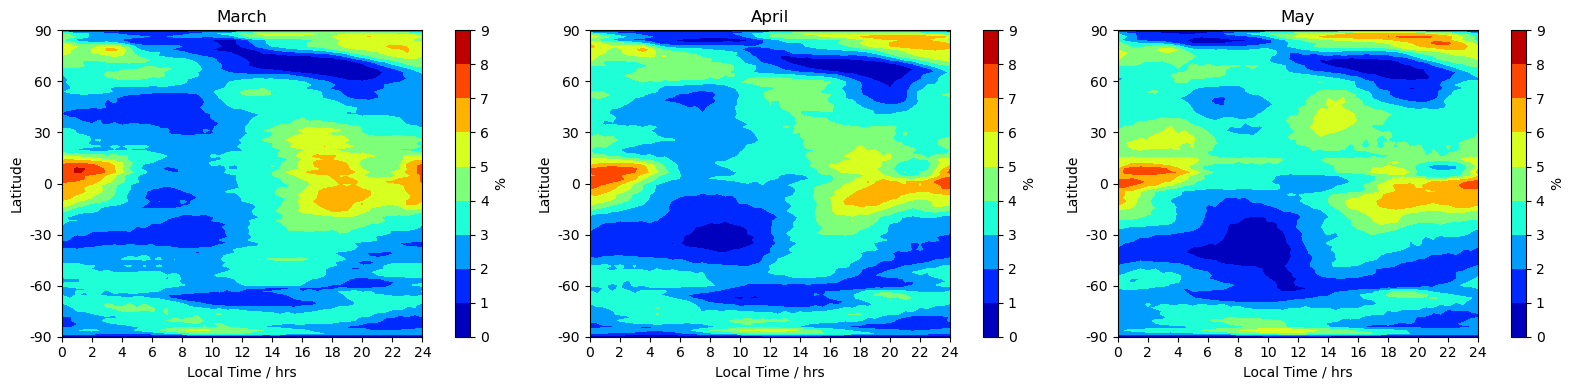

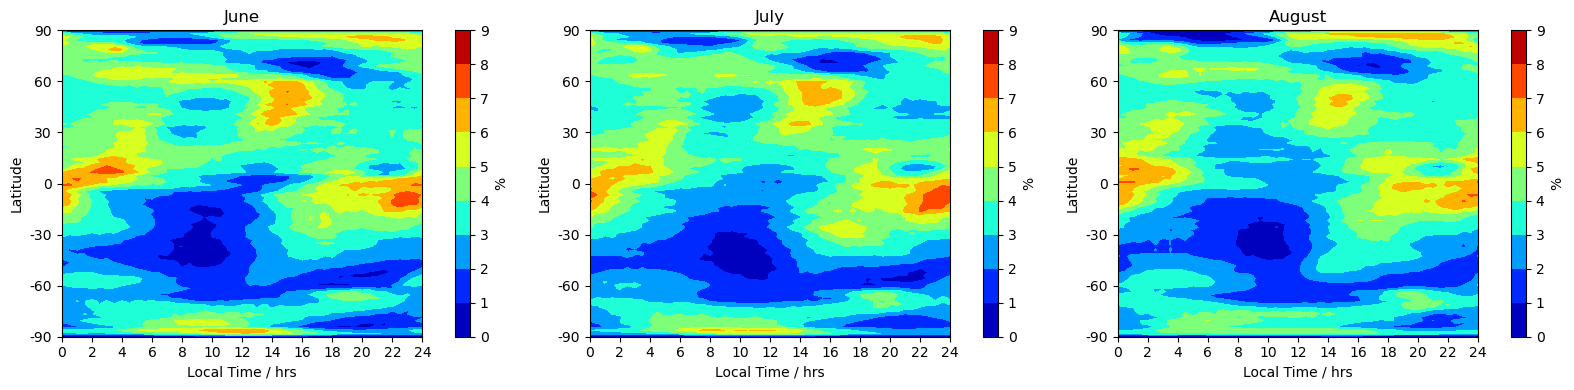

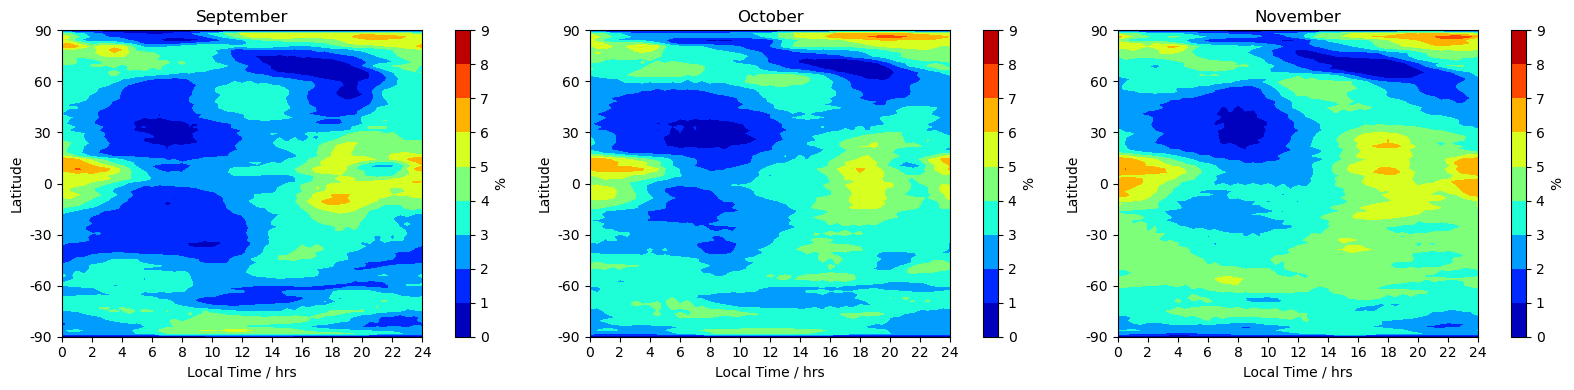

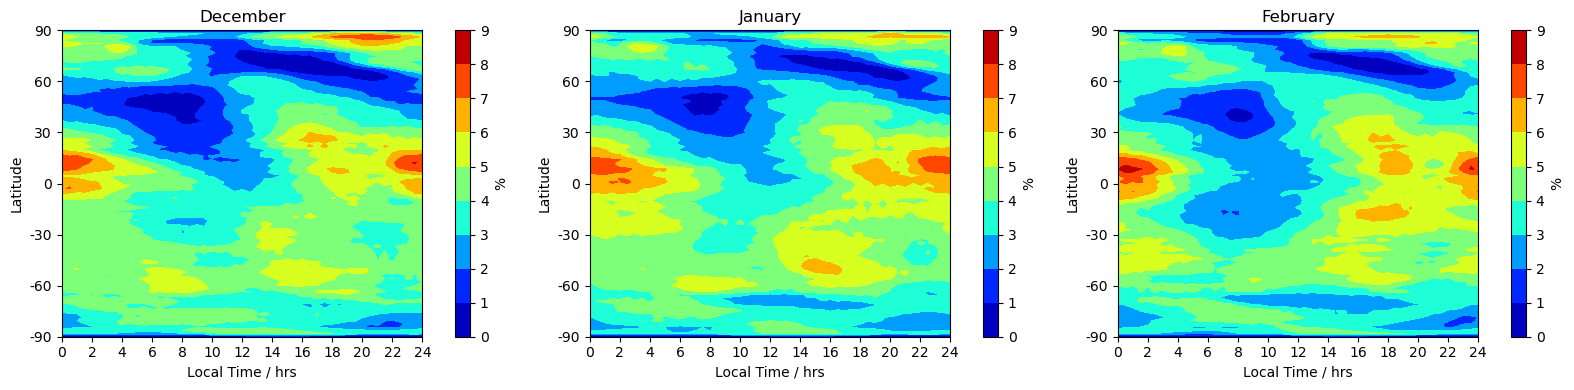

March
April
May


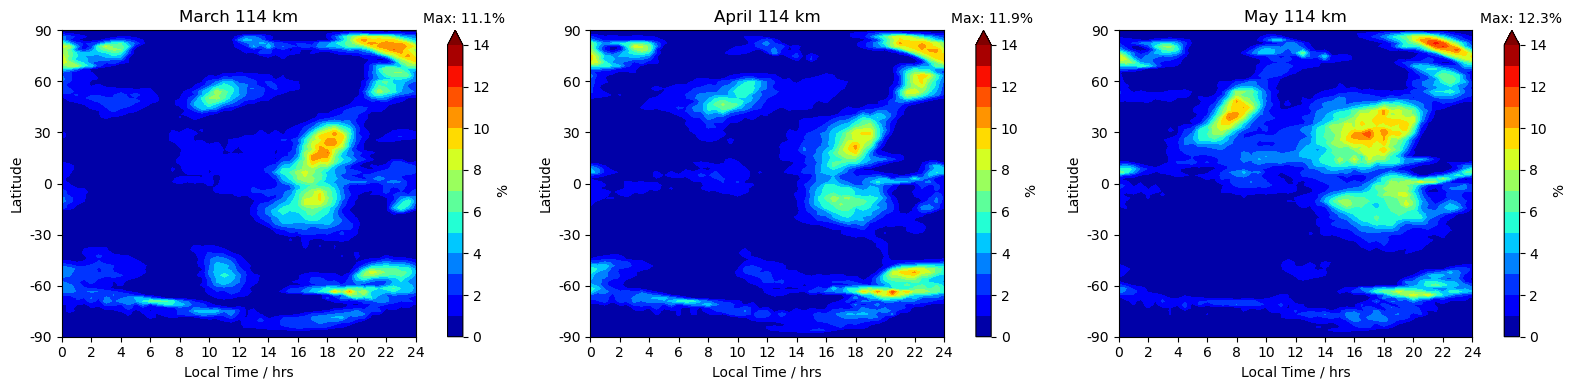

June
July
August


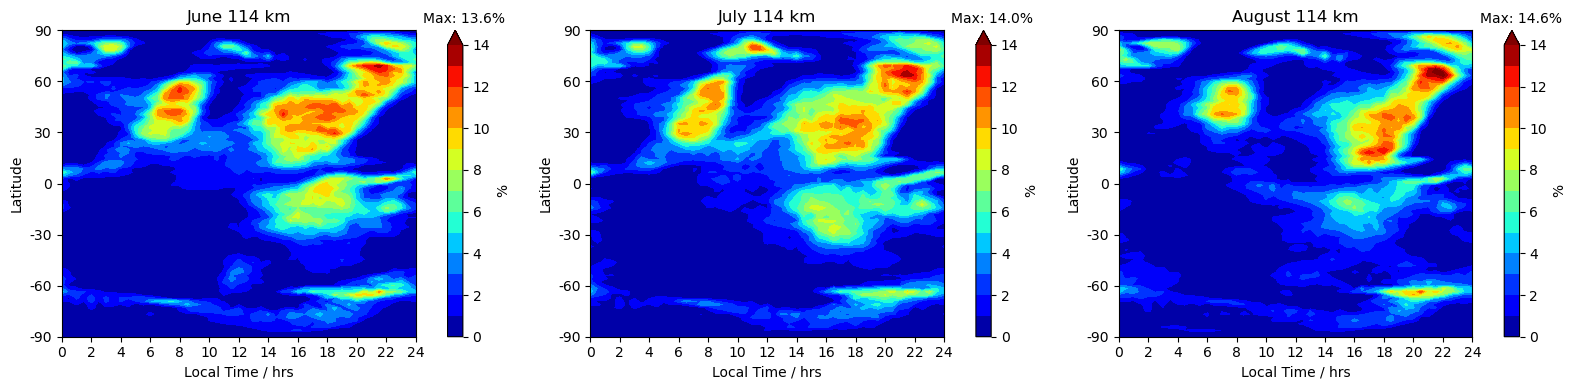

September
October
November


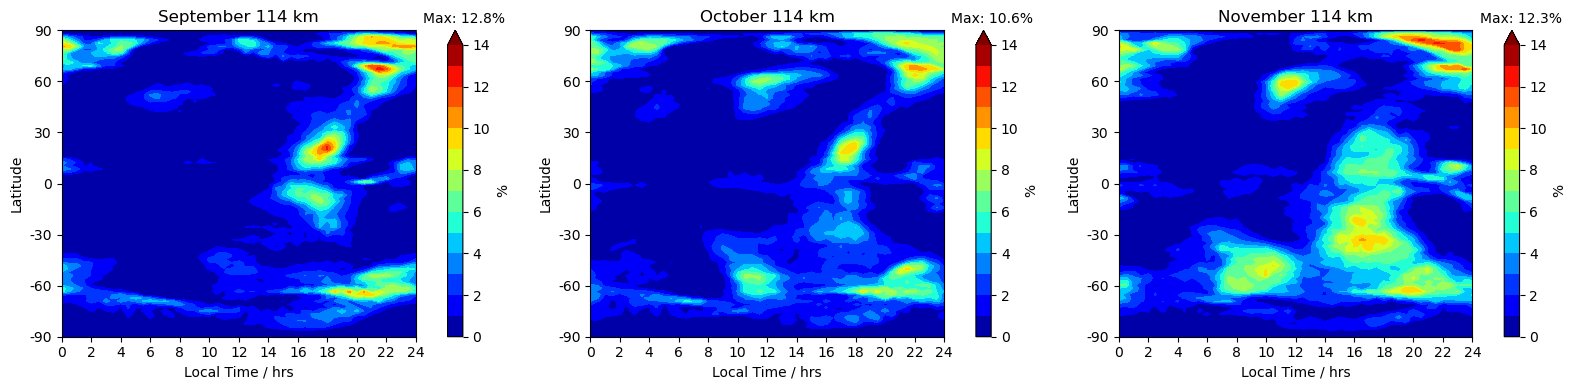

December
January
February


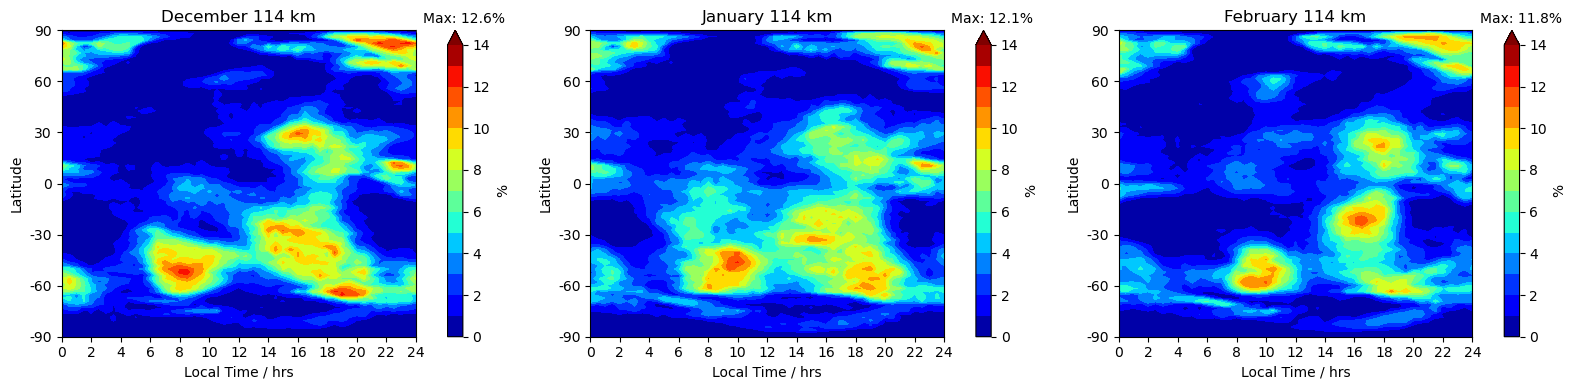

March
April
May


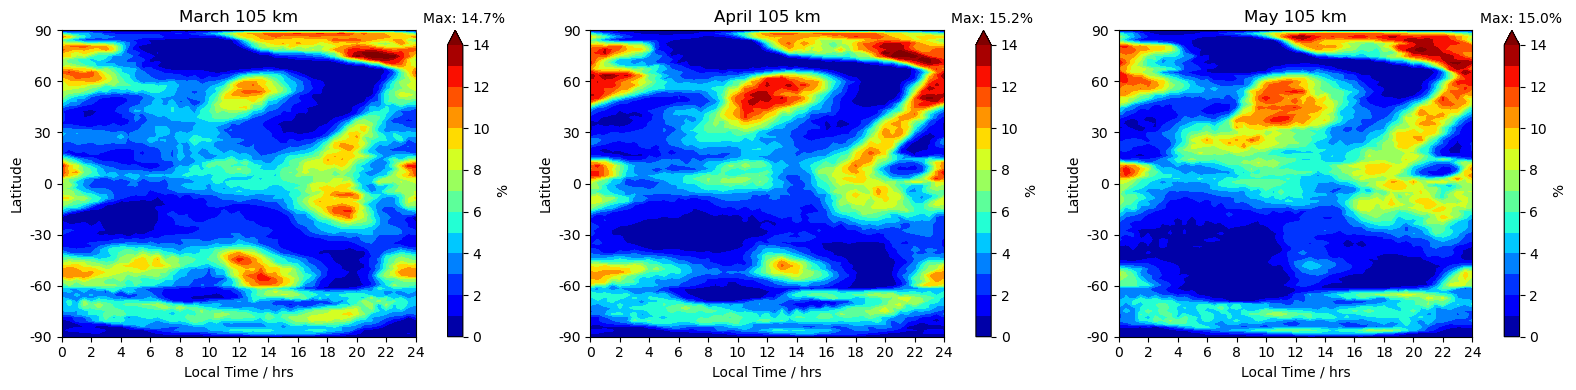

June
July
August


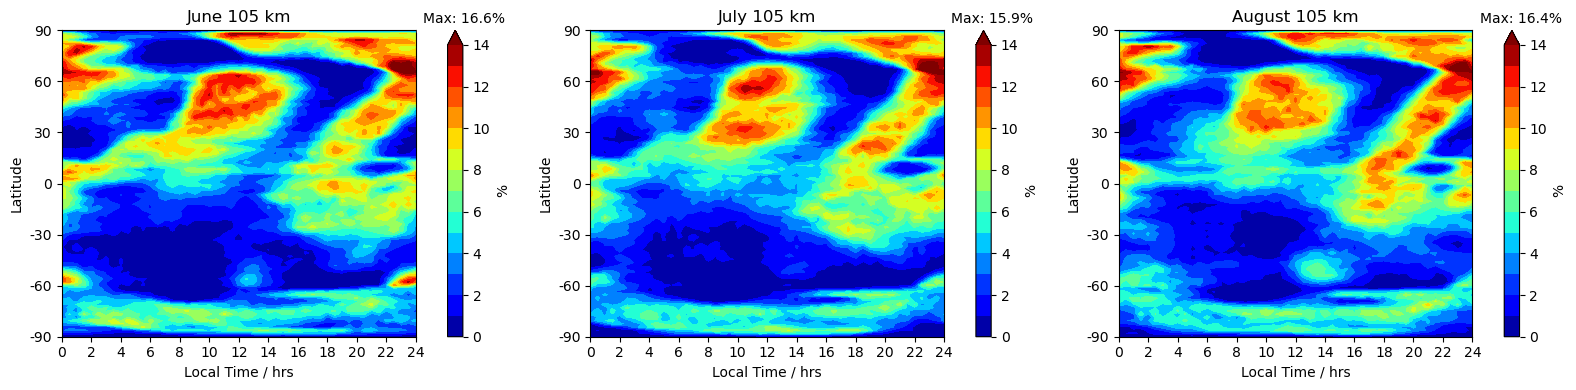

September
October
November


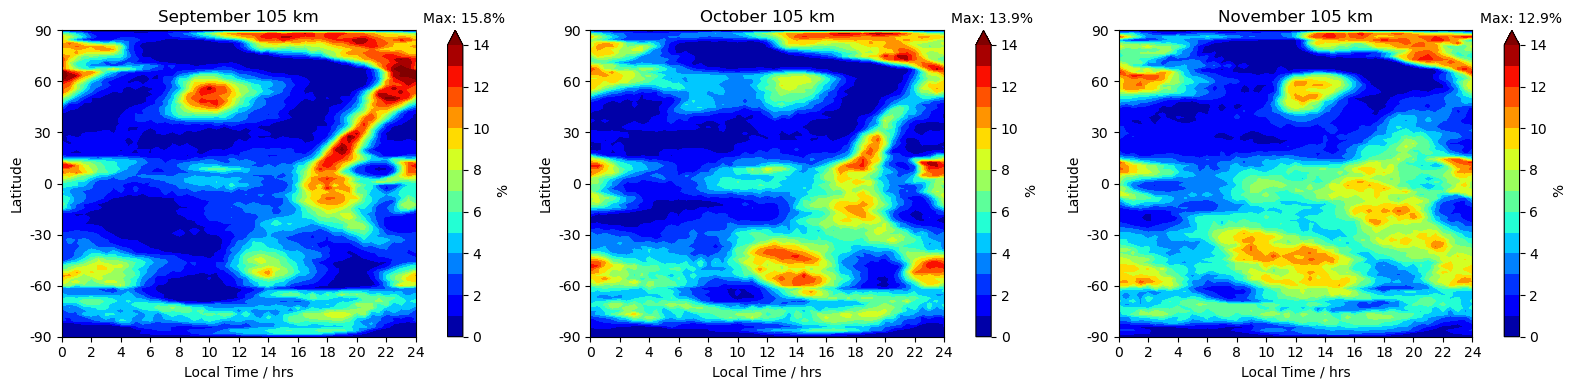

December
January
February


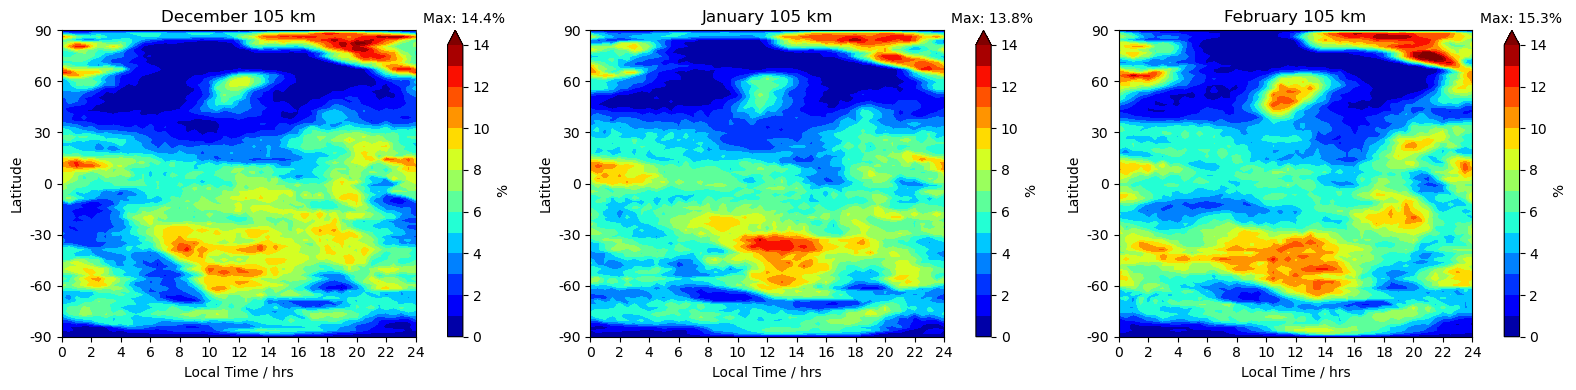

March
April
May


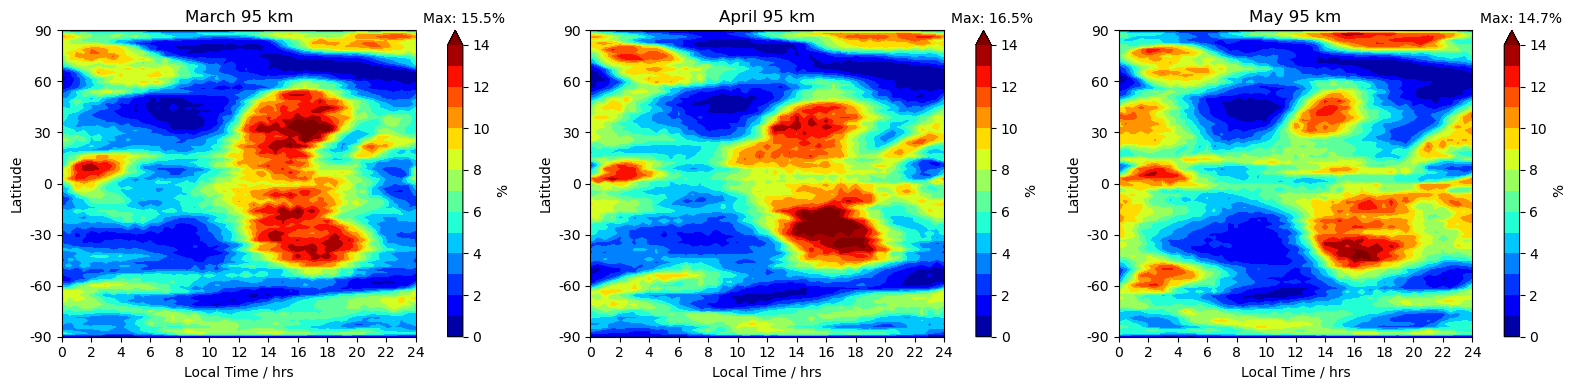

June
July
August


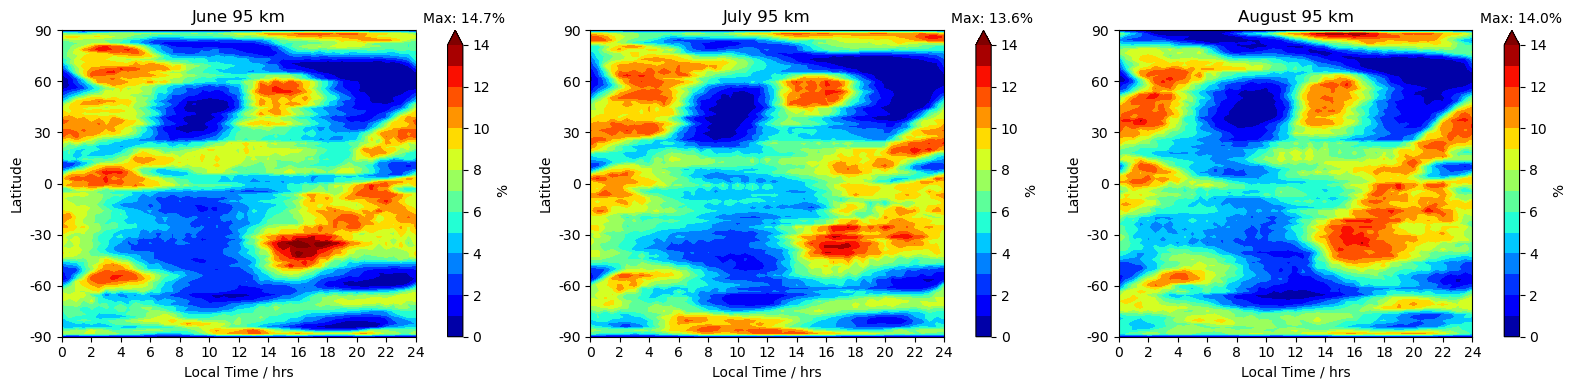

September
October
November


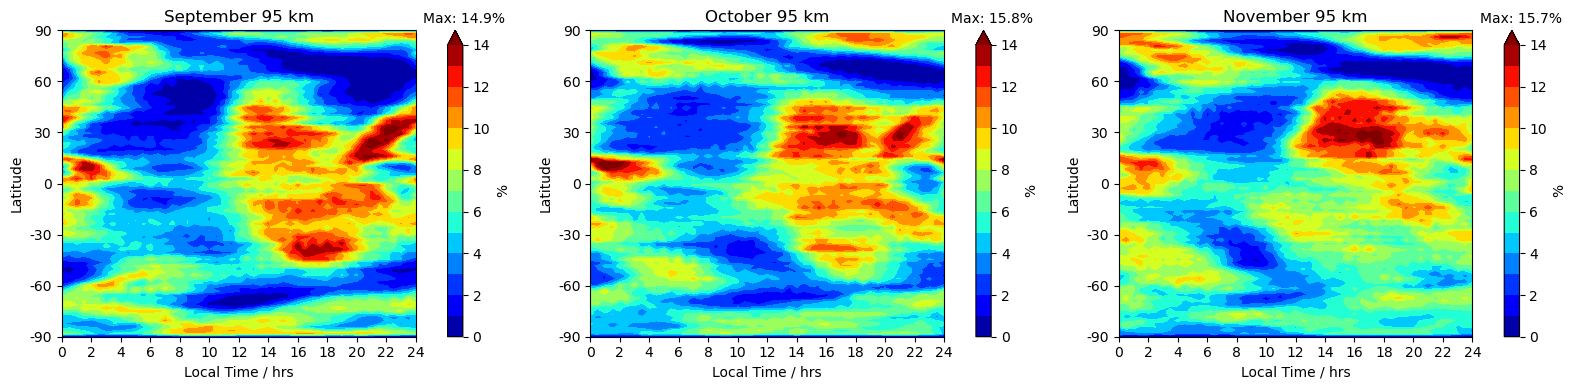

December
January
February


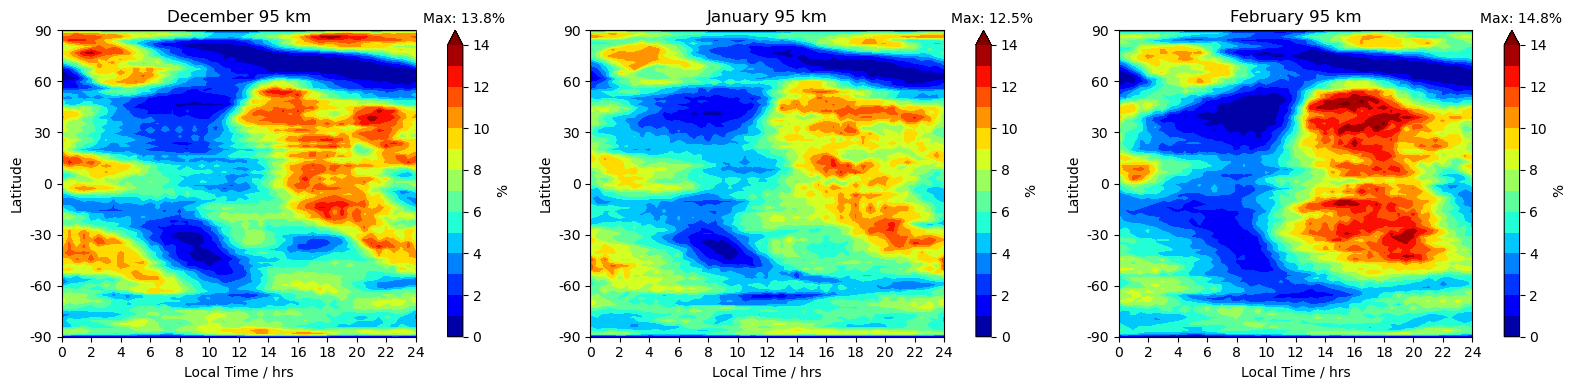

In [10]:
#SpEs Occ Freq plots - 
### Lat - Local Time ###
### Monthly average ###
#-------------------------------------------------------------------------

# Set chosen/multiple levs to plot for lat-LT at a specific alt
lev_sl_idx_plot_multi = np.array([4,8,14],dtype=int)  #[ 4,  8, 14]  ~114km,~105km,95km
lev_sl_idx_plot_multi_shape = len(lev_sl_idx_plot_multi)  #3
lev_plot_ar = np.arange(0,lev_sl_idx_plot_multi_shape)   #[0,1,2]`

#-------------------------------------------------------------------------
lev_sl_idx_plot_min = 0
lev_sl_idx_plot_max = 24
#print('      Plot Lev = ' + str("%.1e" % lev_sl[lev_sl_idx_plot_max]) + ' hPa' + ' : ' + str("%.1e" % lev_sl[lev_sl_idx_plot_min]) + ' hPa')
#print('      Approx Z = ' + str("%.0f" % Zavg_sl[lev_sl_idx_plot_max]) + ' km' + ' : ' + str("%.0f" %  Zavg_sl[lev_sl_idx_plot_min]) + ' km')

Zavg_sl_plott = Zavg_sl[lev_sl_idx_plot_min:lev_sl_idx_plot_max+1]
Zavg_sl_plott = Zavg_sl_plott.to_numpy()
#Zavg_sl_plottt = np.round_(Zavg_sl_plott, decimals=0)


Zavg_sl_plot_min = Zavg_sl_plott[0]
Zavg_sl_plot_max = Zavg_sl_plott[-1]

#-------------------Set up Local Time Ticks-------------------------------
# timeconv = lon / 15
# timeconv_plot = timeconv.to_numpy() 
timeplot = np.linspace(0, 24, 49)
timeconv_plot_ticks = np.arange(0,25, dtype=float)
#-------------------------------------------------------------------------

    
#Monthly average over all heights    

# Define the datasets and their corresponding month arrays
datasets = [
    {'name': 'Mar-May', 'data': spr_SpEs_Occ_Fr_b_avglev, 'months': ['March', 'April', 'May']},
    {'name': 'Jun-Aug', 'data': sum_SpEs_Occ_Fr_b_avglev, 'months': ['June', 'July', 'August']},
    {'name': 'Sep-Nov', 'data': aut_SpEs_Occ_Fr_b_avglev, 'months': ['September', 'October', 'November']},
    {'name': 'Dec-Feb', 'data': win_SpEs_Occ_Fr_b_avglev, 'months': ['December', 'January', 'February']}
]

# Iterate through each dataset
for dataset in datasets:
    dataset_name = dataset['name']
    dataset_data = dataset['data']
    months = dataset['months']

    # Create a figure for the current dataset
    fig, axes = plt.subplots(1, len(months), figsize=(16, 4))

    for i, month in enumerate(months):
        # Get the month name
        month_name = month
        #print(month_name)

        # Index the dataset_data with the current month directly
        month_data = dataset_data[:, :, i]
        month_data_plot = np.concatenate((month_data, month_data[:, :1]), axis=1)
    
        # Plot your data for the current month here
        ax = axes[i]
        #ax.set_title(f'Month {month}')
        ax.set_title(f'{month_name}')  # Set the title to the month name
        
        # Add your plotting code using month_data
        vmin = 0
        vmax = 9
        C = ax.contourf(timeplot, lat, month_data_plot, 
                     #levels=ticks,
                     #locator=ticker.LogLocator(),
                     #extend='max',
                     cmap=jet,
                     levels=np.linspace(vmin, vmax, 10), vmin=vmin, vmax=vmax
                     )
        
        ax.set_ylabel('Latitude')
        ax.set_yticks(np.linspace(-90,90, 7)) 
        ax.set_yticklabels((-90,-60,-30,0,30,60,90)) 

        ax.set_xlabel('Local Time / hrs')
        xticks = np.linspace(0,24,13) 
        ax.set_xticks(xticks) 
        ax.set_xticklabels(xticks.astype(int))
        
        cbar = fig.colorbar(C, pad=0.07)#,ticks=ticks[::2])#,format=ticker.FuncFormatter(fmt))#fraction=0.023, 
        cbar.set_label(r'%')

#         # Calculate the actual maximum value in your data
#         actual_max_value = np.max(month_data_plot)

#         # Add a text annotation to display the actual maximum value
#         ax.text(1.02, 1.06, f"Max: {actual_max_value:.1f}%", transform=ax.transAxes, ha='left', va='top', backgroundcolor='white')

        
    #plt.suptitle(f'{dataset_name}', fontsize=16)
    plt.tight_layout()

    # Save the figure or display it as needed
    figname = f'SpEs_Occ_Fr_b_avglev: Lat vs LT, {dataset_name}.png'
    #plt.savefig('./Figures/' + run_name +'/Oc_fr/All/Lat-LT/' + str(figname), dpi = 400, bbox_inches='tight')
    plt.show() 
    
  







# Monthly average Lat-LT at specific height
    
for iplev in lev_plot_ar:   #iterate over multiple levels for plots at a specific alt
    #---------------------------------------------------------------------------
    #print('Lat-LT plot setup:')
    lev_sl_idx_plot = lev_sl_idx_plot_multi[iplev]    #14 4.9e-04hPa~95km  #8 1.1e-04hPa~105km  #4 4.0e-05 hPa~114km

    lev_sl_plot = lev_sl[lev_sl_idx_plot]
    lev_sl_plot_str = str("%.1e" % lev_sl_plot) + ' hPa'
    #print('      Plot Lev = ' + lev_sl_plot_str )

    Zavg_sl_plot = Zavg_sl[lev_sl_idx_plot]
    Zavg_sl_plot_str = str("%.0f" % Zavg_sl_plot) + ' km'
    #print('      Approx Z = ' + Zavg_sl_plot_str )
    #===================================================================================================================================================
    
    
    
    # Define the datasets and their corresponding month arrays
    datasets = [
        {'name': 'Mar-May', 'data': spr_SpEs_Occ_Fr_b_avg[lev_sl_idx_plot,:,:,:], 'months': ['March', 'April', 'May']},
        {'name': 'Jun-Aug', 'data': sum_SpEs_Occ_Fr_b_avg[lev_sl_idx_plot,:,:,:], 'months': ['June', 'July', 'August']},
        {'name': 'Sep-Nov', 'data': aut_SpEs_Occ_Fr_b_avg[lev_sl_idx_plot,:,:,:], 'months': ['September', 'October', 'November']},
        {'name': 'Dec-Feb', 'data': win_SpEs_Occ_Fr_b_avg[lev_sl_idx_plot,:,:,:], 'months': ['December', 'January', 'February']}
    ]
    
    

    for dataset in datasets:
        dataset_name = dataset['name']
        dataset_data = dataset['data']
        months = dataset['months']
        # Create a figure for the current dataset
        fig, axes = plt.subplots(1, len(months), figsize=(16, 4))

        for i, month in enumerate(months):
            #print("lev_sl_idx_plot:", lev_sl_idx_plot)

            # Get the month name
            month_name = month
            print(month_name)

            # Index the dataset_data with the current month directly
            month_data = dataset_data[:, :, i]
            month_data_plot = np.concatenate((month_data, month_data[:, :1]), axis=1)

            # Plot your data for the current month here
            ax = axes[i]
            #ax.set_title(f'Month {month}')
            ax.set_title(f'{month_name} '+str(Zavg_sl_plot_str))  # Set the title to the month name

            # Add your plotting code using month_data
            vmin = 0
            vmax = 14
            C = ax.contourf(timeplot, lat, month_data_plot, 
                         #levels=ticks,
                         #locator=ticker.LogLocator(),
                         extend='max',
                         cmap=jet,
                         levels=np.linspace(vmin, vmax, 15), vmin=vmin, vmax=vmax
                         )

            ax.set_ylabel('Latitude')
            ax.set_yticks(np.linspace(-90,90, 7)) 
            ax.set_yticklabels((-90,-60,-30,0,30,60,90)) 

            ax.set_xlabel('Local Time / hrs')
            xticks = np.linspace(0,24,13) 
            ax.set_xticks(xticks) 
            ax.set_xticklabels(xticks.astype(int))

            cbar = fig.colorbar(C, pad=0.07)#,ticks=ticks[::2])#,format=ticker.FuncFormatter(fmt))#fraction=0.023, 
            cbar.set_label(r'%')

            # Calculate the actual maximum value in your data
            actual_max_value = np.max(month_data_plot)

            # Add a text annotation to display the actual maximum value
            ax.text(1.02, 1.06, f"Max: {actual_max_value:.1f}%", transform=ax.transAxes, ha='left', va='top', backgroundcolor='white')


        #plt.suptitle(f'{dataset2_name}', fontsize=16)
        plt.tight_layout()

        # Save the figure or display it as needed
        figname = f'SpEs_Occ_Fr_b_avg: Lat vs LT, {dataset_name} ' + Zavg_sl_plot_str + '.png'
        #print(figname)
        plt.savefig('./Figures/' + run_name +'/Oc_fr/All/Lat-LT/' + str(figname), dpi = 400, bbox_inches='tight')
        plt.show() 



    
    


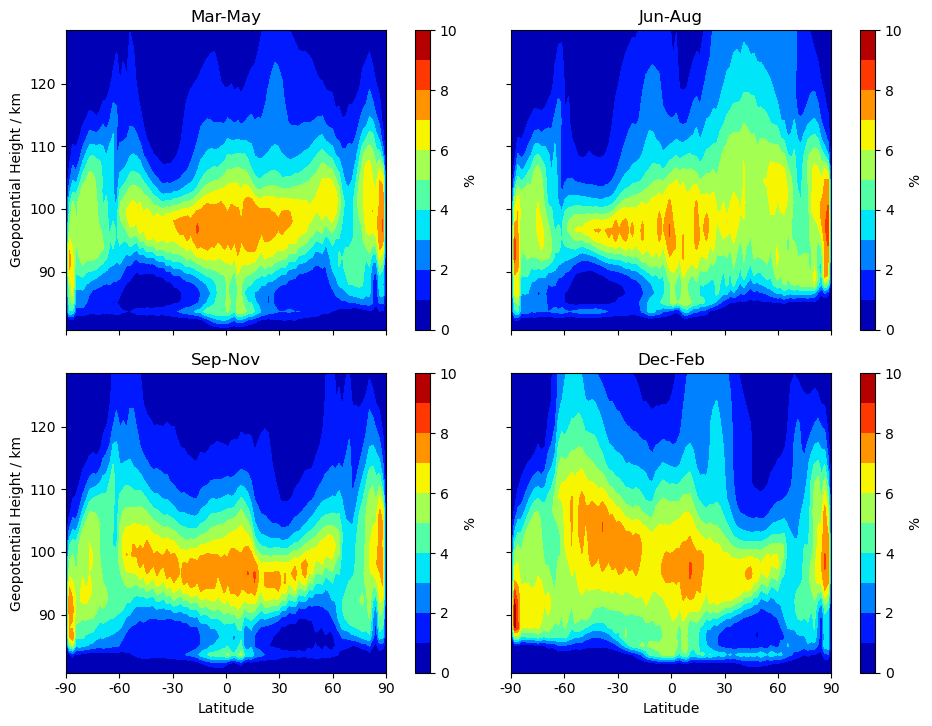

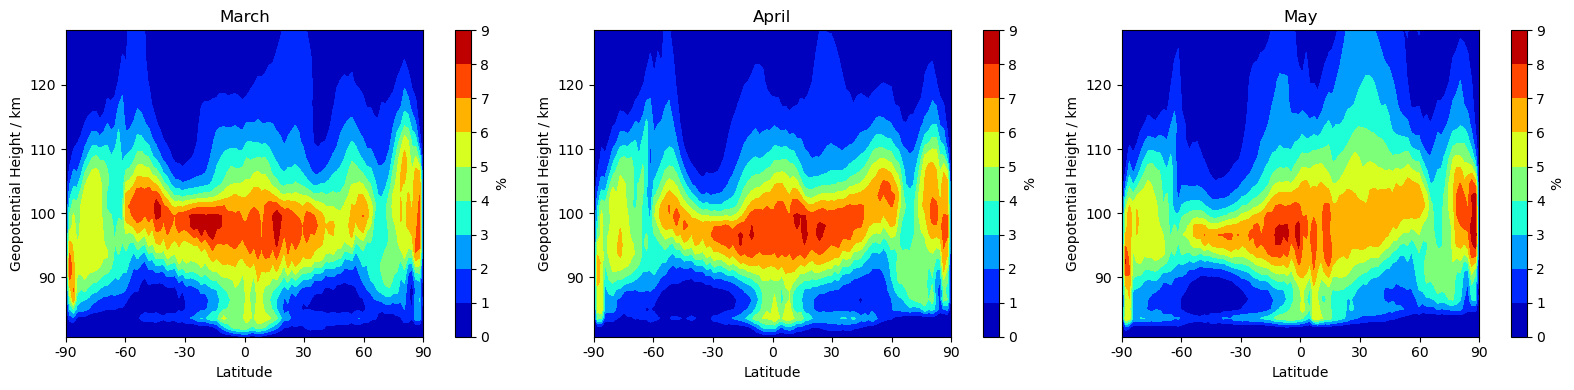

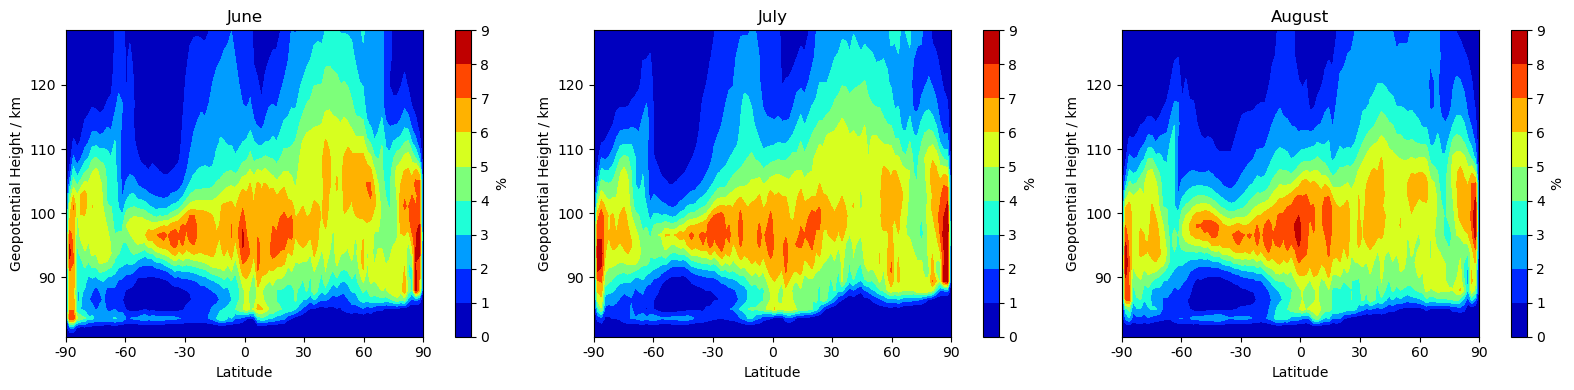

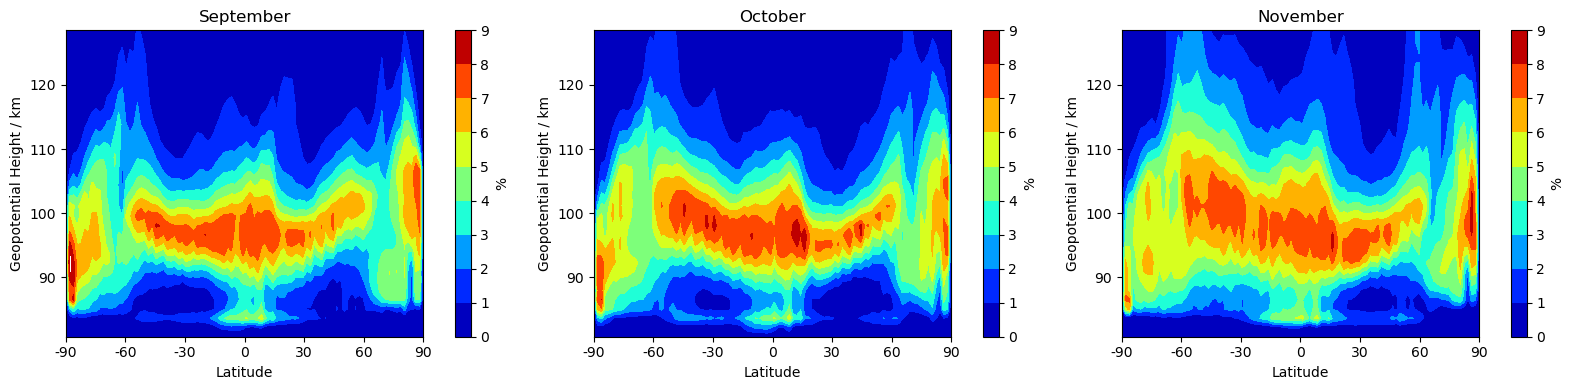

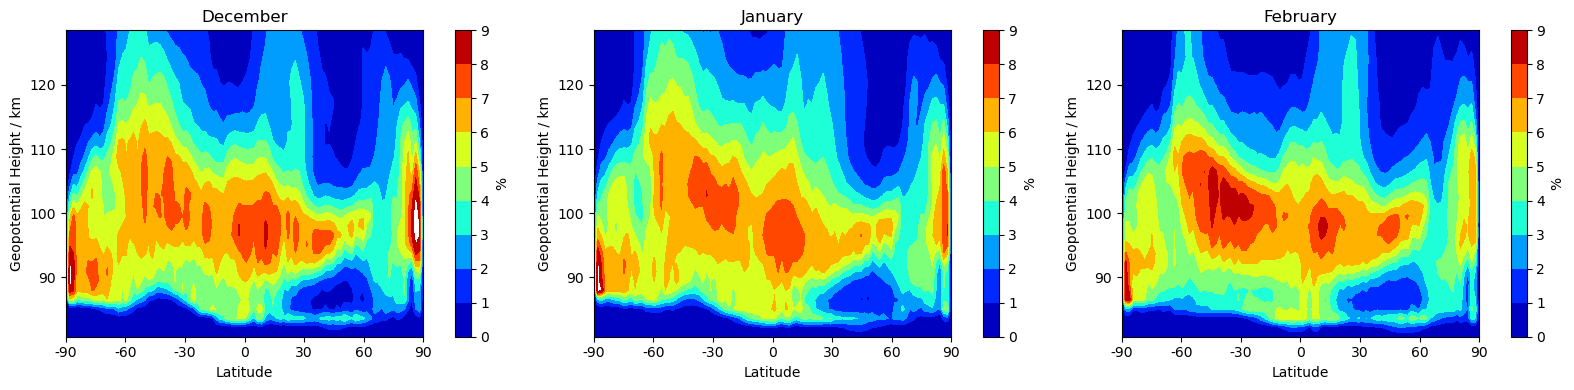

In [11]:
#SpEs Occ Freq plots - 
### Lev-Lat ###
### Dataset average ###
#-------------------------------------------------------------------------

lev_sl_idx_plot_min = 0
lev_sl_idx_plot_max = 24
#print('      Plot Lev = ' + str("%.1e" % lev_sl[lev_sl_idx_plot_max]) + ' hPa' + ' : ' + str("%.1e" % lev_sl[lev_sl_idx_plot_min]) + ' hPa')
#print('      Approx Z = ' + str("%.0f" % Zavg_sl[lev_sl_idx_plot_max]) + ' km' + ' : ' + str("%.0f" %  Zavg_sl[lev_sl_idx_plot_min]) + ' km')

Zavg_sl_plott = Zavg_sl[lev_sl_idx_plot_min:lev_sl_idx_plot_max+1]
Zavg_sl_plott = Zavg_sl_plott.to_numpy()

Zavg_sl_plot_min = Zavg_sl_plott[0]
Zavg_sl_plot_max = Zavg_sl_plott[-1]











#--------------------Dataset avg over all heights -----------------------------------------
#---------------------------------------------------------------------------------------------
#---------------------------------------------------------------------


# Create a 2x2 subplot grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), sharex=True, sharey=True)

# Set common colorbar properties
vmin = 0
vmax = 10
cmap = plt.get_cmap('jet')
# Plot the data in each subplot
subplots = [spr_SpEs_Occ_Fr_b_dsavgLT, sum_SpEs_Occ_Fr_b_dsavgLT, aut_SpEs_Occ_Fr_b_dsavgLT, win_SpEs_Occ_Fr_b_dsavgLT]
titles = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']

for i, data in enumerate(subplots):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    C = ax.contourf(lat, Zavg_sl, data, cmap=jet, levels=np.linspace(vmin, vmax, 11), vmin=vmin, vmax=vmax)
    
    if row == 1:
        ax.set_xlabel('Latitude')
        ax.set_xticks(np.linspace(-90, 90, 7))
        ax.set_xticklabels((-90, -60, -30, 0, 30, 60, 90))
    if col == 0:
        ax.set_ylabel('Geopotential Height / km')
        ax.set_ylim(Zavg_sl_plot_max,Zavg_sl_plot_min)
        
    #ax.set_xticks(np.linspace(-90, 90, 7))
    #ax.set_xticklabels(xticks.astype(int))

    cbar = fig.colorbar(C, ax=ax, pad=0.07)
    cbar.set_label(r'%')
    
    ax.set_title(titles[i])

plt.tight_layout(rect=[0.05, 0.03, 1, 0.95])

cbar.set_label(r'%')

figname= 'SpEs_Occ_Fr_b_dsavgLT: Lev vs Lat'  + '.png'

plt.savefig('./Figures/' + run_name +'/Oc_fr/All/Lev-Lat/'+str(figname), dpi = 400, bbox_inches='tight') #
#---------------------------------------------------------------------------------------------------









    
 




# Define the datasets and their corresponding month arrays
datasets = [
    {'name': 'Mar-May', 'data': spr_SpEs_Occ_Fr_b_avgLT, 'months': ['March', 'April', 'May']},
    {'name': 'Jun-Aug', 'data': sum_SpEs_Occ_Fr_b_avgLT, 'months': ['June', 'July', 'August']},
    {'name': 'Sep-Nov', 'data': aut_SpEs_Occ_Fr_b_avgLT, 'months': ['September', 'October', 'November']},
    {'name': 'Dec-Feb', 'data': win_SpEs_Occ_Fr_b_avgLT, 'months': ['December', 'January', 'February']}
]


for dataset in datasets:
    dataset_name = dataset['name']
    dataset_data = dataset['data']
    months = dataset['months']

    # Create a figure for the current dataset
    fig, axes = plt.subplots(1, len(months), figsize=(16, 4))

    for i, month in enumerate(months):
        # Get the month name
        month_name = month
        #print(month_name)

        # Index the dataset_data with the current month directly
        month_data = dataset_data[:, :, i]

        
        # Plot your data for the current month here
        ax = axes[i]
        #ax.set_title(f'Month {month}')
        ax.set_title(f'{month_name}')  # Set the title to the month name
        
        # Add your plotting code using month_data
        vmin = 0
        vmax = 9
        C = ax.contourf(lat, Zavg_sl, month_data, 
                     #levels=ticks,
                     #locator=ticker.LogLocator(),
                     #extend='max',
                     cmap=jet,
                     levels=np.linspace(vmin, vmax, 10), vmin=vmin, vmax=vmax
                     )
        
        ax.set_xlabel('Latitude')
        ax.set_xticks(np.linspace(-90, 90, 7))
        ax.set_xticklabels((-90, -60, -30, 0, 30, 60, 90))

        ax.set_ylabel('Geopotential Height / km')
        ax.set_ylim(Zavg_sl_plot_max,Zavg_sl_plot_min)

        
        cbar = fig.colorbar(C, pad=0.07)#, shrink=0.23)#,ticks=ticks[::2])#,format=ticker.FuncFormatter(fmt))#fraction=0.023, 
        cbar.set_label(r'%')

#         # Calculate the actual maximum value in your data
#         actual_max_value = np.max(month_data_plot)

#         # Add a text annotation to display the actual maximum value
#         ax.text(1.02, 1.06, f"Max: {actual_max_value:.1f}%", transform=ax.transAxes, ha='left', va='top', backgroundcolor='white')

        
    #plt.suptitle(f'{dataset_name}', fontsize=16)
    plt.tight_layout()

    # Save the figure or display it as needed
    figname = f'SpEs_Occ_Fr_b_avgLT: Lev vs Lat, {dataset_name}.png'
    #print(figname)
    plt.savefig('./Figures/' + run_name +'/Oc_fr/All/Lev-Lat/' + str(figname), dpi = 400, bbox_inches='tight')
    plt.show() 
    
  


FileNotFoundError: [Errno 2] No such file or directory: './Figures/COSMIC/Lat-Lon/SpEs_Occ_Fr_bb_5d_dsavg: Lev vs LT.png'

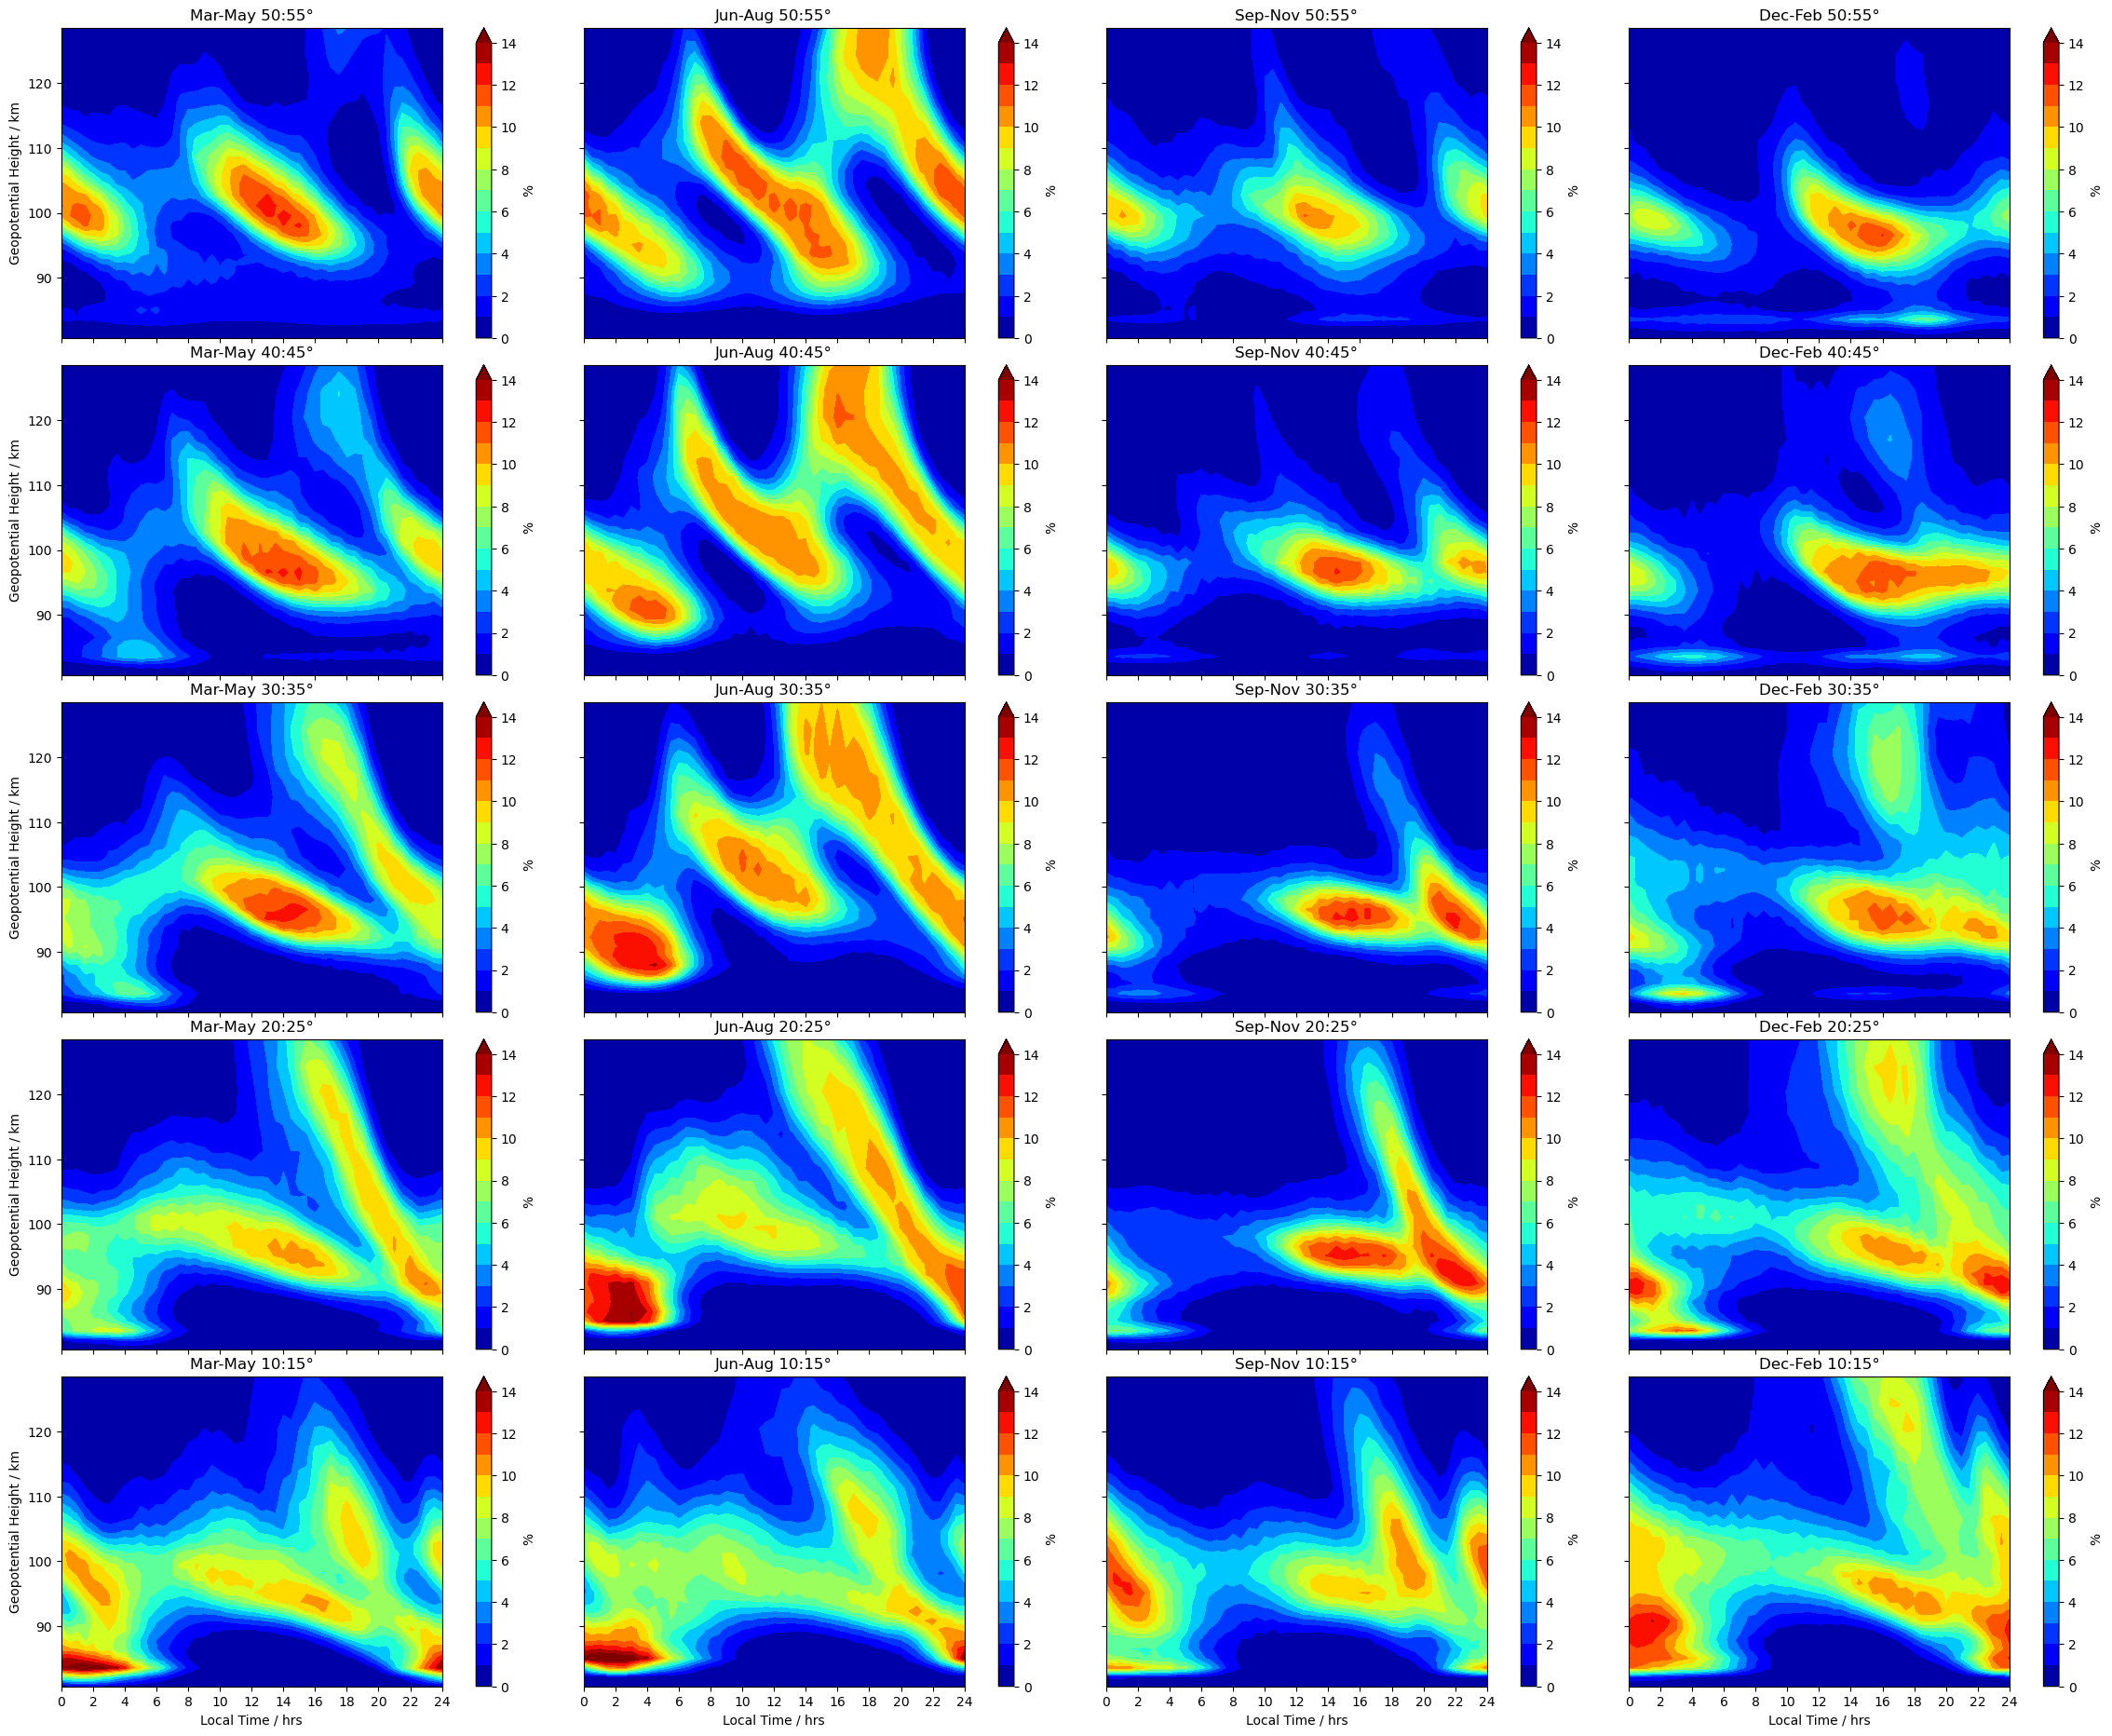

In [12]:
#SpEs Occ Freq plots
### Lev-LT ###
### Monthly and dataset average ###
#-------------------------------------------------------------------------

# Set chosen/multiple lat slices to plot
intlat_plot_idx_multi = np.array([20,22,24,26,28],dtype=int) #+ve lats 10-15', 20-25' --> 50-55'       #[7,9,11,13,15],dtype=int) #-ve lats 10-15', 20-25' --> 50-55'     
intlat_plot_idx_multi_shape = len(intlat_plot_idx_multi)  
intlat_plot_ar = np.arange(0,intlat_plot_idx_multi_shape) 
#intlat_plot_ar = intlat_plot_ar[::-1]

#---------------Set up lev/alt--------------------
lev_sl_idx_plot_min = 0
lev_sl_idx_plot_max = 24
#print('      Plot Lev = ' + str("%.1e" % lev_sl[lev_sl_idx_plot_max]) + ' hPa' + ' : ' + str("%.1e" % lev_sl[lev_sl_idx_plot_min]) + ' hPa')
#print('      Approx Z = ' + str("%.0f" % Zavg_sl[lev_sl_idx_plot_max]) + ' km' + ' : ' + str("%.0f" %  Zavg_sl[lev_sl_idx_plot_min]) + ' km')

Zavg_sl_plott = Zavg_sl[lev_sl_idx_plot_min:lev_sl_idx_plot_max+1]
Zavg_sl_plott = Zavg_sl_plott.to_numpy()
#Zavg_sl_plottt = np.round_(Zavg_sl_plott, decimals=0)

Zavg_sl_plot_min = Zavg_sl_plott[0]
Zavg_sl_plot_max = Zavg_sl_plott[-1]

#-------------------Set up Local Time Ticks-------------------------------
# timeconv = lon / 15
# timeconv_plot = timeconv.to_numpy() 
timeplot = np.linspace(0, 24, 49)
timeconv_plot_ticks = np.arange(0,25, dtype=float)



levLTticks = np.linspace(0, 16, 17)






# Define your data arrays or structures here (replace with your actual data)
# Example data shapes: (25, 36, 48) - 25 altitude levels, 36 latitude bands, 48 local times
# Replace these placeholders with your actual data.
win_SpEs_Occ_Fr_bb_5d_dsavg_plot = win_SpEs_Occ_Fr_bb_5d_dsavg
spr_SpEs_Occ_Fr_bb_5d_dsavg_plot = spr_SpEs_Occ_Fr_bb_5d_dsavg
sum_SpEs_Occ_Fr_bb_5d_dsavg_plot = sum_SpEs_Occ_Fr_bb_5d_dsavg
aut_SpEs_Occ_Fr_bb_5d_dsavg_plot = aut_SpEs_Occ_Fr_bb_5d_dsavg

# Define your latitude bands
intlat_plot_idx_multi = np.array([20, 22, 24, 26, 28], dtype=int)
# Reverse the order of latitude bands
intlat_plot_idx_multi = np.flip(intlat_plot_idx_multi)

# Assuming you have defined your other variables as well, e.g., Zavg_sl, Zavg_sl_plot_min, Zavg_sl_plot_max, timeplot, and jet colormap

# Define the seasons and titles
seasons = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']

# Create a 4xN subplot grid, where N is the number of seasons
num_seasons = len(seasons)
fig, axes = plt.subplots(nrows=5, ncols=num_seasons, figsize=(24, 4*5), sharex=True, sharey=True)

# Set common colorbar properties
vmin = 0
vmax = 14
cmap = plt.get_cmap('jet')

plt.tight_layout(rect=[0.05, 0.03, 1, 0.95])

for i_season, season in enumerate(seasons):
    for i_lat_band, lat_plot_idx in enumerate(intlat_plot_idx_multi):
        lat_plot_1 = intlat[lat_plot_idx] - 2.5
        lat_plot_2 = intlat[lat_plot_idx] + 2.5
        lat_plot_str1 = str("%.0f" % lat_plot_1)
        lat_plot_str2 = str("%.0f" % lat_plot_2)

        
        
        degrees_sign = "\u00b0"
        titles = f'{season} {lat_plot_str1}:{lat_plot_str2}{degrees_sign}'
        
        # Define the data array for this specific season and latitude band
        if season == 'Mar-May':
            data = spr_SpEs_Occ_Fr_bb_5d_dsavg_plot[:, lat_plot_idx, :]
            datac = np.concatenate((data, data[:, :1]), axis=1)
        elif season == 'Jun-Aug':
            data = sum_SpEs_Occ_Fr_bb_5d_dsavg_plot[:, lat_plot_idx, :]
            datac = np.concatenate((data, data[:, :1]), axis=1)
        elif season == 'Sep-Nov':
            data = aut_SpEs_Occ_Fr_bb_5d_dsavg_plot[:, lat_plot_idx, :]
            datac = np.concatenate((data, data[:, :1]), axis=1)
        elif season == 'Dec-Feb':
            data = win_SpEs_Occ_Fr_bb_5d_dsavg_plot[:, lat_plot_idx, :]
            datac = np.concatenate((data, data[:, :1]), axis=1)

        # Create subplots for each latitude band within the current season
        ax = axes[i_lat_band, i_season]

        C = ax.contourf(timeplot, Zavg_sl, datac, cmap=jet, levels=np.linspace(vmin, vmax, 15), extend='max', vmin=vmin, vmax=vmax)

        if i_lat_band == 4:
            ax.set_xlabel('Local Time / hrs')
            xticks = np.linspace(0, 24, 13)
            ax.set_xticks(xticks)
            ax.set_xticklabels(xticks.astype(int))

        if i_season == 0:
            ax.set_ylabel('Geopotential Height / km')
            ax.set_ylim(Zavg_sl_plot_max, Zavg_sl_plot_min)

        cbar = fig.colorbar(C, ax=ax, pad=0.07)
        cbar.set_label(r'%')

        ax.set_title(titles)

figname = f'SpEs_Occ_Fr_bb_5d_dsavg: Lev vs LT.png'
plt.savefig('./Figures/COSMIC/Lat-Lon/' + str(figname), dpi=400, bbox_inches='tight')
        
plt.show()
    
    
    
    
    
    
    
    
        
# OLD CODE NOT EDITED TO PRODUCE FIGURES USING NEW NC DATA / MULTI-PANEL FIGURES. Shouldn't need monthly figures of these plots so haven't done it        

#     for ids in ds_months_ar:   #iterate over month
#         #--------------Set value for ids for plot variables-----------------------
#         ids_plot = ids
#         str_ids_plot = str(ids_plot)
#         #print('Plot month ' + str_ids_plot + ': ' + str(ds_months[ids_plot]) )  



#         #------------------------Monthly avg (lev, lat, LT, ids)--------------------------------------------
#         #-----------------------------------Lev-LT in specific lat band ----------------------------------------------------------
#         #------------------------data averaged in 5' lat slices---------------------------------------------

#         SpEs_Occ_Fr_bb_5d_avg_plot2 = SpEs_Occ_Fr_bb_5d_avg[:,intlat_plot_idx,:,ids_plot]   # =Monthly avg   ->(25, 36, 48, 3)    lev, lat, LT, month
#         SpEs_Occ_Fr_bb_5d_avg_plot2e = np.concatenate((SpEs_Occ_Fr_bb_5d_avg_plot2, SpEs_Occ_Fr_bb_5d_avg_plot2[:, :1]), axis=1)
        
#         #-----------------------------------------------------

#         #ticks = np.linspace(0, 14, 15)
#         ticks = levLTticks
#         #ticks = np.linspace(0, 16, 17)
#         #ticks = np.linspace(0, 40, 21) #(F)
#         vmin = 0
#         vmax = 14

#         fig, ax = plt.subplots()

#         C = ax.contourf(timeplot, Zavg_sl, SpEs_Occ_Fr_bb_5d_avg_plot2e,   #lev_sl
#                          #levels=ticks,
#                          #locator=ticker.LogLocator(),
#                          extend='max',
#                          cmap=jet,
#                          levels=np.linspace(vmin, vmax, 15), vmin=vmin, vmax=vmax
#                          )


#         aspect_ratio = 0.27  # Width / Height
#         ax.set_aspect(aspect_ratio)

#         #ax.set_yscale('log')
#         #ax.set_ylabel('Pressure / HPa')
#         #ax.set_ylim(lev_sl_plot_max, lev_sl_plot_min) 

#         #ax2 = ax.twinx()
#         #ax2.set_ylabel('Approx Geopotential Height / Km')
#         #ax2.set_ylim(Zavg_sl_plot_max,Zavg_sl_plot_min)
#         #ax2.set_yticklabels(Zavg_sl_plottt[lev_sl_idx_plot_max:lev_sl_idx_plot_min:-5])

#         ax.set_ylabel('Geopotential Height / km')
#         ax.set_ylim(Zavg_sl_plot_max,Zavg_sl_plot_min)


#         ax.set_xlabel('Local Time / hrs')
        
#         xticks = np.linspace(0,24,13) 
#         ax.set_xticks(xticks) 
#         ax.set_xticklabels(xticks.astype(int))
       
#         # ax.set_title('SpEs_Occ_Fr_bb_5d_avg_plot2, Lev vs LT, lat'  + lat_plot_str1 + ':' + lat_plot_str2 + ', \n UT ' + str(times_str_min[ids_plot][0]) + ' : ' + str(times_str_max[ids_plot][-1]) )
        

#         #ax.grid(axis='x',color = 'grey', linestyle = '-', linewidth = 0.5)
#         #plt.grid(axis='y',color = 'grey', linestyle = '-', linewidth = 0.5)

#         cbar_ax = fig.add_axes([0.95, 0.23, 0.03, 0.52])  # Adjust these values to position and size the colorbar # [x, y, width, height]
#         cbar = plt.colorbar(C, cax=cbar_ax)
#         cbar.set_label(r'%')

#         # Calculate the actual maximum value in your data
#         actual_max_value = np.max(SpEs_Occ_Fr_bb_5d_avg_plot2e)

#         # Add a text annotation to display the actual maximum value
#         ax.text(1.02, 1.04, f"Max: {actual_max_value:.1f}%", transform=ax.transAxes, ha='left', va='top', backgroundcolor='white')
  
        
#         figname=  'SpEs_Occ_Fr_bb_5d_avg_plot2: Lev vs LT, lat'  + lat_plot_str1 + ':' + lat_plot_str2 + ' ' + str(times_str_min[ids_plot][0]) + ' : ' + str(times_str_max[ids_plot][-1]) + '.png'
   

#         #plt.tight_layout()
#         plt.savefig('./Figures/' + run_name +'/Oc_fr/' + Monthfolderstr +  '/Lev-LT/'+str(figname), dpi = 400, bbox_inches='tight') #
#         #---------------------------------------------------------------------------------------------------




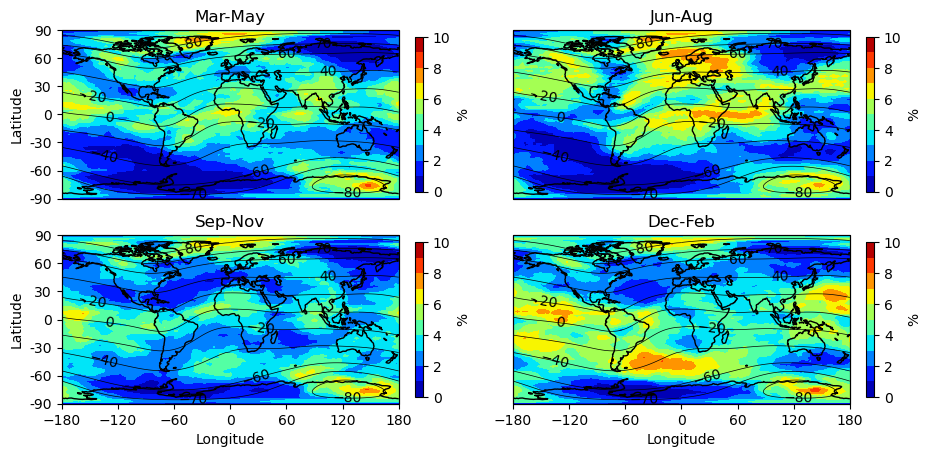

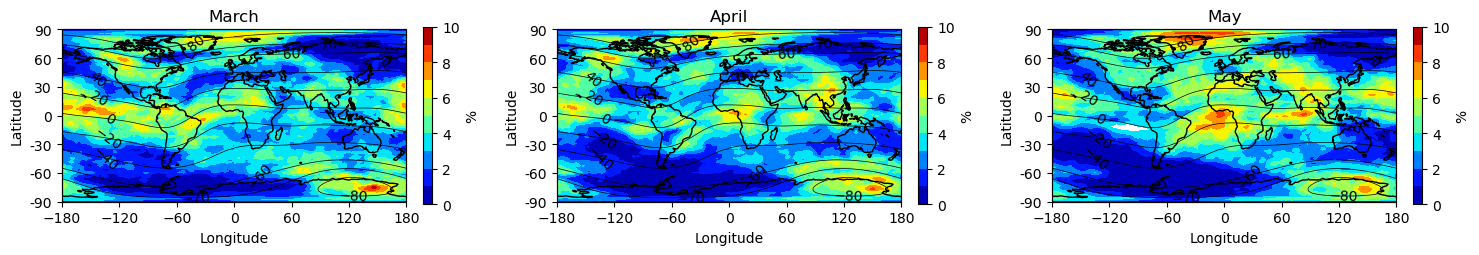

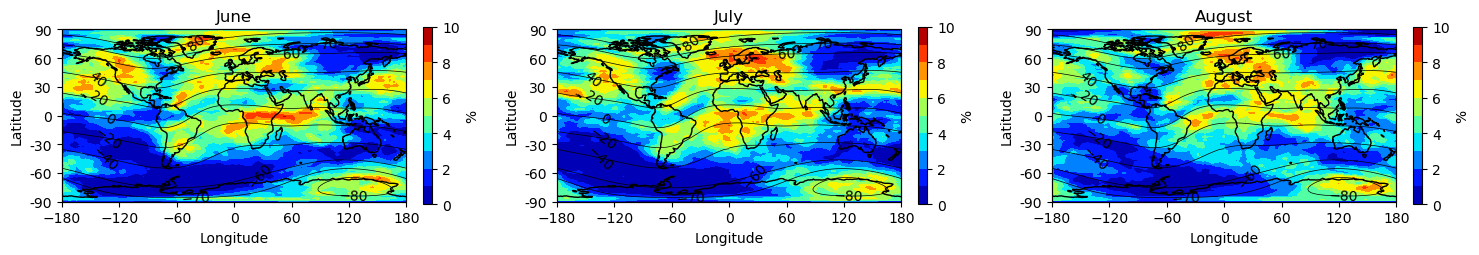

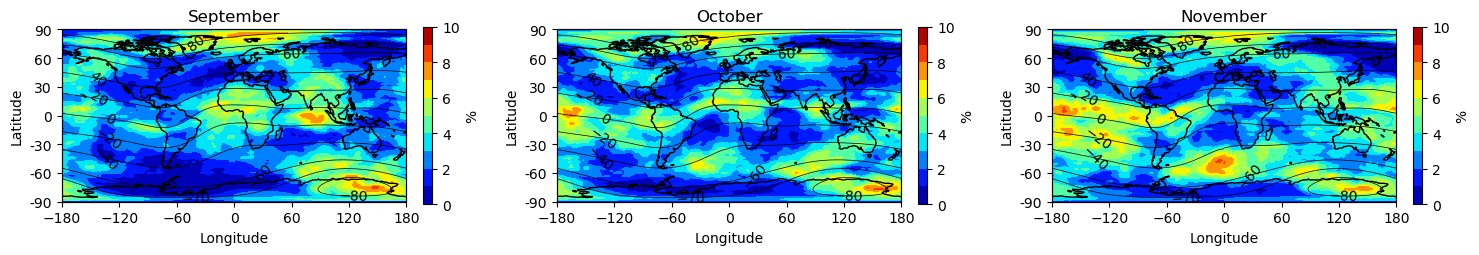

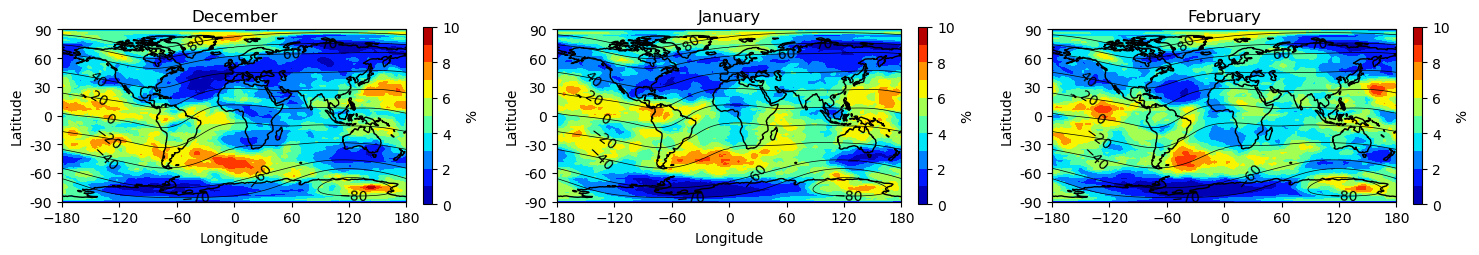

In [13]:
#SpEs Occ Freq plots
### Lat-Lon ###
### Monthly and dataset average ###
#-------------------------------------------------------------------------



filename='Nc_Files/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport.cam.h0.0001-06.nc' 
ds = xr.open_dataset(filename)
ALATM = ds.variables['ALATM'] #Magnetic latitude at each geographic coordinate



#------------------------Dataset avg (lat, lon)--------------------------------------------
#-----------------------Lat-Lon over all heights ------------------------------------------
#------------------------------------------------------------------------------------------


# Convert xarray Variable to NumPy array and set last value to 360
lon_plot = lon.values
lon_plot[-1] = 360.


# Create a 2x2 subplot grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,5), 
                         sharex=True, sharey=True, 
                         subplot_kw={'projection': ccrs.PlateCarree(central_longitude=0)})


# Set common colorbar properties
vmin = 0
vmax = 10
cmap = plt.get_cmap('jet')
# Plot the data in each subplot
subplots = [spr_SpEsns_Occ_Fr_dsavglev, sum_SpEsns_Occ_Fr_dsavglev, aut_SpEsns_Occ_Fr_dsavglev, win_SpEsns_Occ_Fr_dsavglev]
titles = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']


for i, data in enumerate(subplots):
    row = i // 2
    col = i % 2
    ax = axes[row, col]    
    
    C = ax.contourf(lon_plot, lat, data, cmap=jet, levels=np.linspace(vmin, vmax, 11), vmin=vmin, vmax=vmax)
    
    if row == 1:
        ax.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
        ax.set_xlabel('Longitude')
    if col == 0:
        ax.set_ylabel('Latitude')
        ax.set_yticks(np.linspace(-90, 90, 7))
        ax.set_yticklabels((-90, -60, -30, 0, 30, 60, 90))
        

    cbar = fig.colorbar(C, ax=ax, pad=0.04, shrink=0.8)
    cbar.set_label(r'%') 
        
    ax.coastlines() 
    

    ax.set_title(titles[i])
    
    # Add contour lines to each subplot individually
    ax2 = fig.add_subplot(axes[row, col].get_subplotspec(), projection=ccrs.PlateCarree())
    
    ax2.set_global()
    contour_levels = [-80, -70, -60, -40, -20, 0, 20, 40, 60, 70, 80]
    contour = ax2.contour(lon, lat, ALATM[0, :, :],
                          transform=ccrs.PlateCarree(),
                          colors='black',
                          levels=contour_levels, vmin=-90, vmax=90,
                          linestyles='solid',
                          linewidths=0.5
                          )
    
    ax2.patch.set_facecolor('none')
    clabels = ax2.clabel(contour, inline=True, fontsize=10) 

plt.tight_layout(rect=[0.05, 0.03, 1, 0.95])

# cbar = fig.colorbar(C, ax=ax, pad=0.07)
# cbar.set_label(r'%')

figname= 'SpEsns_Occ_Fr_dsavglev: Lat vs Lon'  + '.png'

plt.savefig('./Figures/' + run_name +'/Oc_fr/All/Lat-Lon/'+str(figname), dpi = 400, bbox_inches='tight') #
# ---------------------------------------------------------------------------------------------------







    

#SpEsns_Occ_Fr_avglev[:,:,ids] (96, 144, 3)
#------------------------Monthly avg (lat, lon)--------------------------------------------
#-----------------------Lat-Lon over all heights ------------------------------------------
#------------------------------------------------------------------------------------------
   
    

# Convert xarray Variable to NumPy array and set last value to 360
lon_plot = lon.values
lon_plot[-1] = 360.

# Define the datasets and their corresponding month arrays
datasets = [
        {'name': 'Mar-May', 'data': spr_SpEsns_Occ_Fr_avglev, 'months': ['March', 'April', 'May']},
        {'name': 'Jun-Aug', 'data': sum_SpEsns_Occ_Fr_avglev, 'months': ['June', 'July', 'August']},
        {'name': 'Sep-Nov', 'data': aut_SpEsns_Occ_Fr_avglev, 'months': ['September', 'October', 'November']},
        {'name': 'Dec-Feb', 'data': win_SpEsns_Occ_Fr_avglev, 'months': ['December', 'January', 'February']}
]


for dataset in datasets:
    dataset_name = dataset['name']
    dataset_data = dataset['data']
    months = dataset['months']

    # Create a figure for the current dataset
    fig, axes = plt.subplots(1, len(months), figsize=(15, 8), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=0)})

    for i, month in enumerate(months):
        # Get the month name
        month_name = month
        #print(month_name)

        # Index the dataset_data with the current month directly
        month_data = dataset_data[:, :, i]

        ax = axes[i]
        ax.set_title(f'{month_name} '+str(Zavg_sl_plot_str))

        
        ax = axes[i]
    
        ax.set_title(f'{month_name}')  # Set the title to the month name
        
        # Add your plotting code using month_data
        vmin = 0
        vmax = 10
        nolevs = vmax - vmin + 1
        C = ax.contourf(lon_plot, lat, month_data, 
                     #levels=ticks,
                     #locator=ticker.LogLocator(),
                     #extend='max',
                     cmap=jet,
                     levels=np.linspace(vmin, vmax, nolevs), vmin=vmin, vmax=vmax
                     )
        

        ax.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
        ax.set_xlabel('Longitude')
        
        ax.set_ylabel('Latitude')
        ax.set_yticks(np.linspace(-90, 90, 7))
        ax.set_yticklabels((-90, -60, -30, 0, 30, 60, 90))
        
        cbar = fig.colorbar(C, pad=0.04, shrink=0.23)#,ticks=ticks[::2])#,format=ticker.FuncFormatter(fmt))#fraction=0.023, 
        cbar.set_label(r'%')

        ax.coastlines() 
      
   
        ax2_x = 0.0  # Adjust as needed for the horizontal position
        ax2_y = 0.0  # Adjust as needed for the vertical position
        ax2_width = 1.0  # Adjust as needed for the width
        ax2_height = 1.0  # Adjust as needed for the height

        # Plot ALATM[0, :, :] on a second axis
        ax2 = ax.inset_axes([ax2_x, ax2_y, ax2_width, ax2_height], projection=ccrs.PlateCarree())

        ax2.set_global()
        contour_levels = [-80, -70, -60, -40, -20, 0, 20, 40, 60, 70, 80]
        contour = ax2.contour(lon, lat, ALATM[0, :, :],
                              transform=ccrs.PlateCarree(),
                              colors='black',
                              levels=contour_levels, vmin=-90, vmax=90,
                              linestyles='solid',
                              linewidths=0.5
                              )

        ax2.patch.set_facecolor('none')
        clabels = ax2.clabel(contour, inline=True, fontsize=10)

        
    #plt.suptitle(f'{dataset_name}', fontsize=16)
    plt.tight_layout()

    # Save the figure or display it as needed
    figname = f'SpEsns_Occ_Fr_avglev: Lat vs Lon, {dataset_name}.png'
    #print(figname)
    plt.savefig('./Figures/' + run_name +'/Oc_fr/All/Lat-Lon/' + str(figname), dpi = 400, bbox_inches='tight')
    plt.show() 
    

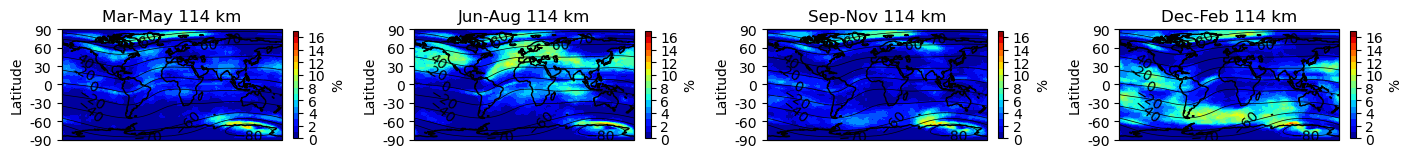

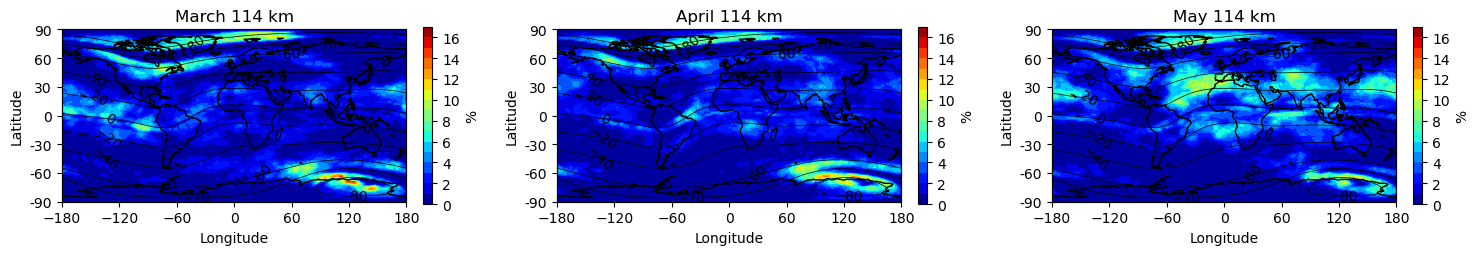

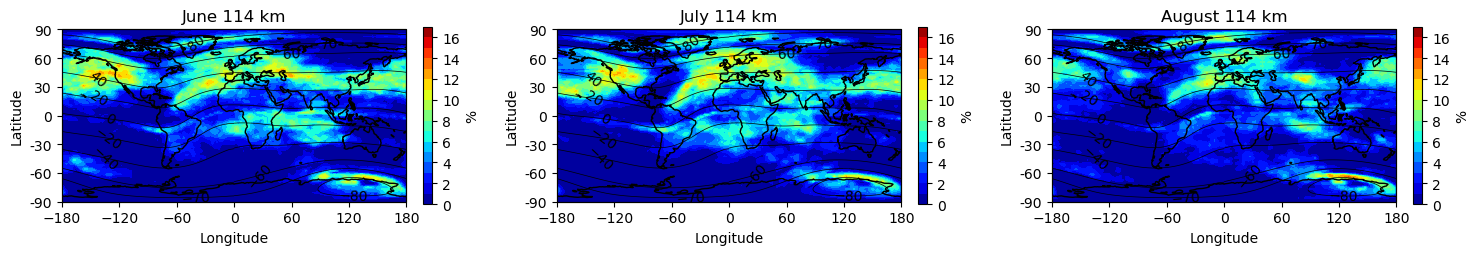

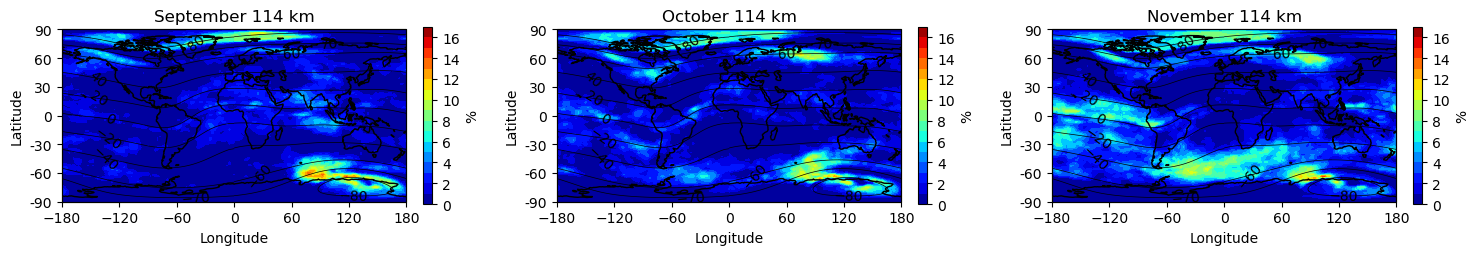

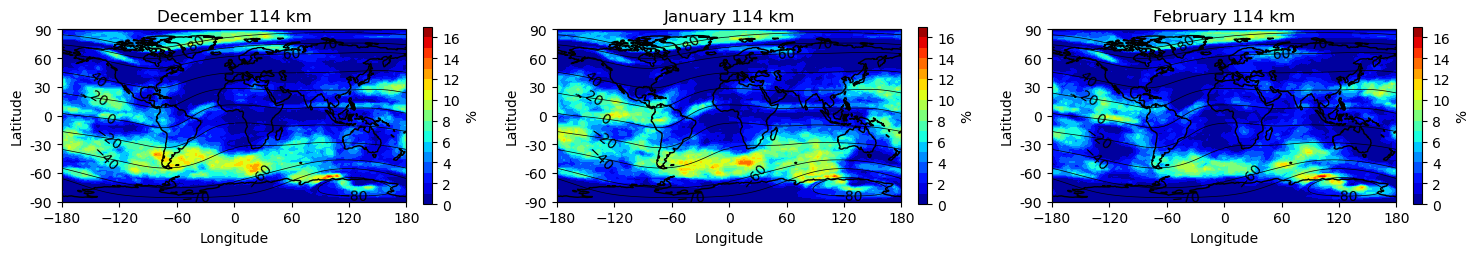

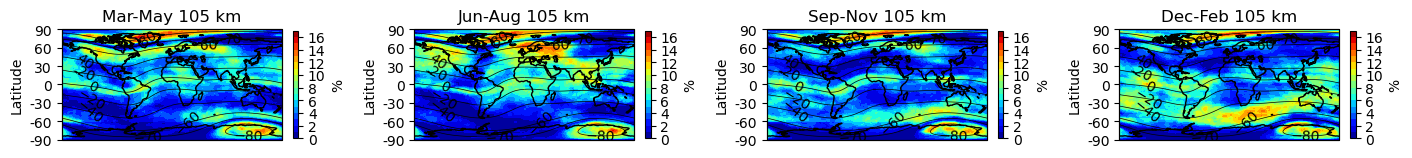

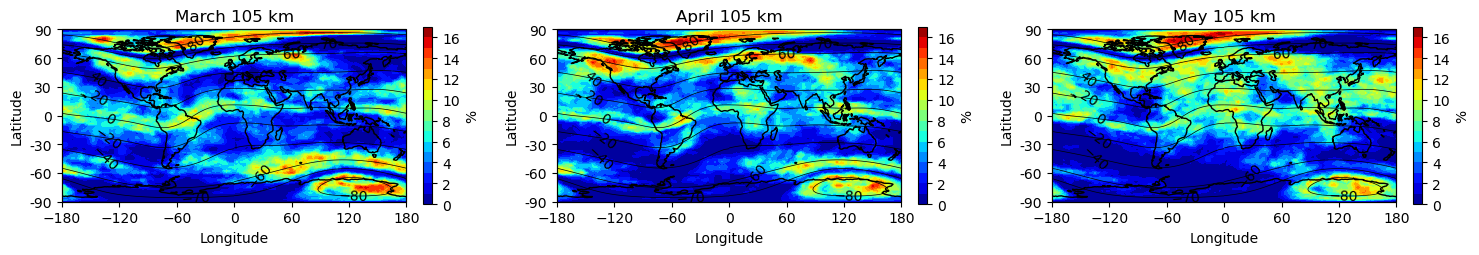

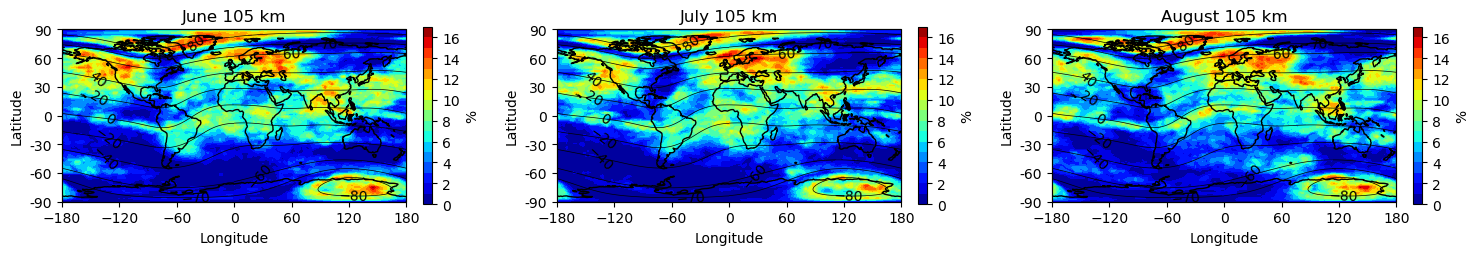

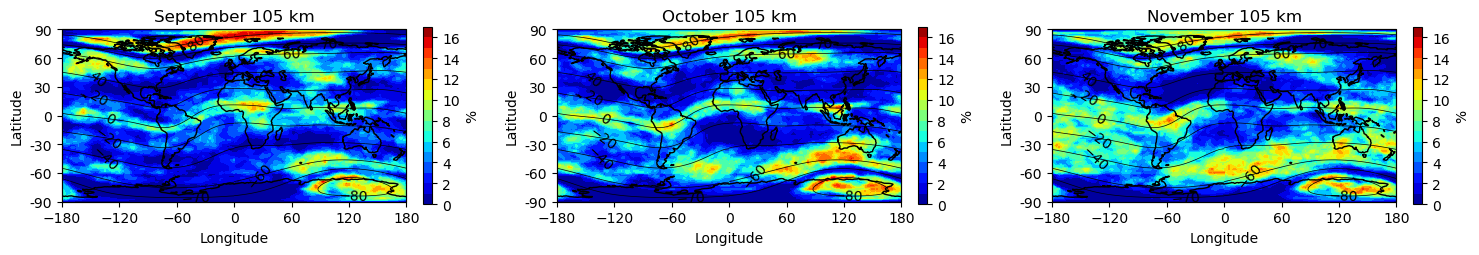

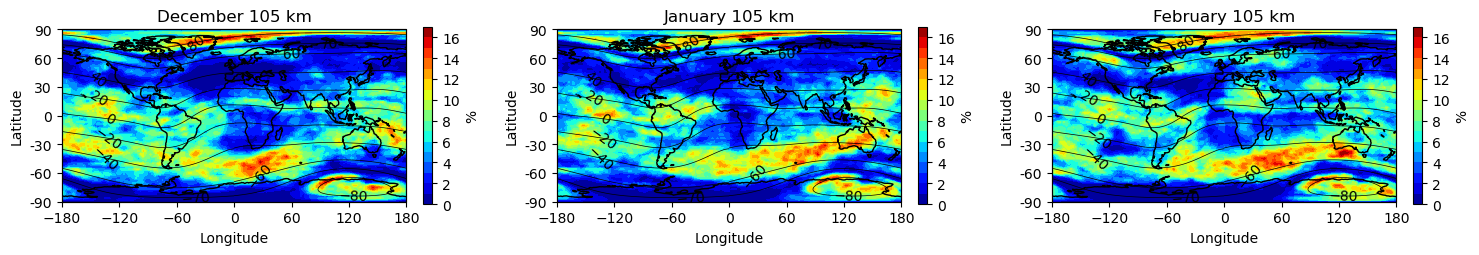

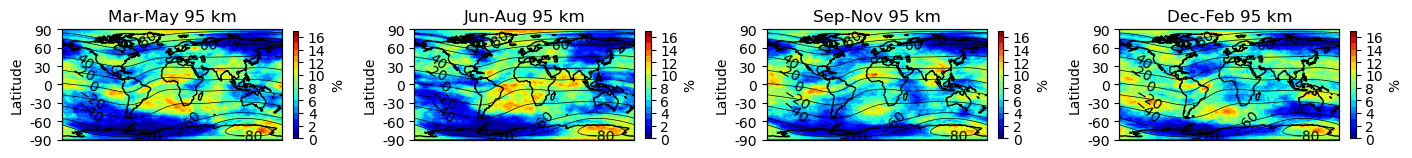

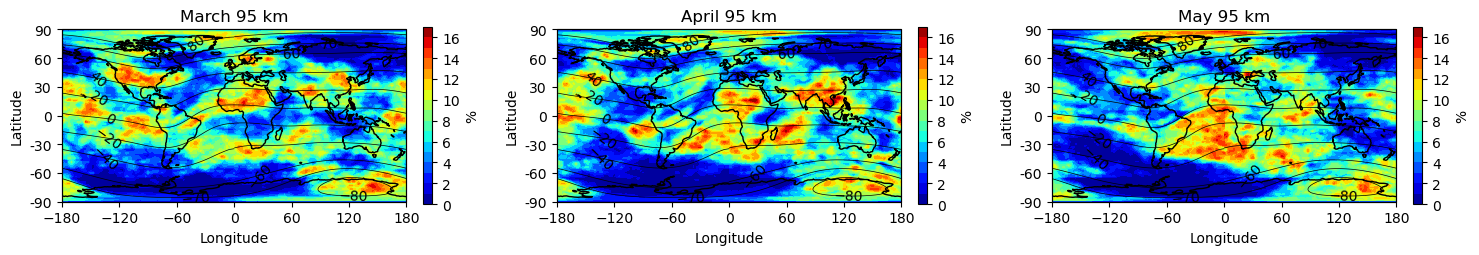

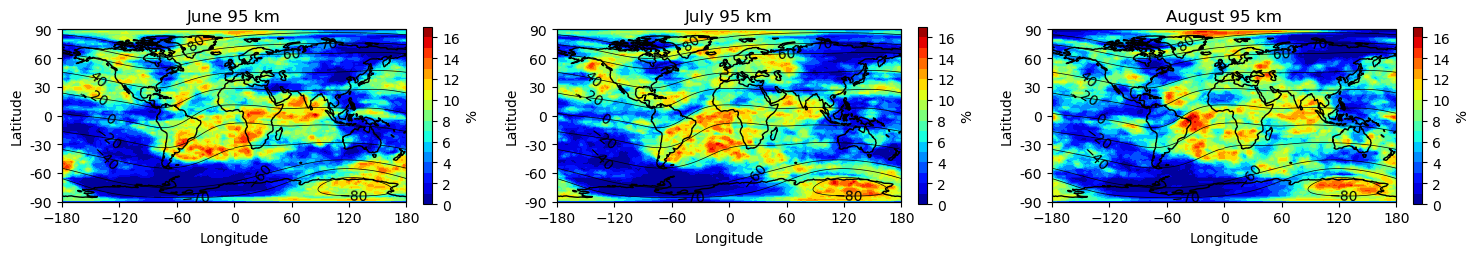

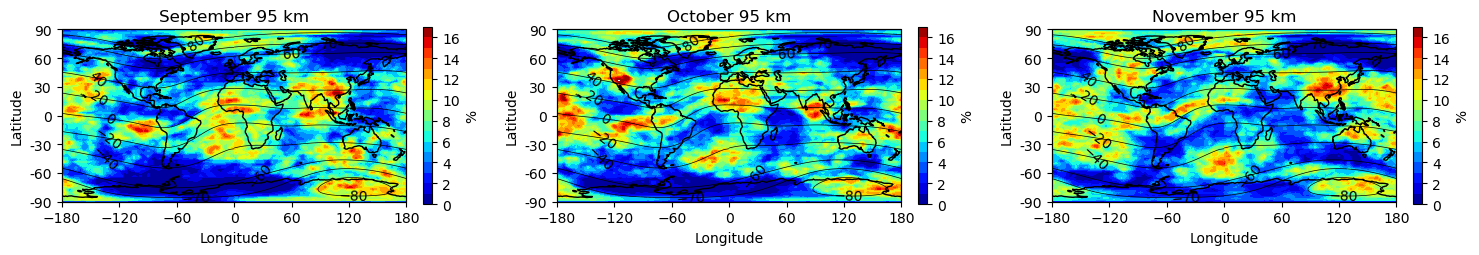

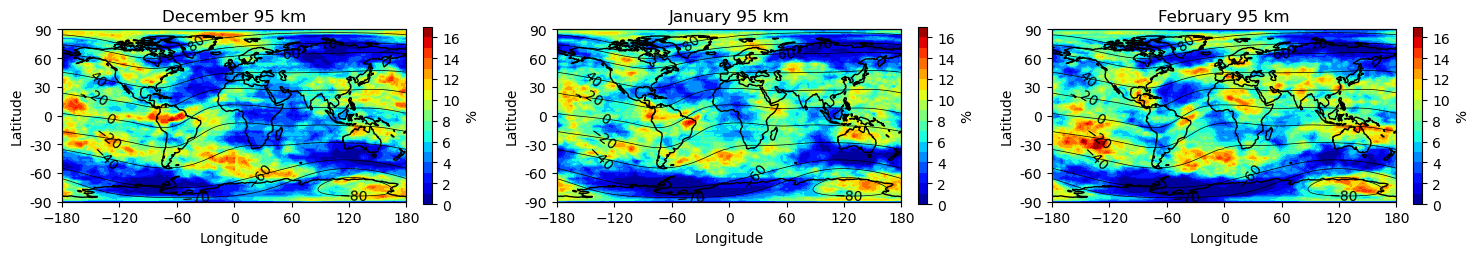

In [14]:
filename='Nc_Files/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport.cam.h0.0001-06.nc' 
ds = xr.open_dataset(filename)
ALATM = ds.variables['ALATM'] #Magnetic latitude at each geographic coordinate



lev_sl_idx_plot_multi = np.array([4,8,14],dtype=int)  #[ 4,  8, 14]  ~114km,~105km,95km
lev_sl_idx_plot_multi_shape = len(lev_sl_idx_plot_multi)  #3
lev_plot_ar = np.arange(0,lev_sl_idx_plot_multi_shape)   #[0,1,2]`


for iplev in lev_plot_ar:   #iterate over multiple levels for plots at a specific alt
    #---------------------------------------------------------------------------
    #print('Lat-LT plot setup:')
    lev_sl_idx_plot = lev_sl_idx_plot_multi[iplev]    #14 4.9e-04hPa~95km  #8 1.1e-04hPa~105km  #4 4.0e-05 hPa~114km

    lev_sl_plot = lev_sl[lev_sl_idx_plot]
    lev_sl_plot_str = str("%.1e" % lev_sl_plot) + ' hPa'
    #print('      Plot Lev = ' + lev_sl_plot_str )

    Zavg_sl_plot = Zavg_sl[lev_sl_idx_plot]
    Zavg_sl_plot_str = str("%.0f" % Zavg_sl_plot) + ' km'
    #print('      Approx Z = ' + Zavg_sl_plot_str )
    #===================================================================================================================================================

    
    
    #------------------------Dataset avg (lat, lon)--------------------------------------------
    #-----------------------Lat-Lon at specific height ------------------------------------------
    #------------------------------------------------------------------------------------------


    # Convert xarray Variable to NumPy array and set last value to 360
    lon_plot = lon.values
    lon_plot[-1] = 360.


    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5),
                             sharex=True, sharey=True,
                             subplot_kw={'projection': ccrs.PlateCarree(central_longitude=0)})

    # Set common colorbar properties
    vmin = 0
    vmax = 17
    nolevs = vmax - vmin + 1

    cmap = plt.get_cmap('jet')

    # Plot the data in each subplot
    subplots = [spr_SpEsns_Occ_Fr_dsavg[lev_sl_idx_plot, :, :],
                sum_SpEsns_Occ_Fr_dsavg[lev_sl_idx_plot, :, :],
                aut_SpEsns_Occ_Fr_dsavg[lev_sl_idx_plot, :, :],
                win_SpEsns_Occ_Fr_dsavg[lev_sl_idx_plot, :, :]]
    titles = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']

    for i, data in enumerate(subplots):
        ax = axes[i]

        C = ax.contourf(lon_plot, lat, data, cmap=jet, levels=np.linspace(vmin, vmax, nolevs), vmin=vmin, vmax=vmax)

        ax.set_ylabel('Latitude')
        ax.set_yticks(np.linspace(-90, 90, 7))
        ax.set_yticklabels((-90, -60, -30, 0, 30, 60, 90))

        cbar = fig.colorbar(C, ax=ax, pad=0.04, shrink=0.25)
        cbar.set_label(r'%')

        ax.coastlines()

        ax.set_title(f'{titles[i]} ' + str(Zavg_sl_plot_str))  # Set the title to the month name

        # Add contour lines to each subplot individually
        ax2 = fig.add_subplot(axes[i].get_subplotspec(), projection=ccrs.PlateCarree())

        ax2.set_global()
        contour_levels = [-80, -70, -60, -40, -20, 0, 20, 40, 60, 70, 80]
        contour = ax2.contour(lon, lat, ALATM[0, :, :],
                              transform=ccrs.PlateCarree(),
                              colors='black',
                              levels=contour_levels, vmin=-90, vmax=90,
                              linestyles='solid',
                              linewidths=0.5
                              )

        ax2.patch.set_facecolor('none')
        clabels = ax2.clabel(contour, inline=True, fontsize=10)

    plt.tight_layout(rect=[0.05, 0.03, 1, 0.95])

    # Save the figure
    figname = 'SpEsns_Occ_Fr_dsavg: Lat vs Lon ' + Zavg_sl_plot_str + '.png'
    plt.savefig('./Figures/' + run_name + '/Oc_fr/All/Lat-Lon/' + str(figname), dpi=400, bbox_inches='tight')
    # ---------------------------------------------------------------------------------------------------

    
    
    
    
    
    
    
    #SpEsns_Occ_Fr_avg[lev_sl_idx_plot,:,:,ids_plot]
    #------------------------Monthly avg (lat, lon)--------------------------------------------
    #-----------------------Lat-Lon at specific height ------------------------------------------
    #------------------------------------------------------------------------------------------



    # Convert xarray Variable to NumPy array and set last value to 360
    lon_plot = lon.values
    lon_plot[-1] = 360.

    # Define the datasets and their corresponding month arrays
    datasets = [
        {'name': 'Mar-May', 'data': spr_SpEsns_Occ_Fr_avg[lev_sl_idx_plot,:,:,:], 'months': ['March', 'April', 'May']},
        {'name': 'Jun-Aug', 'data': sum_SpEsns_Occ_Fr_avg[lev_sl_idx_plot,:,:,:], 'months': ['June', 'July', 'August']},
        {'name': 'Sep-Nov', 'data': aut_SpEsns_Occ_Fr_avg[lev_sl_idx_plot,:,:,:], 'months': ['September', 'October', 'November']},
        {'name': 'Dec-Feb', 'data': win_SpEsns_Occ_Fr_avg[lev_sl_idx_plot,:,:,:], 'months': ['December', 'January', 'February']}
    ]

    
    for dataset in datasets:
        dataset_name = dataset['name']
        dataset_data = dataset['data']
        months = dataset['months']

        # Create a figure for the current dataset
        fig, axes = plt.subplots(1, len(months), figsize=(15, 8), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=0)})

        for i, month in enumerate(months):
            # Get the month name
            month_name = month
            #print(month_name)

            # Index the dataset_data with the current month directly
            month_data = dataset_data[:, :, i]

            ax = axes[i]
            ax.set_title(f'{month_name} '+str(Zavg_sl_plot_str))


            # Add your plotting code using month_data
            vmin = 0
            vmax = 17
            nolevs = vmax - vmin +1
            C = ax.contourf(lon_plot, lat, month_data, 
                         #levels=ticks,
                         #locator=ticker.LogLocator(),
                         #extend='max',
                         cmap=jet,
                         levels=np.linspace(vmin, vmax, nolevs), vmin=vmin, vmax=vmax
                         )


            ax.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
            ax.set_xlabel('Longitude')

            ax.set_ylabel('Latitude')
            ax.set_yticks(np.linspace(-90, 90, 7))
            ax.set_yticklabels((-90, -60, -30, 0, 30, 60, 90))

            cbar = fig.colorbar(C, pad=0.04, shrink=0.23)#,ticks=ticks[::2])#,format=ticker.FuncFormatter(fmt))#fraction=0.023, 
            cbar.set_label(r'%')

            ax.coastlines() 


            ax2_x = 0.0  # Adjust as needed for the horizontal position
            ax2_y = 0.0  # Adjust as needed for the vertical position
            ax2_width = 1.0  # Adjust as needed for the width
            ax2_height = 1.0  # Adjust as needed for the height

            # Plot ALATM[0, :, :] on a second axis
            ax2 = ax.inset_axes([ax2_x, ax2_y, ax2_width, ax2_height], projection=ccrs.PlateCarree())

            ax2.set_global()
            contour_levels = [-80, -70, -60, -40, -20, 0, 20, 40, 60, 70, 80]
            contour = ax2.contour(lon, lat, ALATM[0, :, :],
                                  transform=ccrs.PlateCarree(),
                                  colors='black',
                                  levels=contour_levels, vmin=-90, vmax=90,
                                  linestyles='solid',
                                  linewidths=0.5
                                  )

            ax2.patch.set_facecolor('none')
            clabels = ax2.clabel(contour, inline=True, fontsize=10)


        #plt.suptitle(f'{dataset_name}', fontsize=16)
        plt.tight_layout()

        # Save the figure or display it as needed
        figname = f'SpEsns_Occ_Fr_avg: Lat vs Lon, {dataset_name} ' + Zavg_sl_plot_str  +'.png'
        #print(figname)
        plt.savefig('./Figures/' + run_name +'/Oc_fr/All/Lat-Lon/' + str(figname), dpi = 400, bbox_inches='tight')
        plt.show() 


Plot month 0: 06
Plot month 1: 07
Plot month 2: 08


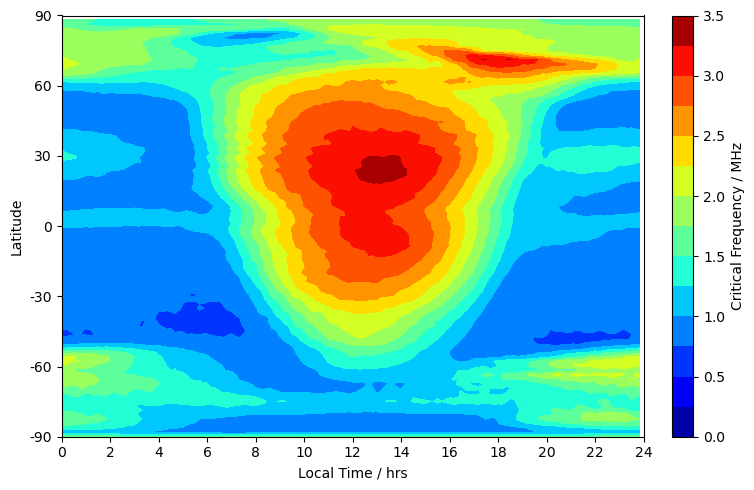

In [9]:
#Critical frequency plots:
    #SpEs_e          #The e density where SpEs have been identified using Fe+ density       
    #edens_sh        #e density in local time
    
    #maxSpEs__e      #max of SpEs_e in cm-3
    #foEs_m          #Critical freq (calculated using max e- density over lev dim in m-3)
    #foEs_m_av       #Avg of foEs_m over lev dimension
    #foEs_m_av_mth   #Average of foEs_m_av over month
    #foEs_m_av_ds    #AVerage of foEs_m_av_mth over dataset (e.g. 3mth)


# time_plot_idx = [12]#,6]#,12,18]
# timearrr = np.arange(0,len(time_plot_idx), dtype=int)


#-----------------------------------Lev-LT plot setup ----------------------------------------
# lat_plot_idx = 74   #21=-50.2   #37 #=-19.9    
# print('      Plot Lat = ' + str("%.1f" % lat[lat_plot_idx])  )
#-----------------------------------
lev_sl_idx_plot_min = 0
lev_sl_idx_plot_max = 24
# print('      Plot Lev = ' + str("%.1e" % lev_sl[lev_sl_idx_plot_max]) + ' hPa' + ' : ' + str("%.1e" % lev_sl[lev_sl_idx_plot_min]) + ' hPa')
# print('      Approx Z = ' + str("%.0f" % Zavg_sl[lev_sl_idx_plot_max]) + ' km' + ' : ' + str("%.0f" % Zavg_sl[lev_sl_idx_plot_min]) + ' km')

Zavg_sl_plott = Zavg_sl[lev_sl_idx_plot_min:lev_sl_idx_plot_max+1]
Zavg_sl_plott = Zavg_sl_plott.to_numpy()
#Zavg_sl_plottt = np.round_(Zavg_sl_plott, decimals=0)

#-------------------Set up Local Time Ticks-------------------------------
timeconv = lon / 15
timeconv_plot = timeconv.to_numpy() 
#timeconv_plot_ticks = np.arange(0,25, dtype=float)

#------------Set string values for sigma symbol to use in plot------------
#sigma = '\u03C3'
#----------------------------------------


#------------------------ foEs_m_av_ds -----------------------------
#------------------------ Lat-LT -----------------------------

#ticks = np.linspace(0, 5, 21)
vmin = 0
vmax = 3.5
nolevs = 15

fig, ax = plt.subplots(figsize=(8, 5))

C = ax.contourf(timeconv_plot, lat, foEs_m_av_ds,
                 #levels=ticks,
                 levels=np.linspace(vmin, vmax, nolevs), vmin=vmin, vmax=vmax,
                 #locator=ticker.LogLocator(),
                 #extend='min',
                 cmap=jet)

ax.set_ylabel('Latitude')
ax.set_yticks(np.linspace(-90,90, 7)) 
ax.set_yticklabels((-90,-60,-30,0,30,60,90)) 

ax.set_xlabel('Local Time / hrs')
xticks = np.linspace(0,24,13) 
ax.set_xticks(xticks) 
ax.set_xticklabels(xticks.astype(int))


#ax.set_title('foEs_m_av_ds, Lat vs LT ' + ',\n UT ' + times_str_min[0][0] + ' : ' + times_str_max[-1][-1] ) #+ str(times[itr]) )

#ax.grid(axis='x',color = 'grey', linestyle = '-', linewidth = 0.5)
#plt.grid(axis='y',color = 'grey', linestyle = '-', linewidth = 0.5)

cbar = fig.colorbar(C, pad=0.04)#,ticks=ticks[::4])#,format=ticker.FuncFormatter(fmt))#fraction=0.023, 
#-------------------

cbar.set_label(r'Critical Frequency / MHz')

figname= 'foEs_m_av_ds: Lat vs LT ' + times_str_min[0][0] + ' : ' + times_str_max[-1][-1]  + '.png'
plt.tight_layout()
path = './Figures/' + run_name +'/Oc_fr/' + Monthfolderstr + '/Lat-LT/foEs/'
plt.savefig(path+str(figname), dpi = 400) #
#-------------------------------------------------------------------




for ids in ds_months_ar:   #iterate over month
    
    start_cftime_date = '0001-' + str(ds_months[ids]) + '-01'
    times = xr.cftime_range(start=start_cftime_date, periods=672, freq="1H", calendar="noleap")    
    
   
    
    #--------------Set value for ids for plot variables-----------------------
    ids_plot = ids
    str_ids_plot = str(ids_plot)
    print('Plot month ' + str_ids_plot + ': ' + str(ds_months[ids_plot]) )
    

    
#     #------------------------ foEs_m_av_mth_plot -----------------------------
#     #------------------------ Lat-LT -----------------------------
#     foEs_m_av_mth_plot = foEs_m_av_mth[:, : , ids_plot]

#     #ticks = np.linspace(0, 5, 21)
#     vmin = 0
#     vmax = 3.5
#     #nolevs = 15
    
#     fig, ax = plt.subplots(figsize=(8, 5))

#     C = ax.contourf(timeconv_plot, lat, foEs_m_av_mth_plot,
#                      #levels=ticks,
#                      levels=np.linspace(vmin, vmax, nolevs), vmin=vmin, vmax=vmax,
#                      #locator=ticker.LogLocator(),
#                      #extend='min',
#                      cmap=jet)

#     ax.set_ylabel('Latitude')
#     ax.set_yticks(np.linspace(-90,90, 7)) 
#     ax.set_yticklabels((-90,-60,-30,0,30,60,90)) 

#     ax.set_xlabel('Local Time / hrs')    
#     xticks = np.linspace(0,24,13) 
#     ax.set_xticks(xticks) 
#     ax.set_xticklabels(xticks.astype(int))

#     #ax.set_title('foEs_m_av_mth_plot, Lat vs LT ' + ',\n UT ' + times_str_min[ids_plot][0] + ' : ' + times_str_max[ids_plot][-1] ) #+ str(times[itr]) )

#     #ax.grid(axis='x',color = 'grey', linestyle = '-', linewidth = 0.5)
#     #plt.grid(axis='y',color = 'grey', linestyle = '-', linewidth = 0.5)

#     cbar = fig.colorbar(C, pad=0.12)#,ticks=ticks[::4])#,format=ticker.FuncFormatter(fmt))#fraction=0.023, 
#     #-------------------

#     cbar.set_label(r'Critical Frequency / MHz')

#     figname= 'foEs_m_av_mth_plot: Lat vs LT ' + times_str_min[ids_plot][0] + ' : ' + times_str_max[ids_plot][-1]  + '.png'
#     plt.tight_layout()
#     path = './Figures/' + run_name +'/Oc_fr/' + Monthfolderstr + '/Lat-LT/foEs/'
#     plt.savefig(path+str(figname), dpi = 400) #
#     #-------------------------------------------------------------------
        
   










#--------------------------------------------------------






    
#     for it2 in time_ar_2wk:  #iterate over each 2wk sample period
        
#         #--------------Set value for it2 for plot variables-----------------------
#         it2_plot = it2
#         str_it2_plot = str(it2_plot)
     


#         #------------------------ foEs_m_av_plot -----------------------------
#         #------------------------ Lat-LT -----------------------------
#         foEs_m_av_plot = foEs_m_av[:, :, it2_plot , ids_plot]

#         ticks = np.linspace(0, 5, 21)

#         fig, ax = plt.subplots(figsize=(8, 5))

#         C = ax.contourf(timeconv_plot, lat, foEs_m_av_plot,
#                          levels=ticks,
#                          #locator=ticker.LogLocator(),
#                          #extend='min',
#                          cmap=jet)

#         ax.set_ylabel('Latitude')
#         ax.set_yticks(np.linspace(-90,90, 7)) 
#         ax.set_yticklabels((-90,-60,-30,0,30,60,90)) 

#         ax.set_xlabel('Local Time / hrs')
#         ax.set_xticks(np.linspace(0,24,13)) 
#         ax.set_xticklabels(timeconv_plot_ticks[::2]) 

#         ax.set_title('foEs_m_av_plot, Lat vs LT ' + ',\n UT ' + times_str_min[ids_plot][it2_plot] + ' : ' + times_str_max[ids_plot][it2_plot] ) #+ str(times[itr]) )

#         #ax.grid(axis='x',color = 'grey', linestyle = '-', linewidth = 0.5)
#         #plt.grid(axis='y',color = 'grey', linestyle = '-', linewidth = 0.5)

#         cbar = fig.colorbar(C, pad=0.12)#,ticks=ticks[::4])#,format=ticker.FuncFormatter(fmt))#fraction=0.023, 
#         #-------------------

#         cbar.set_label(r'Critical Frequency / MHz')

#         figname= 'foEs_m_av_plot: Lat vs LT ' + times_str_min[ids_plot][it2_plot] + ' : ' + times_str_max[ids_plot][it2_plot]  + '.png'
#         plt.tight_layout()
#         path = './Figures/' + run_name +'/Oc_fr/' + Monthfolderstr + '/Lat-LT/foEs/'
#         #plt.savefig(path+str(figname), dpi = 400) #
#         #-------------------------------------------------------------------
        
        
        
        
#         for itr in timearrr:  #iterate over chosen timesteps for plotting
#             if it2_plot == 0:
#                 plottime = times[ time_plot_idx[itr] ]
#             else:
#                 plottime = times [ time_plot_idx[itr] + 336]
#                 print(plottime)
                

#             #------------------------ maxSpEs_e_plot -----------------------------
#             #------------------------ Lat-LT -----------------------------
#             maxSpEs__e_plot = maxSpEs__e[itr , :, :, it2_plot , ids_plot]
            
#             ticks = np.geomspace(1*10**3, 2*10**5, 30)
#             #ticks = np.geomspace(1*10**9, 1*10**12, 30)
            
#             fig, ax = plt.subplots(figsize=(8, 5))

#             C = ax.contourf(timeconv_plot, lat, maxSpEs__e_plot,
#                              levels=ticks,
#                              locator=ticker.LogLocator(),
#                              #extend='min',
#                              cmap=jet)

#             ax.set_ylabel('Latitude')
#             ax.set_yticks(np.linspace(-90,90, 7)) 
#             ax.set_yticklabels((-90,-60,-30,0,30,60,90)) 
        
#             ax.set_xlabel('Local Time / hrs')
#             ax.set_xticks(np.linspace(0,24,13)) 
#             ax.set_xticklabels(timeconv_plot_ticks[::2]) 

#             ax.set_title('maxSpEs__e_plot, Lat vs LT ' + ',\n UT ' + str(plottime) ) #+ str(times[itr]) )

#             #ax.grid(axis='x',color = 'grey', linestyle = '-', linewidth = 0.5)
#             #plt.grid(axis='y',color = 'grey', linestyle = '-', linewidth = 0.5)
            
#             #------------------
#             def fmt(x, pos):
#                 a, b = '{:.1e}'.format(x).split('e')
#                 b = int(b)
#                 return r'${} \times 10^{{{}}}$'.format(a, b)
        
#             cbar = fig.colorbar(C, pad=0.12,ticks=ticks[::4],format=ticker.FuncFormatter(fmt))#fraction=0.023, 
#             #-------------------

#             cbar.set_label(r'cm$^{-3}$')

#             figname= 'maxSpEs__e_plot: Lat vs LT ' + str(plottime)  + '.png'
#             plt.tight_layout()
#             path = './Figures/' + run_name +'/Oc_fr/' + Monthfolderstr + '/Lat-LT/foEs/'
#             #plt.savefig(path+str(figname), dpi = 400) #
#             #-------------------------------------------------------------------
            
            

#             #------------------------ foEs_m_plot -----------------------------
#             #------------------------ Lat-LT -----------------------------
#             foEs_m_plot = foEs_m[itr , :, :, it2_plot , ids_plot]
            
#             ticks = np.linspace(0, 5, 21)

#             fig, ax = plt.subplots(figsize=(8, 5))

#             C = ax.contourf(timeconv_plot, lat, foEs_m_plot,
#                              levels=ticks,
#                              #locator=ticker.LogLocator(),
#                              #extend='min',
#                              cmap=jet)

#             ax.set_ylabel('Latitude')
#             ax.set_yticks(np.linspace(-90,90, 7)) 
#             ax.set_yticklabels((-90,-60,-30,0,30,60,90)) 
        
#             ax.set_xlabel('Local Time / hrs')
#             ax.set_xticks(np.linspace(0,24,13)) 
#             ax.set_xticklabels(timeconv_plot_ticks[::2]) 

#             ax.set_title('foEs_m_plot, Lat vs LT ' + ',\n UT ' + str(plottime) ) #+ str(times[itr]) )

#             #ax.grid(axis='x',color = 'grey', linestyle = '-', linewidth = 0.5)
#             #plt.grid(axis='y',color = 'grey', linestyle = '-', linewidth = 0.5)

#             cbar = fig.colorbar(C, pad=0.12)#,ticks=ticks[::4])#,format=ticker.FuncFormatter(fmt))#fraction=0.023, 
#             #-------------------

#             cbar.set_label(r'Critical Frequency / MHz')

#             figname= 'foEs_m_plot: Lat vs LT ' + str(plottime)  + '.png'
#             plt.tight_layout()
#             path = './Figures/' + run_name +'/Oc_fr/' + Monthfolderstr + '/Lat-LT/foEs/'
#             #plt.savefig(path+str(figname), dpi = 400) #
#             #-------------------------------------------------------------------
        
        
        
        

#             #------------------------ SpEs_e_plot -----------------------------
#             SpEs_e_plot = SpEs_e[:, itr , lat_plot_idx, :, it2_plot , ids_plot]
            
#             ticks = np.geomspace(1*10**2, 2*10**5, 30)
#             #ticks = np.linspace(1*10**2, 2*10**4, 30)

#             fig, ax = plt.subplots(figsize=(8, 5))

#             #C = ax.pcolormesh(timeconv_plot, lev_sl, SpEs_plot)
#             C = ax.contourf(timeconv_plot, Zavg_sl, SpEs_e_plot,   #lev_sl
#                              levels=ticks,
#                              locator=ticker.LogLocator(),
#                              #extend='min',
#                              cmap=jet)

#             #ax.set_yscale('log')
#             #ax.set_ylabel('Pressure / HPa')
#             #ax.set_ylim(lev_sl_plot_max, lev_sl_plot_min) 

#             #ax2 = ax.twinx()
#             #ax2.set_ylabel('Approx Geopotential Height / Km')
#             #ax2.set_ylim(Zavg_sl_plot_max,Zavg_sl_plot_min)
#             #ax2.set_yticklabels(Zavg_sl_plottt[lev_sl_idx_plot_max:lev_sl_idx_plot_min:-5])

#             ax.set_ylabel('Approx Geopotential Height / Km')
#             ax.set_ylim(Zavg_sl_plot_max,Zavg_sl_plot_min)
            
#             ax.set_xlabel('Local Time / hrs')
#             ax.set_xticks(np.linspace(0,24,13)) 
#             ax.set_xticklabels(timeconv_plot_ticks[::2]) 

#             ax.set_title('SpEs_e_plot, Lev vs LT, lat' + lat_plot_str + ',\n UT ' + str(plottime) ) #+ str(times[itr]) )

#             #ax.grid(axis='x',color = 'grey', linestyle = '-', linewidth = 0.5)
#             #plt.grid(axis='y',color = 'grey', linestyle = '-', linewidth = 0.5)
    
#             cbar = fig.colorbar(C, pad=0.12,ticks=ticks[::4],format=ticker.FuncFormatter(fmt))#fraction=0.023, 
#             #-------------------

#             #cbar.set_label(r'Number of Occurences')

#             figname= 'SpEs_e_plot: Lev vs LT, lat' + lat_plot_str + ' ' + str(plottime)  + '.png'
#             plt.tight_layout()
#             path = './Figures/' + run_name +'/Oc_fr/' + Monthfolderstr + '/Lev-LT/foEs/'
#             #plt.savefig(path+str(figname), dpi = 400) #
#             #-------------------------------------------------------------------
            
            
            
            
            
#             #------------------------ edens_sh[ilev,it,:,:,it2,ids] -----------------------------
#             edens_sh_plot = edens_sh[:, itr , lat_plot_idx, :, it2_plot , ids_plot]
            
            
#             ticks = np.geomspace(1*10**2, 2*10**5, 30)
#             #ticks = np.linspace(1*10**2, 2*10**4, 30)

#             fig, ax = plt.subplots(figsize=(8, 5))

#             C = ax.contourf(timeconv_plot, Zavg_sl, edens_sh_plot,   #lev_sl
#                              levels=ticks,
#                              locator=ticker.LogLocator(),
#                              extend='min',
#                              cmap=jet)

#             #ax.set_yscale('log')
#             #ax.set_ylabel('Pressure / HPa')
#             #ax.set_ylim(lev_sl_plot_max, lev_sl_plot_min) 

#             #ax2 = ax.twinx()
#             #ax2.set_ylabel('Approx Geopotential Height / Km')
#             #ax2.set_ylim(Zavg_sl_plot_max,Zavg_sl_plot_min)
#             #ax2.set_yticklabels(Zavg_sl_plottt[lev_sl_idx_plot_max:lev_sl_idx_plot_min:-5])

#             ax.set_ylabel('Approx Geopotential Height / Km')
#             ax.set_ylim(Zavg_sl_plot_max,Zavg_sl_plot_min)
            
#             ax.set_xlabel('Local Time / hrs')
#             ax.set_xticks(np.linspace(0,24,13)) 
#             ax.set_xticklabels(timeconv_plot_ticks[::2]) 

#             ax.set_title('edens_sh_plot, Lev vs LT, lat' + lat_plot_str + ',\n UT ' + str(plottime) ) #+ str(times[itr]) )

#             #ax.grid(axis='x',color = 'grey', linestyle = '-', linewidth = 0.5)
#             #plt.grid(axis='y',color = 'grey', linestyle = '-', linewidth = 0.5)

#             cbar = fig.colorbar(C, pad=0.12,ticks=ticks[::4],format=ticker.FuncFormatter(fmt))#fraction=0.023, 
#             #-------------------

#             #cbar.set_label(r'Number of Occurences')

#             figname= 'edens_sh_plot: Lev vs LT, lat' + lat_plot_str + ' ' + str(plottime)  + '.png'
#             plt.tight_layout()
#             path = './Figures/' + run_name +'/Oc_fr/' + Monthfolderstr + '/Lev-LT/foEs/'
#             #plt.savefig(path+str(figname), dpi = 400) #
#             #-------------------------------------------------------------------




In [ ]:
#===================================================================================================
# Main calculations - for Winds
#===================================================================================================


import xarray as xr
import numpy as np
import cftime
import nc_time_axis
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import ticker, cm
from cftime import datetime 
import matplotlib.colors as colors
import math
import random
import matplotlib.cm as mcm
jet = mcm.get_cmap('jet')
import cartopy.crs as ccrs # CRS stands for "Coordinate reference systems" for map projection
from cartopy.crs import PlateCarree
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from dateutil import tz
import pytz
import time
from time import process_time
%matplotlib inline 
#import line_profiler
#%load_ext line_profiler

#===================================================================================================
start_time = time.process_time() 
#===================================================================================================


#/////////////////////////////////////////////////////////////////////////////////////////////////////////
#////////////////////////////  Things to check/change before running  ////////////////////////////////////
#/////////////////////////////////////////////////////////////////////////////////////////////////////////

#winds_on = 1
#--------------------------------------------------------------------------------------------------

#ds_months = ['12','01','02']
#Monthstr = [ 'Dec', 'Jan', 'Feb' ]

#ds_months = ['06','07','08']
#Monthstr = [ 'Jun', 'Jul', 'Aug' ]

#ds_months = ['06','07']
#Monthstr = ['Jun','Jul']

ds_months = ['06']
Monthstr = ['Jun']
#--------------------------------------------------------------------------------------------------
time_ar_2wk = np.arange(0,2)

#times_str_min = np.array( (time_ar_2wk,time_ar_2wk,time_ar_2wk) , dtype=str  ) 
#times_str_max = np.array( (time_ar_2wk,time_ar_2wk,time_ar_2wk) , dtype=str  ) 
#times_str_min = np.array( (time_ar_2wk,time_ar_2wk) , dtype=str  ) 
#times_str_max = np.array( (time_ar_2wk,time_ar_2wk) , dtype=str  ) 
times_str_min = np.array( (time_ar_2wk) , dtype=str  ) 
times_str_max = np.array( (time_ar_2wk) , dtype=str  ) 

#--------------------------------------------------------------------------------------------------

run_name = 'Jianfei_run'
Metal='Fe'

#run_name = 'Wuhu_IonTr_run'    
#run_name = 'Wuhu_IonTr_run_6m'  


'''////////////////  Additional Checks before running  ////////////////

- Check file paths below are correct for datasets
- Check Monthfolderstr is correct (i.e. set manually if doing one month only)
- Check lev_sl_idx_min/max are set to chosen heights (currently ~80-130km). 
        If changing this, N.B some of the [plotting code](?) is set to 25 levs rather than responding if the no of sliced levs changes


- Check Time parameters are correct (time_it_shape, time_ind_2wk_min, time_ind_2wk_max, time_shape) 
        Currently set to iterate over 2x 2wk time slices per month. Each time slice is 336 long. N.B. offset array is set up for 2x2wk periods per mth
'''

#/////////////////////////////////////////////////////////////////////////////////////////////////////////
#/////////////////////////////////////////////////////////////////////////////////////////////////////////
#/////////////////////////////////////////////////////////////////////////////////////////////////////////

Monthfolderstr = Monthstr[0] + '-' + Monthstr[-1]
#Monthfolderstr = 'Jun-Aug'

ds_months_shape = len(ds_months)  #3
ds_months_ar = np.arange(0,ds_months_shape)   #[0,1,2]
#===================================================================================================

#Set time parameters - No of time samples to iterate over (2x 2 week periods)
time_it_shape = 2   
time_ind_2wk_min = [  0, 336]
time_ind_2wk_max = [335, 671]

#Set time parameters - No of timesteps in one time sample (2 week period)
time_shape = 336
timear = np.arange(0,time_shape) # 2 week period (hourly data) 
#--------------------------------------------------------------------------------------------------

lon_shape = 144
lonar = np.arange(0,lon_shape)        
#it_arr = np.arange(0,48) # array 0->47   #0.5h LT bins
#it_ar = np.arange(1,48) # array 1->47 # Used to bin LT (144x 10 min bins) into 0.5h LT bins. N.B. Starting from index1 as index0 is calculated differently

lat_shape = 96
latar= np.arange(0,lat_shape)

newlat = np.arange(-89.5,90.5,1)
newlat_shape = 180
#weights_newlat = np.cos(np.deg2rad(newlat))

intlat = np.arange(-87.5,92.5,5)
intlat_shape = 36
intlat_ar = np.arange(0,intlat_shape)  # array 0->35

lev_sl_idx_min = 42
lev_sl_idx_max = 66
lev_shape = (lev_sl_idx_max-lev_sl_idx_min)+1

levar = np.arange(0,lev_shape)
levarch = levar[1:-1]
ilevar = np.arange(0,lev_shape+1)
levarsl = np.arange(0,lev_shape-1)
levarr = np.arange(1,lev_shape+1) #1-->25


#--------------------------------------------------------------------------------------------------

# Create an array with offset needed for each UT time step (24h period)
# Offset by 15 degrees lon each time, lon axis is in 2.5 degree intervals
offset =  np.arange(0,24) * 15 / 2.5 
offset = offset.astype(int)

# Stack multiple offset arrays to create offsets for consecutive days in the 2 week dataset 
#offset = np.stack((offset, offset, offset, offset, offset, offset, offset, offset, offset, offset, offset, offset, offset, offset), axis=0)   #2wks
#offset = np.reshape(offset, (168*2))
offset = np.tile(offset, 2 * 168)
#--------------------------------------------------------------------------------------------------


#--------------------------------------------------------------------------------------------------

#=================================  Defining Variables  ===========================================

U_wind_sh = np.ndarray( (lev_shape,time_shape, lat_shape, lon_shape, time_it_shape, ds_months_shape), dtype = float) 

U_wind_sl2_sh = np.ndarray((lev_shape+2,time_shape, lat_shape, lon_shape, time_it_shape, ds_months_shape), dtype = float) 

dz = np.ndarray((lev_shape,time_shape, lat_shape, lon_shape, time_it_shape, ds_months_shape), dtype = float)
dz_sh = np.ndarray((lev_shape,time_shape, lat_shape, lon_shape, time_it_shape, ds_months_shape), dtype = float) 

alt_up = np.ndarray((lev_shape,time_shape, lat_shape, lon_shape, time_it_shape, ds_months_shape), dtype = float) 
alt_low = np.ndarray((lev_shape,time_shape, lat_shape, lon_shape, time_it_shape, ds_months_shape), dtype = float) 

U_up = np.ndarray((lev_shape,time_shape, lat_shape, lon_shape, time_it_shape, ds_months_shape), dtype = float)
U_low = np.ndarray((lev_shape,time_shape, lat_shape, lon_shape, time_it_shape, ds_months_shape), dtype = float)
dU = np.ndarray((lev_shape,time_shape, lat_shape, lon_shape, time_it_shape, ds_months_shape), dtype = float)  
dUdz = np.ndarray((lev_shape,time_shape, lat_shape, lon_shape, time_it_shape, ds_months_shape), dtype = float)

U_wind_sh_2wk = np.ndarray((lev_shape, lat_shape, lon_shape, time_it_shape, ds_months_shape), dtype = float)
U_wind_sh_mth = np.ndarray((lev_shape, lat_shape, lon_shape, ds_months_shape), dtype = float)
U_wind_sh_ds = np.ndarray((lev_shape, lat_shape, lon_shape), dtype = float)

dUdz_2wk = np.ndarray((lev_shape, lat_shape, lon_shape, time_it_shape, ds_months_shape), dtype = float)
dUdz_mth = np.ndarray((lev_shape, lat_shape, lon_shape, ds_months_shape), dtype = float)
dUdz_ds = np.ndarray((lev_shape, lat_shape, lon_shape), dtype = float)

#V_wind_sh = np.ndarray( (lev_shape, time_shape, lat_shape, lon_shape, time_it_shape, ds_months_shape), dtype = float)
#V_wind_sh_2wk = np.ndarray((lev_shape, lat_shape, lon_shape, time_it_shape, ds_months_shape), dtype = float)
#V_wind_sh_mth = np.ndarray((lev_shape, lat_shape, lon_shape, ds_months_shape), dtype = float)
#V_wind_sh_ds = np.ndarray((lev_shape, lat_shape, lon_shape), dtype = float)

##V_up = np.ndarray((lev_shape,time_shape, lat_shape, lon_shape, time_it_shape, ds_months_shape), dtype = float)
##V_low = np.ndarray((lev_shape,time_shape, lat_shape, lon_shape, time_it_shape, ds_months_shape), dtype = float)
##dV = np.ndarray((lev_shape,time_shape, lat_shape, lon_shape, time_it_shape, ds_months_shape), dtype = float)  
##dVdz = np.ndarray((lev_shape,time_shape, lat_shape, lon_shape, time_it_shape, ds_months_shape), dtype = float)
##V_wind_sl2_sh = np.ndarray((lev_shape+2,time_shape, lat_shape, lon_shape, time_it_shape, ds_months_shape), dtype = float) 

#dU2V2 = np.ndarray((lev_shape,time_shape, lat_shape, lon_shape, time_it_shape, ds_months_shape), dtype = float)
##dU2V2dz = np.ndarray((lev_shape,time_shape, lat_shape, lon_shape, time_it_shape, ds_months_shape), dtype = float)

dUdz_2 = np.ndarray((lev_shape, time_shape, lat_shape, lon_shape, time_it_shape, ds_months_shape), dtype = float)
dUdz_2_NaN = np.empty((lev_shape, time_shape, lat_shape, lon_shape, time_it_shape, ds_months_shape), dtype = float)
dUdz_2_NaN[:] = np.NaN
#===================================================================================================


for ids in ds_months_ar:
        #===================================================================================================
    if run_name=='Jianfei_run':
        file1name ='Nc_Files/Jianfei_WACCMX_files/waccmx_' + str(Metal) + '_' + str(Metal) + 'p_' + ds_months[ids] + '.nc'
        ds = xr.open_dataset(file1name)
    elif run_name=='Wuhu_IonTr_run':
        file1name='Nc_Files/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport.cam.h2.0001-'  + ds_months[ids] +  '-*.nc'
        ds = xr.open_mfdataset(file1name)
    elif run_name=='Wuhu_IonTr_run_6m':
        file1name='Nc_Files/CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_Si_Ca_K_iontransport/CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_Si_Ca_K_iontransport.cam.h2.0001-'  + ds_months[ids] +  '-*.nc' 
        ds = xr.open_mfdataset(file1name)
    #===================================================================================================
 
    print('Dataset: Month ' + str(ds_months[ids]) )

    timee = ds.variables['time']
    start_cftime_date = '0001-' + str(ds_months[ids]) + '-01'
    times = xr.cftime_range(start=start_cftime_date, periods=672, freq="1H", calendar="noleap")    

    lon = ds.variables['lon']
    lat = ds.variables['lat']
    lev = ds.variables['lev']
    dst = ds.transpose("lev", ...)
    #===================================================================================================
    
    if run_name=='Jianfei_run':
        file2name='Nc_Files/Jianfei_WACCMX_files/waccmx_Z3_T_e_' + ds_months[ids] + '.nc' 
        ds2 = xr.open_dataset(file2name) 
        ds2t = ds2.transpose("lev", ...)
        temp = ds2t.variables['T']
        geopH = ds2t.variables['Z3'] / 1000 #m-> km
    elif run_name=='Wuhu_IonTr_run' or run_name=='Wuhu_IonTr_run_6m':
        temp = dst.variables['T']
        elect = dst.variables['e']
        geopH = dst.variables['Z3'] / 1000 #m-> km 
    #===================================================================================================
        
    file3name ='Nc_Files/Jianfei_WACCMX_files/waccmx_winds_' + ds_months[ids] + '.nc'
    ds3 = xr.open_dataset(file3name)
    ds3t = ds3.transpose("lev", ...)
    ilev = ds3t.variables['ilev'] #(127)
    U = ds3t.variables['U'] #(126, 672, 96, 144) #U component is positive for a west to east flow (eastward wind) 
    #V = ds3t.variables['V'] #(126, 672, 96, 144) #V component is positive for south to north flow (northward wind)
    #===================================================================================================
    
    Zavg = geopH.mean(('time','lat', 'lon'))

    #===================================================================================================
    
    # Slice arrays (lev & alt) between chosen range & print
    lev_sl = lev[lev_sl_idx_min:lev_sl_idx_max+1]
    Zavg_sl = Zavg[lev_sl_idx_min:lev_sl_idx_max+1]
    
    print('    Array lev = ' + str("%.1e" % lev[lev_sl_idx_max] ) + 'hPa : ' + str("%.1e" % lev[lev_sl_idx_min] ) + 'hPa'
               + ' (approx ' + str("%.0f" % Zavg[lev_sl_idx_max]) + 'km : ' + str("%.0f" % Zavg[lev_sl_idx_min] ) + 'km' + ')'   )
    
    geopH_sl = geopH[lev_sl_idx_min:lev_sl_idx_max+1,:,:,:]

    #===================================================================================================
    #Latitude weighting - not using atm, don't think it's necessary(?)
    #weights = np.cos(np.deg2rad(lat))
    #weights.name = "weights" #doesn't work..
    #print(weights)
    #===================================================================================================

    for it2 in time_ar_2wk:
        #===================================================================================================
        
        #Select time indices for current loop iteration
        times_idx_min = time_ind_2wk_min[it2]
        times_idx_max = time_ind_2wk_max[it2]
        
        # Generate time strings for figure labelling
        if ds_months_shape>1:
            times_str_min[ids][it2] = str( times[times_idx_min] ) 
            times_str_max[ids][it2] = str( times[times_idx_max] ) 
            print( '      Time slice ' + str(it2+1) + ' = ' +times_str_min[ids][it2] + ' : ' + times_str_max[ids][it2] ) 
        else:
            times_str_min[it2] = str( times[times_idx_min] ) #~~#
            times_str_max[it2] = str( times[times_idx_max] ) #~~#
            print( '      Time slice ' + str(it2+1) + ' = ' +times_str_min[it2] + ' : ' + times_str_max[it2] ) 

        #===================================================================================================
        
        # Slice array between chosen time range, leave alt dim unsliced
        geopH_sl_time = geopH[:,times_idx_min:times_idx_max+1,:,:] 

        # Slice by chosen alt range and time range 
        geopH_sl = geopH[lev_sl_idx_min:lev_sl_idx_max+1,times_idx_min:times_idx_max+1,:,:]
        U_wind = U[lev_sl_idx_min:lev_sl_idx_max+1,times_idx_min:times_idx_max+1,:,:] #(25, 336, 96, 144)
        #V_wind = V[lev_sl_idx_min:lev_sl_idx_max+1,times_idx_min:times_idx_max+1,:,:] #(25, 336, 96, 144)
        
        #Slice by one extra either side in lev dim so can calculate dU at array edges
        U_wind_sl2 = U[lev_sl_idx_min-1:lev_sl_idx_max+2,times_idx_min:times_idx_max+1,:,:] #(126, 336, 96, 144)
        #V_wind_sl2 = V[lev_sl_idx_min-1:lev_sl_idx_max+2,times_idx_min:times_idx_max+1,:,:] #(126, 336, 96, 144) 

        #===================================================================================================

        #Iterate over timear (2wk period, hrly data), offsetting at each UT by 15 degrees lon        
        for it in timear:
            U_wind_sh[:,it,:,:,it2,ids] = np.roll(U_wind[:,it,:,:], offset[it] , axis=2)
            U_wind_sl2_sh[:,it,:,:,it2,ids] = np.roll(U_wind_sl2[:,it,:,:], offset[it] , axis=2)
            #V_wind_sh[:,it,:,:,it2,ids] = np.roll(V_wind[:,it,:,:], offset[it] , axis=2)
            #V_wind_sl2_sh[:,it,:,:,it2,ids] = np.roll(V_wind_sl2[:,it,:,:], offset[it] , axis=2)
 
        #===================================================================================================
        
        #Calc dz for first and last lev index (N.B. arrays are sliced but not shifted into LT)
        alt_up[0,:,:,:,it2,ids] = ( geopH_sl_time[lev_sl_idx_min-1,:,:,:] + geopH_sl[0,:,:,:] ) / 2.  
        alt_low[0,:,:,:,it2,ids] = ( geopH_sl[0,:,:,:] + geopH_sl[1,:,:,:] ) / 2.
        dz[0,:,:,:,it2,ids] = alt_up[0,:,:,:,it2,ids] - alt_low[0,:,:,:,it2,ids]

        alt_up[24,:,:,:,it2,ids] = ( geopH_sl[23,:,:,:] + geopH_sl[24,:,:,:] ) / 2.
        alt_low[24,:,:,:,it2,ids] = ( geopH_sl[24,:,:,:] + geopH_sl_time[lev_sl_idx_max+1,:,:,:] ) / 2.
        dz[24,:,:,:,it2,ids] = alt_up[24,:,:,:,it2,ids] - alt_low[24,:,:,:,it2,ids]

        #Iterate over remaining indices and calc dz
        for ilevch in levarch:
            alt_up[ilevch,:,:,:,it2,ids] = ( geopH_sl[ilevch-1,:,:,:] + geopH_sl[ilevch,:,:,:] ) / 2.
            alt_low[ilevch,:,:,:,it2,ids] = ( geopH_sl[ilevch,:,:,:] + geopH_sl[ilevch+1,:,:,:] ) / 2.
            dz[ilevch,:,:,:,it2,ids] = alt_up[ilevch,:,:,:,it2,ids] - alt_low[ilevch,:,:,:,it2,ids] 
            
        dz = dz * 1000. #km --> m

        #Convert dz into local time grid--------------------------------------------
        #Iterate over timear, offsetting at each time by 15 degrees lon
        for it in timear:
            dz_sh[:,it,:,:,it2,ids] = np.roll(dz[:,it,:,:,it2,ids], offset[it] , axis=2)
        #---------------------------------------------------------------------------

        #Calc dU.
        for ilev in levarr: #iterate inds 1->25
            U_up[ilev-1,:,:,:,it2,ids] = U_wind_sl2_sh[ilev-1,:,:,:,it2,ids] - U_wind_sl2_sh[ilev,:,:,:,it2,ids] #ms-1
            U_low[ilev-1,:,:,:,it2,ids] = U_wind_sl2_sh[ilev,:,:,:,it2,ids] - U_wind_sl2_sh[ilev+1,:,:,:,it2,ids] #ms-1
            dU[ilev-1,:,:,:,it2,ids] = U_up[ilev-1,:,:,:,it2,ids] - U_low[ilev-1,:,:,:,it2,ids] #ms-1
            #V_up[ilev-1,:,:,:,it2,ids] = V_wind_sl2_sh[ilev-1,:,:,:,it2,ids] - V_wind_sl2_sh[ilev,:,:,:,it2,ids] #ms-1
            #V_low[ilev-1,:,:,:,it2,ids] = V_wind_sl2_sh[ilev,:,:,:,it2,ids] - V_wind_sl2_sh[ilev+1,:,:,:,it2,ids] #ms-1
            #dV[ilev-1,:,:,:,it2,ids] = V_up[ilev-1,:,:,:,it2,ids] - V_low[ilev-1,:,:,:,it2,ids] #ms-1
        
        #Calc dUdz.
        dUdz[:,:,:,:,it2,ids] = dU[:,:,:,:,it2,ids] / dz_sh[:,:,:,:,it2,ids] #s-1
        #dVdz[:,:,:,:,it2,ids] = dV[:,:,:,:,it2,ids] / dz_sh[:,:,:,:,it2,ids] #s-1

        #Select only data where westward wind above and eastward wind below (theoretical criteria for SpE)
        dUdz_2[:,:,:,:,it2,ids] = np.where( (U_up[:,:,:,:,it2,ids]<0.)&(U_low[:,:,:,:,it2,ids]>0.), dUdz[:,:,:,:,it2,ids] , dUdz_2_NaN[:,:,:,:,it2,ids] )

        #Calc dU2V2. 
        #May be possible to remove loop to speed up code, but not tested
        #for ilev in levar:
        #    for it in timear:
        #        for ilat in latar:
        #            for ilon in lonar:
        #                dU2V2[ilev,it,ilat,ilon,it2,ids] = math.sqrt( ( dU[ilev,it,ilat,ilon,it2,ids]**2 ) + ( dV[ilev,it,ilat,ilon,it2,ids]**2 ) )
        #dU2V2dz[:,:,:,:,it2,ids] = dU2V2[:,:,:,:,it2,ids] / dz_sh[:,:,:,:,it2,ids]

        #Avg over it dim (avg all timesteps within 2wk slice) -> 2wk avg
        U_wind_sh_2wk[:,:,:,it2,ids] = np.mean( U_wind_sh[:,:,:,:,it2,ids] , axis=1 )   
        #V_wind_sh_2wk[:,:,:,it2,ids] = np.mean( V_wind_sh[:,:,:,:,it2,ids] , axis=1 )  
        dUdz_2wk[:,:,:,it2,ids] = np.mean( dUdz[:,:,:,:,it2,ids] , axis=1 )   

        #===================================================================================================
 
    #--- Out of it2 loop (2wk time periods), still in ds loop (month) ---
    #avg over it2 dim -> monthly avg
    U_wind_sh_mth[:,:,:,ids] = np.mean( U_wind_sh_2wk[:,:,:,:,ids], axis=3 )
    #V_wind_sh_mth[:,:,:,ids] = np.mean( V_wind_sh_2wk[:,:,:,:,ids], axis=3 )
    dUdz_mth[:,:,:,ids] = np.mean( dUdz_2wk[:,:,:,:,ids], axis=3 )    
    
#--- Out of it2 loop (2wk time periods) AND ds loop (month) ---
#avg over ids dim -> dataset avg
U_wind_sh_ds[:,:,:] = np.mean( U_wind_sh_mth[:,:,:,:], axis=3 )
#V_wind_sh_ds[:,:,:] = np.mean( V_wind_sh_mth[:,:,:,:], axis=3 )
dUdz_ds[:,:,:] = np.mean( dUdz_mth[:,:,:,:], axis=3 )
    
#===================================================================================================
end_time = time.process_time()
time_taken = end_time - start_time
time_taken_min = time_taken / 60.
print('========================================')
print('Calculation Time = ' + str(time_taken_min) + ' mins' )  


In [ ]:
#U_wind_sh_plot & SpE_sh at individual time step
#U_winds plotted above/at same alt as/below the SpE layer alt
#Trying to see whether there is any correlation between 'zero wind line' and SpE occurrence (i.e. where wind shear changes

#-----------------------------------Lev-LT plot setup ----------------------------------------
lat_plot_idx = 74   #21=-50.2   #37 #=-19.9    +50.2
print('      Plot Lat = ' + str("%.1f" % lat[lat_plot_idx]) )
#-----------------------------------
lev_sl_idx_plot_min = 0
lev_sl_idx_plot_max = 24
print('      Plot Lev = ' + str("%.1e" % lev_sl[lev_sl_idx_plot_max] ) + ' hPa' + ' : ' + str("%.1e" % lev_sl[lev_sl_idx_plot_min] ) + ' hPa')
print('      Approx Z = ' + str("%.0f" % Zavg_sl[lev_sl_idx_plot_max]) + ' km' + ' : ' + str("%.0f" % Zavg_sl[lev_sl_idx_plot_min]) + ' km')

Zavg_sl_plott = Zavg_sl[lev_sl_idx_plot_min:lev_sl_idx_plot_max+1]
Zavg_sl_plott = Zavg_sl_plott.to_numpy()
#Zavg_sl_plottt = np.round_(Zavg_sl_plott, decimals=0)

#-------------------Set up Local Time Ticks-------------------------------
timeconv = lon / 15
timeconv_plot = timeconv.to_numpy() 
timeconv_plot_ticks = np.arange(0,25, dtype=float)

#------------Set string values for sigma symbol to use in plot------------
sigma = '\u03C3'
#----------------------------------------

# Set chosen/multiple levs to plot for lat-LT at a specific alt
lev_sl_idx_plot_multi = np.array([4,8,14],dtype=int)  #[ 4,  8, 14] ~114km,~105km,95km
lev_sl_idx_plot_multi_shape = len(lev_sl_idx_plot_multi)  #3
lev_plot_ar = np.arange(0,lev_sl_idx_plot_multi_shape)   #[0,1,2]


#Set values for below loops
time_plot_idx = [18]
timearrr = np.arange(0,len(time_plot_idx), dtype=int)

it2_plot = 1
str_it2_plot = str(it2_plot)

ids_plot = 0
ds_months_ar = [0] #np.arange(0,len(ids_plot), dtype=int)

str_ids_plot = str(ids_plot)



for ids in ds_months_ar:   #iterate over month
    
    start_cftime_date = '0001-' + str(ds_months[ids]) + '-01'
    times = xr.cftime_range(start=start_cftime_date, periods=672, freq="1H", calendar="noleap")    
    
   
    
    #--------------Set value for ids for plot variables-----------------------
    ids_plot = ids
    print('Plot month ' + str(ids_plot) + ': ' + str(ds_months[ids_plot]) )
  

    for iplev in lev_plot_ar:   #iterate over multiple levels for lat-LT plots at a specific alt
        #-----------------------------------Lat-LT plot setup ----------------------------------------
        #print('Lat-LT plot setup:')
        lev_sl_idx_plot = lev_sl_idx_plot_multi[iplev]    #14 4.9e-04hPa~95km  #8 1.1e-04hPa~105km  #4 4.0e-05 hPa~114km

        print('      Plot Lev = ' + str("%.1e" % lev_sl[lev_sl_idx_plot]) + ' hPa' )
        print('      Approx Z = ' + str("%.0f" % Zavg_sl[lev_sl_idx_plot]) + ' km' )
        
        lev_sl_plot1_str = str("%.1e" % lev_sl[lev_sl_idx_plot+1]) + ' hPa'
        lev_sl_plot2_str = str("%.1e" % lev_sl[lev_sl_idx_plot-1]) + ' hPa'
        
        Zavg_sl_plot1_str = str("%.0f" % Zavg_sl[lev_sl_idx_plot+1]) + ' km'
        Zavg_sl_plot2_str = str("%.0f" % Zavg_sl[lev_sl_idx_plot-1]) + ' km'
        

        for itr in timearrr:  #
            if it2_plot == 0:
                plottime = times[ time_plot_idx[itr] ]
                #print('1= ' + str(plottime))
            else:
                plottime = times[ time_plot_idx[itr] + 336]
                #print('2= ' + str(plottime))

            plottimestr = str(plottime)
            #print('3= ' + plottimestr)
            
            print('Plot slice ' + str_it2_plot + ': ' + str(times[it2_plot]) )

            #----------------------------------U_wind_sh at specified height-----------------------------------------------------------
            #---------------------------------------------------------------------------------------------

            U_wind_sh_plot = U_wind_sh[lev_sl_idx_plot+1, itr , :, :,  it2_plot , ids_plot ]    #(25, 336, 96, 144, 2, 3)
            
            SpEs_plot = SpEs[lev_sl_idx_plot, itr , :, :,  it2_plot , ids_plot ]    #(25, 336, 96, 144, 2, 3) 
            

            #ticks = np.linspace(0, 12, 25)
            ticks = np.linspace(-120, 120, 7)
            #ticks = np.linspace(0, 40, 21) #(F)

            fig, ax = plt.subplots(figsize=(11, 7))

            C = ax.contour(timeconv_plot, lat, U_wind_sh_plot, 
                             levels=ticks,
                             #locator=ticker.LogLocator(),
                             #extend='min',
                             #cmap=jet)
                              colors='black')

                            
            #P = ax.quiver(timeconv_plot[::6], lat[::6], U_wind_sh_plot[::6,::6], 0 #V_wind_sh_ds_plot[::6,::6]
            #              , scale=100
            #              , scale_units='inches'
            #              , units='inches'
            #              , width=0.02
            #                ) 
            
            ticks2 = np.geomspace(1*10**2, 4*10**4, 30)
            P = ax.contourf(timeconv_plot, lat, SpEs_plot, 
                             levels=ticks2,
                             locator=ticker.LogLocator(),
                             #extend='min',
                             #colors='black'
                             cmap=jet
                             )
            

            ax.set_ylabel('Latitude')
            ax.set_yticks(np.linspace(-90,90, 7)) 
            ax.set_yticklabels((-90,-60,-30,0,30,60,90)) 

            ax.set_xlabel('Local Time / hrs')
            ax.set_xticks(np.linspace(0,24,13)) 
            ax.set_xticklabels(timeconv_plot_ticks[::2]) 

            ax.set_title('U_wind_sh_plot, Lat vs LT, ' + lev_sl_plot1_str + ' (approx '+ Zavg_sl_plot1_str + ')' 
                         + ' \n SpEs_plot, ' + lev_sl_plot_str + ' (approx '+ Zavg_sl_plot_str + ')' 
                         + ' \n UT ' + plottimestr )

            #ax.grid(axis='x',color = 'grey', linestyle = '-', linewidth = 0.5)
            #plt.grid(axis='y',color = 'grey', linestyle = '-', linewidth = 0.5)

            #------------------
            def fmt(x, pos):
                a, b = '{:.1e}'.format(x).split('e')
                b = int(b)
                return r'${} \times 10^{{{}}}$'.format(a, b)
            
            CB = fig.colorbar(P, fraction=0.05,format=ticker.FuncFormatter(fmt), pad=0.01)
            CB.set_label(r'Fe$^{+}$ density, cm$^{-3}$')
            
            cbar = fig.colorbar(C, pad=0.04)#, orientation='horizontal')#, fraction=0.025,ticks=ticks[::2],format=ticker.FuncFormatter(fmt))#fraction=0.023, 
            cbar.set_label(r'U, ms$^{-1}$')
            
            figname= 'U_wind_sh_plot: Lat vs LT, ' + lev_sl_plot1_str + ' & SpEs_plot ' + lev_sl_plot_str + ' ' + plottimestr + '.png'

            plt.tight_layout()
            #plt.savefig('./Figures/' + run_name +'/Oc_fr/' + Monthfolderstr + '/Winds' + '/Lat-LT/'+str(figname), dpi = 400) #
            #---------------------------------------------------------------------------------------------------


            
            
                       
            #----------------------------------U_wind_sh at specified height-----------------------------------------------------------
            #---------------------------------------------------------------------------------------------

            U_wind_sh_plot = U_wind_sh[lev_sl_idx_plot, itr , :, :,  it2_plot , ids_plot ]    #(25, 336, 96, 144, 2, 3)


            #ticks = np.linspace(0, 12, 25)
            ticks = np.linspace(-120, 120, 33)
            #ticks = np.linspace(0, 40, 21) #(F)

            #ticks = np.linspace(0, 12, 25)
            ticks = np.linspace(-120, 120, 7)
            #ticks = np.linspace(0, 40, 21) #(F)

            fig, ax = plt.subplots(figsize=(11, 7))

            C = ax.contour(timeconv_plot, lat, U_wind_sh_plot, 
                             levels=ticks,
                             #locator=ticker.LogLocator(),
                             #extend='min',
                             #cmap=jet)
                              colors='black')

                            
            #P = ax.quiver(timeconv_plot[::6], lat[::6], U_wind_sh_plot[::6,::6], 0 #V_wind_sh_ds_plot[::6,::6]
            #              , scale=100
            #              , scale_units='inches'
            #              , units='inches'
            #              , width=0.02
            #                ) 
            
            ticks2 = np.geomspace(1*10**2, 4*10**4, 30)
            P = ax.contourf(timeconv_plot, lat, SpEs_plot, 
                             levels=ticks2,
                             locator=ticker.LogLocator(),
                             #extend='min',
                             #colors='black'
                             cmap=jet
                             )
    
            ax.set_ylabel('Latitude')
            ax.set_yticks(np.linspace(-90,90, 7)) 
            ax.set_yticklabels((-90,-60,-30,0,30,60,90)) 

            ax.set_xlabel('Local Time / hrs')
            ax.set_xticks(np.linspace(0,24,13)) 
            ax.set_xticklabels(timeconv_plot_ticks[::2]) 

            #ax.set_title('U_wind_sh_plot, Lat vs LT, ' + lev_sl_plot2_str + ' (approx '+ Zavg_sl_plot2_str + ') \n UT ' + plottimestr )
            
            ax.set_title('U_wind_sh_plot, Lat vs LT, ' #+ lev_sl_plot2_str + ' (approx '+ Zavg_sl_plot2_str + ')' 
             + '& SpEs_plot, ' + lev_sl_plot_str + ' (approx '+ Zavg_sl_plot_str + ')' 
             + ' \n UT ' + plottimestr )

            #ax.grid(axis='x',color = 'grey', linestyle = '-', linewidth = 0.5)
            #plt.grid(axis='y',color = 'grey', linestyle = '-', linewidth = 0.5)

            #------------------
            def fmt(x, pos):
                a, b = '{:.1e}'.format(x).split('e')
                b = int(b)
                return r'${} \times 10^{{{}}}$'.format(a, b)

            CB = fig.colorbar(P, fraction=0.05,format=ticker.FuncFormatter(fmt), pad=0.01)
            CB.set_label(r'Fe$^{+}$ density, cm$^{-3}$')
            
            cbar = fig.colorbar(C, pad=0.04)#, orientation='horizontal')#, fraction=0.025,ticks=ticks[::2],format=ticker.FuncFormatter(fmt))#fraction=0.023, 
            cbar.set_label(r'U, ms$^{-1}$')

            figname= 'U_wind_sh_plot: Lat vs LT, ' + lev_sl_plot_str + ' & SpEs_plot ' + lev_sl_plot_str + ' ' + plottimestr + '.png'

            plt.tight_layout()
            #plt.savefig('./Figures/' + run_name +'/Oc_fr/' + Monthfolderstr + '/Winds' + '/Lat-LT/'+str(figname), dpi = 400) #
            #---------------------------------------------------------------------------------------------------

            
            
            
            
            
            #----------------------------------U_wind_sh at specified height-----------------------------------------------------------
            #---------------------------------------------------------------------------------------------

            U_wind_sh_plot = U_wind_sh[lev_sl_idx_plot-1, itr , :, :,  it2_plot , ids_plot ]    #(25, 336, 96, 144, 2, 3)


            #ticks = np.linspace(0, 12, 25)
            ticks = np.linspace(-120, 120, 33)
            #ticks = np.linspace(0, 40, 21) #(F)

            #ticks = np.linspace(0, 12, 25)
            ticks = np.linspace(-120, 120, 7)
            #ticks = np.linspace(0, 40, 21) #(F)

            fig, ax = plt.subplots(figsize=(11, 7))

            C = ax.contour(timeconv_plot, lat, U_wind_sh_plot, 
                             levels=ticks,
                             #locator=ticker.LogLocator(),
                             #extend='min',
                             #cmap=jet)
                              colors='black')

                            
            #P = ax.quiver(timeconv_plot[::6], lat[::6], U_wind_sh_plot[::6,::6], 0 #V_wind_sh_ds_plot[::6,::6]
            #              , scale=100
            #              , scale_units='inches'
            #              , units='inches'
            #              , width=0.02
            #                ) 
            
            ticks2 = np.geomspace(1*10**2, 4*10**4, 30)
            P = ax.contourf(timeconv_plot, lat, SpEs_plot, 
                             levels=ticks2,
                             locator=ticker.LogLocator(),
                             #extend='min',
                             #colors='black'
                             cmap=jet
                             )
    
            ax.set_ylabel('Latitude')
            ax.set_yticks(np.linspace(-90,90, 7)) 
            ax.set_yticklabels((-90,-60,-30,0,30,60,90)) 

            ax.set_xlabel('Local Time / hrs')
            ax.set_xticks(np.linspace(0,24,13)) 
            ax.set_xticklabels(timeconv_plot_ticks[::2]) 

            #ax.set_title('U_wind_sh_plot, Lat vs LT, ' + lev_sl_plot2_str + ' (approx '+ Zavg_sl_plot2_str + ') \n UT ' + plottimestr )
            
            ax.set_title('U_wind_sh_plot, Lat vs LT, ' + lev_sl_plot2_str + ' (approx '+ Zavg_sl_plot2_str + ')' 
             + ' \n SpEs_plot, ' + lev_sl_plot_str + ' (approx '+ Zavg_sl_plot_str + ')' 
             + ' \n UT ' + plottimestr )

            #ax.grid(axis='x',color = 'grey', linestyle = '-', linewidth = 0.5)
            #plt.grid(axis='y',color = 'grey', linestyle = '-', linewidth = 0.5)

            #------------------
            def fmt(x, pos):
                a, b = '{:.1e}'.format(x).split('e')
                b = int(b)
                return r'${} \times 10^{{{}}}$'.format(a, b)

            CB = fig.colorbar(P, fraction=0.05,format=ticker.FuncFormatter(fmt), pad=0.01)
            CB.set_label(r'Fe$^{+}$ density, cm$^{-3}$')
            
            cbar = fig.colorbar(C, pad=0.04)#, orientation='horizontal')#, fraction=0.025,ticks=ticks[::2],format=ticker.FuncFormatter(fmt))#fraction=0.023, 
            cbar.set_label(r'U, ms$^{-1}$')


            figname= 'U_wind_sh_plot: Lat vs LT, ' + lev_sl_plot2_str + ' & SpEs_plot ' + lev_sl_plot_str + ' ' + plottimestr + '.png'

            plt.tight_layout()
            #plt.savefig('./Figures/' + run_name +'/Oc_fr/' + Monthfolderstr + '/Winds' + '/Lat-LT/'+str(figname), dpi = 400) #
            #---------------------------------------------------------------------------------------------------

            
            
            
            

            #----------------------------------SpEs at specified height-----------------------------------------------------------
            #---------------------------------------------------------------------------------------------

#            SpEs_plot = SpEs[lev_sl_idx_plot, itr , :, :,  it2_plot , ids_plot ]    #(25, 336, 96, 144, 2, 3)     

#            ticks = np.geomspace(1*10**2, 2*10**4, 30)

            #ticks = np.linspace(0, 12, 25)
            #ticks = np.linspace(-120, 120, 33)
            #ticks = np.linspace(0, 40, 21) #(F)

#            fig, ax = plt.subplots(figsize=(8, 5))

#            C = ax.contourf(timeconv_plot, lat, SpEs_plot, 
#                             levels=ticks,
#                             locator=ticker.LogLocator(),
#                             #extend='min',
#                             cmap=jet)

            #P = ax.quiver(timeconv_plot[::6], lat[::6], U_wind_sh_plot[::6,::6], 0 #V_wind_sh_ds_plot[::6,::6]
            #              , scale=100
            #              , scale_units='inches'
            #              , units='inches'
            #              , width=0.02
            #                ) 

#            ax.set_ylabel('Latitude')
#            ax.set_yticks(np.linspace(-90,90, 7)) 
#            ax.set_yticklabels((-90,-60,-30,0,30,60,90)) 

#            ax.set_xlabel('Local Time / hrs')
#            ax.set_xticks(np.linspace(0,24,13)) 
#            ax.set_xticklabels(timeconv_plot_ticks[::2]) 

#            ax.set_title('SpEs_plot, Lat vs LT, ' + lev_sl_plot_str + ' (approx '+ Zavg_sl_plot_str + ') \n UT ' + plottimestr )

#            ax.grid(axis='x',color = 'grey', linestyle = '-', linewidth = 0.5)
#            plt.grid(axis='y',color = 'grey', linestyle = '-', linewidth = 0.5)

            #------------------
#            def fmt(x, pos):
#                a, b = '{:.1e}'.format(x).split('e')
#                b = int(b)
#                return r'${} \times 10^{{{}}}$'.format(a, b)

#            cbar = fig.colorbar(C, pad=0.07,ticks=ticks[::2])#,format=ticker.FuncFormatter(fmt))#fraction=0.023, 
            #-------------------

#            cbar.set_label(r'ms$^{-1}$')


#            figname= 'SpEs_plot: Lat vs LT, ' + lev_sl_plot_str + ' ' + plottimestr + '.png'

#            plt.tight_layout()
            #plt.savefig('./Figures/' + run_name +'/Oc_fr/' + Monthfolderstr +'/Winds' +  '/Lat-LT/'+str(figname), dpi = 400) #
            #---------------------------------------------------------------------------------------------------

           

NameError: name 'Zavg_sl_plot_max' is not defined

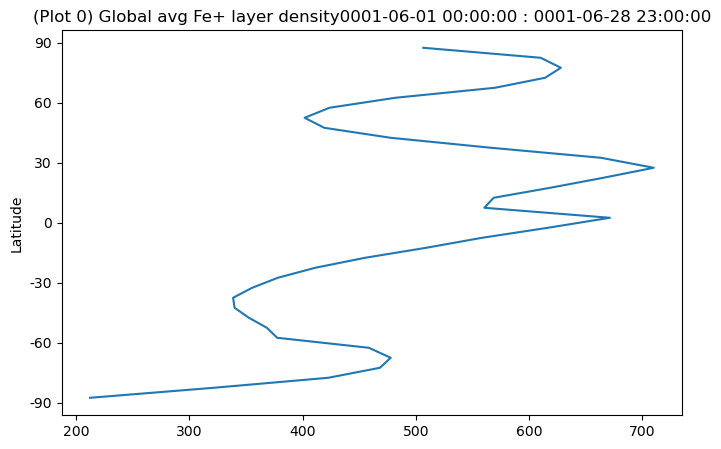

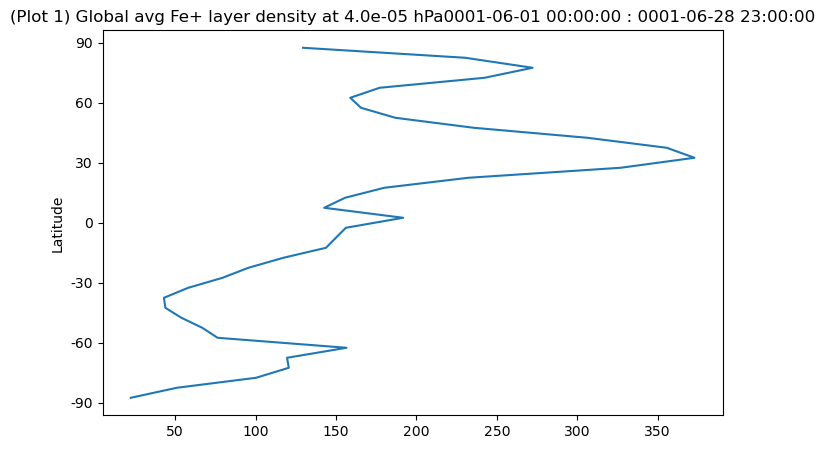

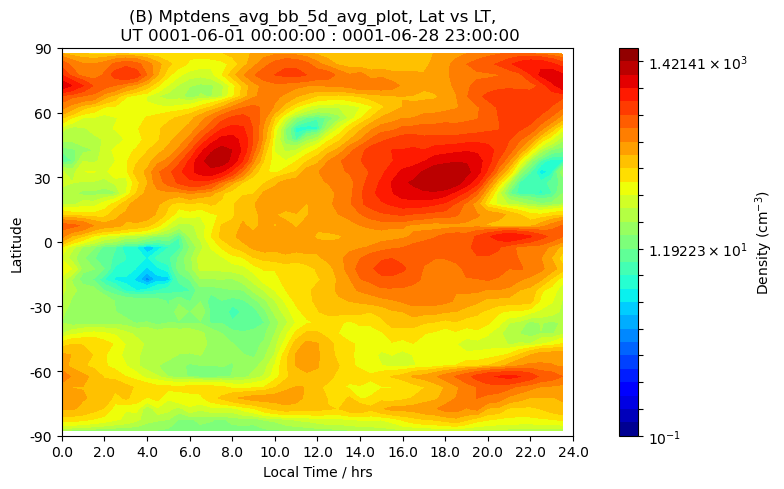

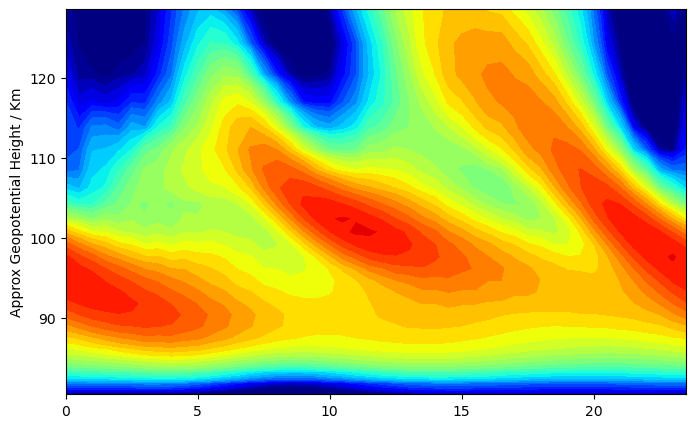

In [3]:
#Plots for testing purposes

    #Metal density in half hour LT bins and 5' lat slices - monthly and dataset avg
        #Mptdens_avg_bb_5d_avg_plot
        #Mptdens_avg_bb_5d_dsavg_plot
    

#===================================================================================================
start_time = time.process_time() 
#===================================================================================================

# Set chosen/multiple lat slices to plot

intlat_plot_idx_multi = np.array([24],dtype=int)    #[20,22,24,26,28],dtype=int) #+ve lats 10-15', 20-25' --> 50-55'       #[7,9,11,13,15],dtype=int) #-ve lats 10-15', 20-25' --> 50-55'     
intlat_plot_idx_multi_shape = len(intlat_plot_idx_multi)  
intlat_plot_ar = np.arange(0,intlat_plot_idx_multi_shape) 



#-----------------------------------Lev-LT plot setup ----------------------------------------
lat_plot_idx = 74   #21=-50.2   #37 #=-19.9    
lat_plot_str = str("%.1f" % lat[lat_plot_idx]) 

#-----------------------------------
lev_sl_idx_plot_min = 0
lev_sl_idx_plot_max = 24
#print('      Plot Lev = ' + str("%.1e" % lev_sl[lev_sl_idx_plot_max]) + ' hPa' + ' : ' + str("%.1e" % lev_sl[lev_sl_idx_plot_min]) + ' hPa')
#print('      Approx Z = ' + str("%.0f" % Zavg_sl[lev_sl_idx_plot_max]) + ' km' + ' : ' + str("%.0f" % Zavg_sl[lev_sl_idx_plot_min]) + ' km')

#Think this was used to set up tick labels but this is not being used any more
Zavg_sl_plott = Zavg_sl[lev_sl_idx_plot_min:lev_sl_idx_plot_max+1]
Zavg_sl_plott = Zavg_sl_plott.to_numpy()
#Zavg_sl_plottt = np.round_(Zavg_sl_plott, decimals=0)

#-------------------Set up Local Time Ticks-------------------------------
timeconv = lon / 15
timeconv_plot = timeconv.to_numpy() 
timeconv_plot_ticks = np.arange(0,25, dtype=float)

#------------Set string values for sigma symbol to use in plot------------
sigma = '\u03C3'
#----------------------------------------


#levLTticks = np.linspace(0, 16, 17)



#-----------------------------------Lat-LT plot setup ----------------------------------------
# Set chosen/multiple levs to plot for lat-LT at a specific alt

lev_sl_idx_plot_multi = np.array([4],dtype=int)  #[ 4,  8, 14]   ~114km,~105km,95km
lev_sl_idx_plot_multi_shape = len(lev_sl_idx_plot_multi)  #3
lev_plot_ar = np.arange(0,lev_sl_idx_plot_multi_shape)   #[0,1,2]





for ids in ds_months_ar:   #iterate over month
    #--------------Set value for ids for plot variables-----------------------
    ids_plot = ids
    str_ids_plot = str(ids_plot)
    #print('Plot month ' + str_ids_plot + ': ' + str(ds_months[ids_plot]) )
      
        
        
    #---------------------------(Plot 0)--------------------------
    #-----------------------global avg Fe+ layer ------------------------------
    #-----------------------------------------------------      
    Mptdens_avg_bb_5d_avg_plot_a = np.mean ( Mptdens_avg_bb_5d_avg[:,:,:,ids_plot], axis=2 ) #avg over lon
    #print(Mptdens_avg_bb_5d_avg_plot_a.shape)
    Mptdens_avg_bb_5d_avg_plot_avl = np.mean ( Mptdens_avg_bb_5d_avg_plot_a[:,:], axis=0 )  #avg over lev

    fig, ax = plt.subplots(figsize=(8, 5))
    C = ax.plot(Mptdens_avg_bb_5d_avg_plot_avl, intlat)
    ax.set_ylabel('Latitude')
    ax.set_yticks(np.linspace(-90,90, 7)) 
    ax.set_yticklabels((-90,-60,-30,0,30,60,90))
    ax.set_title('(Plot 0) Global avg '+ Metal + '+ layer density' + times_str_min[ids_plot][0] + ' : ' + times_str_max[ids_plot][-1])
    #-----------------------------------------------------  
        


        

      
        
        
        
        
    #===================================================================================================================================================
    for iplev in lev_plot_ar:   #iterate over multiple levels for lat-LT plots at a specific alt
        #-----------------------------------Lat-LT plot setup ----------------------------------------
        #print('Lat-LT plot setup:')
        lev_sl_idx_plot = lev_sl_idx_plot_multi[iplev]    #14 4.9e-04hPa~95km  #8 1.1e-04hPa~105km  #4 4.0e-05 hPa~114km
       
        lev_sl_plot = lev_sl[lev_sl_idx_plot]
        lev_sl_plot_str = str("%.1e" % lev_sl_plot) + ' hPa'
        #print('      Plot Lev = ' + lev_sl_plot_str )
        
        #Zavg_sl_plot = Zavg_sl[lev_sl_idx_plot]
        #Zavg_sl_plot_str = str("%.0f" % Zavg_sl_plot) + ' km'
        ##print('      Approx Z = ' + Zavg_sl_plot_str )          
        
        #print('      Plot Lev = ' + str("%.1e" % lev_sl[lev_sl_idx_plot]) + ' hPa' )
        #print('      Approx Z = ' + str("%.0f" % Zavg_sl[lev_sl_idx_plot]) + ' km' )
        #===================================================================================================================================================

              
        
        #-----------------------------------------------------
        #---------------------------global avg Fe+ layer at plot lev --------------------------
        #-----------------------------------------------------
        Mptdens_avg_bb_5d_avg_plot_av = np.mean ( Mptdens_avg_bb_5d_avg[lev_sl_idx_plot,:,:,ids_plot], axis=1 )
        
        fig, ax = plt.subplots(figsize=(8, 5))
        C = ax.plot(Mptdens_avg_bb_5d_avg_plot_av, intlat)
        ax.set_ylabel('Latitude')
        ax.set_yticks(np.linspace(-90,90, 7)) 
        ax.set_yticklabels((-90,-60,-30,0,30,60,90)) 
        ax.set_title(' Global avg '+ Metal + '+ layer density at ' + lev_sl_plot_str + times_str_min[ids_plot][0] + ' : ' + times_str_max[ids_plot][-1])
        #-----------------------------------------------------
        
        
        

        
        
                                         
        #----------------------Monthly avg (lev, lat, LT, ids)----------------------------------------------
        #-----------------------------------Lat-LT----------------------------------------------------------
        #------------------------data averaged in 5' lat slices---------------------------------------------

        Mptdens_avg_bb_5d_avg_plot = Mptdens_avg_bb_5d_avg[lev_sl_idx_plot,:,:,ids_plot]
        
        #-----------------------------------------------------
        ticks = np.geomspace(1*10**-1, 2*10**3, 30)


        fig, ax = plt.subplots(figsize=(8, 5))

        C = ax.contourf(timeconv_plot[::3], intlat, Mptdens_avg_bb_5d_avg_plot,                 
                         levels=ticks,
                         locator=ticker.LogLocator(),
                         #extend='min',
                         cmap=jet)

        ax.set_ylabel('Latitude')
        ax.set_yticks(np.linspace(-90,90, 7)) 
        ax.set_yticklabels((-90,-60,-30,0,30,60,90)) 

        ax.set_xlabel('Local Time / hrs')
        ax.set_xticks(np.linspace(0,24,13)) 
        ax.set_xticklabels(timeconv_plot_ticks[::2]) 

        if ds_months_shape>1:
            ax.set_title('Mptdens_avg_bb_5d_avg_plot, Lat vs LT, ' + ' \n UT ' + times_str_min[ids_plot][0] + ' : ' + times_str_max[ids_plot][-1] ) 
        else:
            ax.set_title('Mptdens_avg_bb_5d_avg_plot, Lat vs LT, ' + ' \n UT ' + times_str_min[0] + ' : ' + times_str_max[-1] ) 

        #ax.grid(axis='x',color = 'grey', linestyle = '-', linewidth = 0.5)
        #plt.grid(axis='y',color = 'grey', linestyle = '-', linewidth = 0.5)

        #------------------
        def fmt(x, pos):
            a, b = '{:.1e}'.format(x).split('e')
            b = int(b)
            return r'${} \times 10^{{{}}}$'.format(a, b)

        cbar = fig.colorbar(C, pad=0.07,ticks=ticks[::2])#,format=ticker.FuncFormatter(fmt))#fraction=0.023, 
        #-------------------

        cbar.set_label(r'Density (cm$^{-3}$)')

        if ds_months_shape>1:
            figname= 'Mptdens_avg_bb_5d_avg_plot: Lat vs LT, ' + ' ' + times_str_min[ids_plot][0] + ' : ' + times_str_max[ids_plot][-1] + '.png'
        else:
            figname= 'Mptdens_avg_bb_5d_avg_plot: Lat vs LT, ' + ' ' + times_str_min[0] + ' : ' + times_str_max[-1] + '.png'

        plt.tight_layout()
        #plt.savefig('./Figures/' + run_name +'/Oc_fr/' + Monthfolderstr + '/5deg_latbins' + '/Lat-LT/'+str(figname), dpi = 400) #
        #---------------------------------------------------------------------------------------------------

            
            
    for iintlatt in intlat_plot_ar:
        #print('Lev-LT plot setup (intlat):')
        intlat_plot_idx =  intlat_plot_idx_multi[iintlatt] 
        lat_plot_1 = intlat[intlat_plot_idx] -2.5
        lat_plot_2 = intlat[intlat_plot_idx] +2.5
        #print('      Plot lat = ' + str("%.0f" % lat_plot_1)  + ':' + str("%.0f" % lat_plot_2))
  
        
        
        #------------------------Monthly avg (lev, lat, LT, ids)--------------------------------------------
        #-----------------------------------Lev-LT----------------------------------------------------------
        #------------------------data averaged in 5' lat slices---------------------------------------------

        Mptdens_avg_bb_5d_avg_plot = Mptdens_avg_bb_5d_avg[:, intlat_plot_idx, :, ids_plot] 
        #-----------------------------------------------------

        ticks = np.geomspace(1*10**1, 5*10**3, 30)


        fig, ax = plt.subplots(figsize=(8, 5))

        C = ax.contourf(timeconv_plot[::3], Zavg_sl, Mptdens_avg_bb_5d_avg_plot,  #lev_sl
                         levels=ticks,
                         locator=ticker.LogLocator(),
                         extend='min',
                         cmap=jet)

        #ax.set_yscale('log')
        #ax.set_ylabel('Pressure / HPa')
        #ax.set_ylim(lev_sl_plot_max, lev_sl_plot_min) 
        
        #ax2 = ax.twinx()
        #ax2.set_ylabel('Approx Geopotential Height / Km')
        #ax2.set_ylim(Zavg_sl_plot_max,Zavg_sl_plot_min)
        #ax2.set_yticklabels(Zavg_sl_plottt[lev_sl_idx_plot_max:lev_sl_idx_plot_min:-5])
        
        ax.set_ylabel('Approx Geopotential Height / Km')
        ax.set_ylim(Zavg_sl_plot_max,Zavg_sl_plot_min)

        
        ax.set_xlabel('Local Time / hrs')
        ax.set_xticks(np.linspace(0,24,13)) 
        ax.set_xticklabels(timeconv_plot_ticks[::2]) 
        
        if ds_months_shape>1:
            ax.set_title('Mptdens_avg_bb_5d_avg_plot, Lev vs LT, lat'  + lat_plot_str1 + ':' + lat_plot_str2 + ', \n UT ' + times_str_min[ids_plot][0] + ' : ' + times_str_max[ids_plot][-1] )
        else:
            ax.set_title('Mptdens_avg_bb_5d_avg_plot, Lev vs LT, lat'  + lat_plot_str1 + ':' + lat_plot_str2 + ', \n UT ' + times_str_min[0] + ' : ' + times_str_max[-1] )           
            
        #ax.grid(axis='x',color = 'grey', linestyle = '-', linewidth = 0.5)
        #plt.grid(axis='y',color = 'grey', linestyle = '-', linewidth = 0.5)

        #------------------
        def fmt(x, pos):
            a, b = '{:.1e}'.format(x).split('e')
            b = int(b)
            return r'${} \times 10^{{{}}}$'.format(a, b)

        cbar = fig.colorbar(C, pad=0.12,ticks=ticks[::2])#,format=ticker.FuncFormatter(fmt))#fraction=0.023, 
        #-------------------

        cbar.set_label(r'Density (cm$^{-3}$)')
        if ds_months_shape>1:
            figname= 'Mptdens_avg_bb_5d_avg_plot: Lev vs LT, lat'  + lat_plot_str1 + ':' + lat_plot_str2 + ' ' + times_str_min[ids_plot][0] + ' : ' + times_str_max[ids_plot][-1] + '.png'
        else:
            figname= 'Mptdens_avg_bb_5d_avg_plot: Lev vs LT, lat'  + lat_plot_str1 + ':' + lat_plot_str2 + ' ' + times_str_min[0] + ' : ' + times_str_max[-1] + '.png'

                         
        plt.tight_layout()
        #plt.savefig('./Figures/' + run_name +'/Oc_fr/' + Monthfolderstr + '/5deg_latbins'+ '/Lev-LT/'+str(figname), dpi = 400) #
        #---------------------------------------------------------------------------------------------------

        if ds_months_shape>1:
            
            #--------------------------Dataset avg (lev, lat, LT, ids)------------------------------------------
            #-----------------------------------Lev-LT----------------------------------------------------------
            #------------------------data averaged in 5' lat slices---------------------------------------------
            Mptdens_avg_bb_5d_dsavg_plot = Mptdens_avg_bb_5d_dsavg[:, intlat_plot_idx, :]

            #-----------------------------------------------------


            fig, ax = plt.subplots(figsize=(8, 5))

            C = ax.contourf(timeconv_plot[::3], Zavg_sl, Mptdens_avg_bb_5d_dsavg_plot,    #lev_sl
                             levels=ticks,
                             locator=ticker.LogLocator(),
                             extend='min',
                             cmap=jet)

            #ax.set_yscale('log')
            #ax.set_ylabel('Pressure / HPa')
            #ax.set_ylim(lev_sl_plot_max, lev_sl_plot_min) 

            #ax2 = ax.twinx()
            #ax2.set_ylabel('Approx Geopotential Height / Km')
            #ax2.set_ylim(Zavg_sl_plot_max,Zavg_sl_plot_min)
            #ax2.set_yticklabels(Zavg_sl_plottt[lev_sl_idx_plot_max:lev_sl_idx_plot_min:-5])

            ax.set_ylabel('Approx Geopotential Height / Km')
            ax.set_ylim(Zavg_sl_plot_max,Zavg_sl_plot_min)

            ax.set_xlabel('Local Time / hrs')
            ax.set_xticks(np.linspace(0,24,13)) 
            ax.set_xticklabels(timeconv_plot_ticks[::2]) 
            ax.set_title('Mptdens_avg_bb_5d_dsavg_plot, Lev vs LT, lat'  + lat_plot_str1 + ':' + lat_plot_str2 + ', \n UT ' + times_str_min[0][0] + ' : ' + times_str_max[-1][-1] )

            #ax.grid(axis='x',color = 'grey', linestyle = '-', linewidth = 0.5)
            #plt.grid(axis='y',color = 'grey', linestyle = '-', linewidth = 0.5)

            #------------------
            def fmt(x, pos):
                a, b = '{:.1e}'.format(x).split('e')
                b = int(b)
                return r'${} \times 10^{{{}}}$'.format(a, b)

            cbar = fig.colorbar(C, pad=0.12,ticks=ticks[::2])#,format=ticker.FuncFormatter(fmt))#fraction=0.023, 
            #-------------------

            cbar.set_label(r'Density (cm$^{-3}$)')

            figname= 'Mptdens_avg_bb_5d_dsavg_plot: Lev vs LT, lat'  + lat_plot_str1 + ':' + lat_plot_str2 + ' ' + times_str_min[0][0] + ' : ' + times_str_max[-1][-1] + '.png'


            plt.tight_layout()
            #plt.savefig('./Figures/' + run_name +'/Oc_fr/' + Monthfolderstr+ '/5deg_latbins' + '/Lev-LT/'+str(figname), dpi = 400) #
            #---------------------------------------------------------------------------------------------------


        
        
        #for it2 in time_ar_2wk:  #iterate over each 2wk sample period
        #    #--------------Set value for it2 for plot variables-----------------------
        #    it2_plot = it2
        #    str_it2_plot = str(it2_plot)
        #    #print('Plot time ' + str_it2_plot + ': ' + times_str_min[ids_plot][it2_plot] + ' : ' + times_str_max[ids_plot][it2_plot] )
        #    #print('----------------------------------------')   
                
#===================================================================================================
end_time = time.process_time()
time_taken = end_time - start_time
time_taken_min = time_taken / 60.
print('========================================')
print('Calculation Time = ' + str(time_taken_min) + ' mins' ) 

      Plot Lat = 50.2
      Plot Lev = 6.0e-03 hPa : 1.5e-05 hPa
      Approx Z = 36 km : 58 km
Plot month 0: 03


IndexError: too many indices for array: array is 5-dimensional, but 6 were indexed

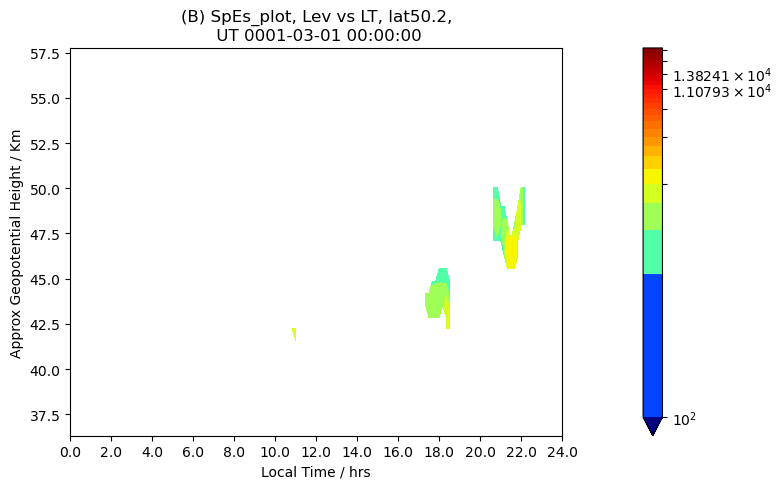

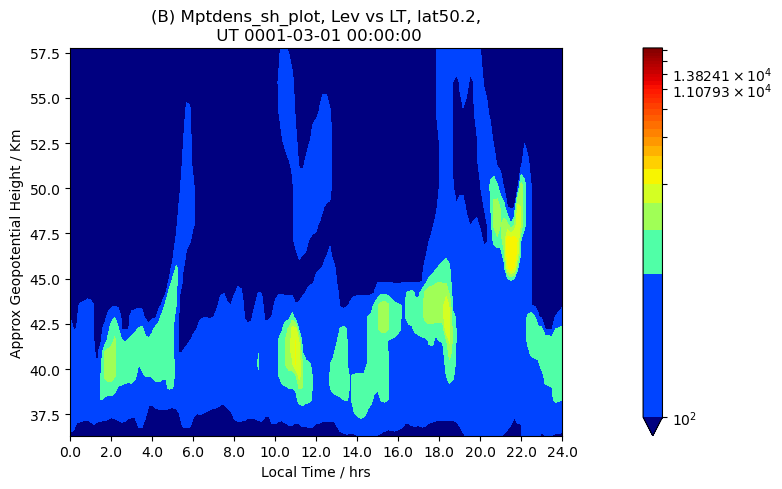

In [31]:
#Plots for testing purposes

#SpEs & Mptdens_sh



time_plot_idx = [0,6,12,18]
timearrr = np.arange(0,len(time_plot_idx), dtype=int)


#-----------------------------------Lev-LT plot setup ----------------------------------------
lat_plot_idx = 74   #21=-50.2   #37 #=-19.9    
lat_plot = lat[lat_plot_idx]
lat_plot_str = str("%.1f" % lat_plot) 
print('      Plot Lat = ' + lat_plot_str )
#-----------------------------------
lev_sl_idx_plot_min = 0
lev_sl_idx_plot_max = 24
print('      Plot Lev = ' + str("%.1e" % lev_sl[lev_sl_idx_plot_max]) + ' hPa' + ' : ' + str("%.1e" % lev_sl[lev_sl_idx_plot_min]) + ' hPa')
print('      Approx Z = ' + str("%.0f" % Zavg_sl[lev_sl_idx_plot_max]) + ' km' + ' : ' + str("%.0f" % Zavg_sl[lev_sl_idx_plot_min]) + ' km')

Zavg_sl_plott = Zavg_sl[lev_sl_idx_plot_min:lev_sl_idx_plot_max+1]
Zavg_sl_plott = Zavg_sl_plott.to_numpy()
#Zavg_sl_plottt = np.round_(Zavg_sl_plott, decimals=0)

#-------------------Set up Local Time Ticks-------------------------------
timeconv = lon / 15
timeconv_plot = timeconv.to_numpy() 
timeconv_plot_ticks = np.arange(0,25, dtype=float)

#------------Set string values for sigma symbol to use in plot------------
sigma = '\u03C3'
#----------------------------------------



for ids in ds_months_ar:   #iterate over month
    
    start_cftime_date = '0001-' + str(ds_months[ids]) + '-01'
    times = xr.cftime_range(start=start_cftime_date, periods=672, freq="1H", calendar="noleap")    
    
   
    
    #--------------Set value for ids for plot variables-----------------------
    ids_plot = ids
    str_ids_plot = str(ids_plot)
    print('Plot month ' + str_ids_plot + ': ' + str(ds_months[ids_plot]) )
       
    
    for it2 in time_ar_2wk:  #iterate over each 2wk sample period
        
        #--------------Set value for it2 for plot variables-----------------------
        it2_plot = it2
        str_it2_plot = str(it2_plot)
     
        
        for itr in timearrr:  #
            if it2_plot == 0:
                plottime = times[ time_plot_idx[itr] ]
            else:
                plottime = times [ time_plot_idx[itr] + 336]
                print(plottime)
                
                
    
            
            #------------------------ SpEs_plot -----------------------------
            SpEs_plot = SpEs[:, itr , lat_plot_idx, :, it2_plot , ids_plot]
            
            
            #ticks = np.geomspace(1*10**2, 1*10**3, 30)
            ticks = np.linspace(1*10**2, 2*10**4, 30)

            fig, ax = plt.subplots(figsize=(8, 5))

            #C = ax.pcolormesh(timeconv_plot, lev_sl, SpEs_plot)
            C = ax.contourf(timeconv_plot, Zavg_sl, SpEs_plot,    #lev_sl
                             levels=ticks,
                             locator=ticker.LogLocator(),
                             extend='min',
                             cmap=jet)

            #ax.set_yscale('log')
            #ax.set_ylabel('Pressure / HPa')
            #ax.set_ylim(lev_sl_plot_max, lev_sl_plot_min) 

            #ax2 = ax.twinx()
            #ax2.set_ylabel('Approx Geopotential Height / Km')
            #ax2.set_ylim(Zavg_sl_plot_max,Zavg_sl_plot_min)
            #ax2.set_yticklabels(Zavg_sl_plottt[lev_sl_idx_plot_max:lev_sl_idx_plot_min:-5])

            ax.set_ylabel('Approx Geopotential Height / Km')
            ax.set_ylim(Zavg_sl_plot_max,Zavg_sl_plot_min)
            
            ax.set_xlabel('Local Time / hrs')
            ax.set_xticks(np.linspace(0,24,13)) 
            ax.set_xticklabels(timeconv_plot_ticks[::2]) 

            ax.set_title('SpEs_plot, Lev vs LT, lat' + lat_plot_str + ',\n UT ' + str(plottime) ) #+ str(times[itr]) )

            #ax.grid(axis='x',color = 'grey', linestyle = '-', linewidth = 0.5)
            #plt.grid(axis='y',color = 'grey', linestyle = '-', linewidth = 0.5)

            cbar = fig.colorbar(C, pad=0.12,ticks=ticks[::4])#,format=ticker.FuncFormatter(fmt))#fraction=0.023, 
            #-------------------

            #cbar.set_label(r'Number of Occurences')

            figname= 'SpEs_plot: Lev vs LT, lat' + lat_plot_str + ' ' + str(plottime)  + '.png'
            plt.tight_layout()
            path = './Figures/' + run_name +'/Oc_fr/' + Monthfolderstr + '/Lev-LT/SpEs/'
            #plt.savefig(path+str(figname), dpi = 400) #
            
            
            
            
            
            
            
            #------------------------ Mptdens_sh[ilev,it,:,:,it2,ids] -----------------------------
            Mptdens_sh_plot = Mptdens_sh[:, itr , lat_plot_idx, :, it2_plot , ids_plot]
            
            
            #ticks = np.geomspace(1*10**2, 2*10**4, 30)

            fig, ax = plt.subplots(figsize=(8, 5))

            C = ax.contourf(timeconv_plot, Zavg_sl, Mptdens_sh_plot,   #lev_sl
                             levels=ticks,
                             locator=ticker.LogLocator(),
                             extend='min',
                             cmap=jet)

            #ax.set_yscale('log')
            #ax.set_ylabel('Pressure / HPa')
            #ax.set_ylim(lev_sl_plot_max, lev_sl_plot_min) 

            #ax2 = ax.twinx()
            #ax2.set_ylabel('Approx Geopotential Height / Km')
            #ax2.set_ylim(Zavg_sl_plot_max,Zavg_sl_plot_min)
            #ax2.set_yticklabels(Zavg_sl_plottt[lev_sl_idx_plot_max:lev_sl_idx_plot_min:-5])

            ax.set_ylabel('Approx Geopotential Height / Km')
            ax.set_ylim(Zavg_sl_plot_max,Zavg_sl_plot_min)
            
            ax.set_xlabel('Local Time / hrs')
            ax.set_xticks(np.linspace(0,24,13)) 
            ax.set_xticklabels(timeconv_plot_ticks[::2]) 

            ax.set_title('Mptdens_sh_plot, Lev vs LT, lat' + lat_plot_str + ',\n UT ' + str(plottime) ) #+ str(times[itr]) )

            #ax.grid(axis='x',color = 'grey', linestyle = '-', linewidth = 0.5)
            #plt.grid(axis='y',color = 'grey', linestyle = '-', linewidth = 0.5)

            cbar = fig.colorbar(C, pad=0.12,ticks=ticks[::4])#,format=ticker.FuncFormatter(fmt))#fraction=0.023, 
            #-------------------

            #cbar.set_label(r'Number of Occurences')

            figname= 'Mptdens_sh_plot: Lev vs LT, lat' + lat_plot_str + ' ' + str(plottime)  + '.png'
            plt.tight_layout()
            path = './Figures/' + run_name +'/Oc_fr/' + Monthfolderstr + '/Lev-LT/SpEs/'
            #plt.savefig(path+str(figname), dpi = 400) #
            
            
            
            
            
    